# Santander Customer Transaction Prediction

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

#cats
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.set()

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


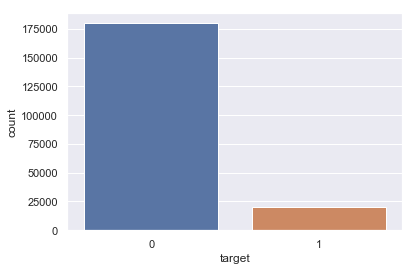

In [6]:
sns.countplot(x='target', data=train_df)

In [17]:
train_df['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [18]:
#sns.pairplot(train_df)

In [19]:
train_df.fillna(999, inplace = True)
test_df.fillna(999, inplace = True)

In [20]:
y = train_df['target']
X = train_df.drop(['ID_code', 'target'], axis=1)

X_test = test_df.drop(['ID_code'], axis=1)
X_test.fillna(999, inplace = True)
object_columns_test = X_test.select_dtypes(include=['object']).columns.values.tolist()

In [21]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8,  random_state=1234)

C:\Users\a.moiseev\AppData\Local\Continuum\anaconda3\envs\pystak37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
model_ct_simp = CatBoostClassifier(
    eval_metric='AUC'
    ,use_best_model=True
    ,random_seed=42
    ,rsm = 0.8
    ,scale_pos_weight = 9
    ,learning_rate = 0.01
    ,l2_leaf_reg = 1000
    ,od_pval = 0.0001
    ,iterations= 1000
                          )

TypeError: __init__() got an unexpected keyword argument 'eval_set'

In [ ]:
model = CatBoostClassifier(
    eval_metric='AUC'
    ,use_best_model=True
    ,random_seed=42
    ,rsm = 0.8
    ,scale_pos_weight = 9
    ,learning_rate = 0.01
    ,l2_leaf_reg = 1000
    ,od_pval = 0.0001
    ,iterations= 10000
                          )

In [23]:
model_ct_simp.fit(X_train, y_train, object_columns_test, eval_set=(X_validation, y_validation), plot=True, use_best_model = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6402004	best: 0.6402004 (0)	total: 275ms	remaining: 4m 34s
1:	test: 0.6676237	best: 0.6676237 (1)	total: 577ms	remaining: 4m 48s
2:	test: 0.6781678	best: 0.6781678 (2)	total: 845ms	remaining: 4m 40s
3:	test: 0.6839907	best: 0.6839907 (3)	total: 1.12s	remaining: 4m 37s
4:	test: 0.6874604	best: 0.6874604 (4)	total: 1.35s	remaining: 4m 29s
5:	test: 0.6892424	best: 0.6892424 (5)	total: 1.55s	remaining: 4m 17s
6:	test: 0.6883920	best: 0.6892424 (5)	total: 1.78s	remaining: 4m 12s
7:	test: 0.6924840	best: 0.6924840 (7)	total: 1.99s	remaining: 4m 6s
8:	test: 0.6981813	best: 0.6981813 (8)	total: 2.21s	remaining: 4m 3s
9:	test: 0.6996186	best: 0.6996186 (9)	total: 2.42s	remaining: 3m 59s
10:	test: 0.7010448	best: 0.7010448 (10)	total: 2.65s	remaining: 3m 58s
11:	test: 0.7037538	best: 0.7037538 (11)	total: 2.89s	remaining: 3m 57s
12:	test: 0.7029924	best: 0.7037538 (11)	total: 3.13s	remaining: 3m 58s
13:	test: 0.7062736	best: 0.7062736 (13)	total: 3.38s	remaining: 3m 58s
14:	test: 0.70

114:	test: 0.7688583	best: 0.7688583 (114)	total: 27.9s	remaining: 3m 34s
115:	test: 0.7691330	best: 0.7691330 (115)	total: 28.2s	remaining: 3m 34s
116:	test: 0.7699243	best: 0.7699243 (116)	total: 28.4s	remaining: 3m 34s
117:	test: 0.7700495	best: 0.7700495 (117)	total: 28.7s	remaining: 3m 34s
118:	test: 0.7705852	best: 0.7705852 (118)	total: 28.9s	remaining: 3m 34s
119:	test: 0.7709309	best: 0.7709309 (119)	total: 29.1s	remaining: 3m 33s
120:	test: 0.7713895	best: 0.7713895 (120)	total: 29.4s	remaining: 3m 33s
121:	test: 0.7717488	best: 0.7717488 (121)	total: 29.6s	remaining: 3m 33s
122:	test: 0.7718716	best: 0.7718716 (122)	total: 29.9s	remaining: 3m 32s
123:	test: 0.7716095	best: 0.7718716 (122)	total: 30.1s	remaining: 3m 32s
124:	test: 0.7718380	best: 0.7718716 (122)	total: 30.4s	remaining: 3m 32s
125:	test: 0.7723477	best: 0.7723477 (125)	total: 30.7s	remaining: 3m 32s
126:	test: 0.7729735	best: 0.7729735 (126)	total: 31s	remaining: 3m 33s
127:	test: 0.7734320	best: 0.7734320 (12

226:	test: 0.8011468	best: 0.8011468 (226)	total: 56.1s	remaining: 3m 11s
227:	test: 0.8014378	best: 0.8014378 (227)	total: 56.4s	remaining: 3m 11s
228:	test: 0.8014111	best: 0.8014378 (227)	total: 56.7s	remaining: 3m 10s
229:	test: 0.8016134	best: 0.8016134 (229)	total: 56.9s	remaining: 3m 10s
230:	test: 0.8017454	best: 0.8017454 (230)	total: 57.2s	remaining: 3m 10s
231:	test: 0.8019395	best: 0.8019395 (231)	total: 57.4s	remaining: 3m 10s
232:	test: 0.8021483	best: 0.8021483 (232)	total: 57.6s	remaining: 3m 9s
233:	test: 0.8024420	best: 0.8024420 (233)	total: 57.9s	remaining: 3m 9s
234:	test: 0.8026983	best: 0.8026983 (234)	total: 58.1s	remaining: 3m 9s
235:	test: 0.8028823	best: 0.8028823 (235)	total: 58.4s	remaining: 3m 8s
236:	test: 0.8030836	best: 0.8030836 (236)	total: 58.6s	remaining: 3m 8s
237:	test: 0.8031583	best: 0.8031583 (237)	total: 58.9s	remaining: 3m 8s
238:	test: 0.8034390	best: 0.8034390 (238)	total: 59.2s	remaining: 3m 8s
239:	test: 0.8036223	best: 0.8036223 (239)	to

337:	test: 0.8203214	best: 0.8203214 (337)	total: 1m 23s	remaining: 2m 43s
338:	test: 0.8204667	best: 0.8204667 (338)	total: 1m 23s	remaining: 2m 43s
339:	test: 0.8206713	best: 0.8206713 (339)	total: 1m 24s	remaining: 2m 43s
340:	test: 0.8208570	best: 0.8208570 (340)	total: 1m 24s	remaining: 2m 42s
341:	test: 0.8210559	best: 0.8210559 (341)	total: 1m 24s	remaining: 2m 42s
342:	test: 0.8211016	best: 0.8211016 (342)	total: 1m 24s	remaining: 2m 42s
343:	test: 0.8212506	best: 0.8212506 (343)	total: 1m 25s	remaining: 2m 42s
344:	test: 0.8212534	best: 0.8212534 (344)	total: 1m 25s	remaining: 2m 42s
345:	test: 0.8212886	best: 0.8212886 (345)	total: 1m 25s	remaining: 2m 41s
346:	test: 0.8213427	best: 0.8213427 (346)	total: 1m 25s	remaining: 2m 41s
347:	test: 0.8215725	best: 0.8215725 (347)	total: 1m 26s	remaining: 2m 41s
348:	test: 0.8216494	best: 0.8216494 (348)	total: 1m 26s	remaining: 2m 41s
349:	test: 0.8217901	best: 0.8217901 (349)	total: 1m 26s	remaining: 2m 40s
350:	test: 0.8219804	best

447:	test: 0.8328457	best: 0.8328457 (447)	total: 1m 51s	remaining: 2m 17s
448:	test: 0.8329540	best: 0.8329540 (448)	total: 1m 52s	remaining: 2m 17s
449:	test: 0.8331145	best: 0.8331145 (449)	total: 1m 52s	remaining: 2m 17s
450:	test: 0.8331541	best: 0.8331541 (450)	total: 1m 52s	remaining: 2m 17s
451:	test: 0.8331997	best: 0.8331997 (451)	total: 1m 52s	remaining: 2m 16s
452:	test: 0.8332705	best: 0.8332705 (452)	total: 1m 53s	remaining: 2m 16s
453:	test: 0.8333556	best: 0.8333556 (453)	total: 1m 53s	remaining: 2m 16s
454:	test: 0.8334796	best: 0.8334796 (454)	total: 1m 53s	remaining: 2m 16s
455:	test: 0.8333799	best: 0.8334796 (454)	total: 1m 53s	remaining: 2m 15s
456:	test: 0.8334225	best: 0.8334796 (454)	total: 1m 54s	remaining: 2m 15s
457:	test: 0.8334312	best: 0.8334796 (454)	total: 1m 54s	remaining: 2m 15s
458:	test: 0.8335910	best: 0.8335910 (458)	total: 1m 54s	remaining: 2m 15s
459:	test: 0.8336969	best: 0.8336969 (459)	total: 1m 54s	remaining: 2m 14s
460:	test: 0.8337723	best

558:	test: 0.8419881	best: 0.8419881 (558)	total: 2m 20s	remaining: 1m 50s
559:	test: 0.8421000	best: 0.8421000 (559)	total: 2m 20s	remaining: 1m 50s
560:	test: 0.8422163	best: 0.8422163 (560)	total: 2m 20s	remaining: 1m 50s
561:	test: 0.8422405	best: 0.8422405 (561)	total: 2m 21s	remaining: 1m 49s
562:	test: 0.8423282	best: 0.8423282 (562)	total: 2m 21s	remaining: 1m 49s
563:	test: 0.8423770	best: 0.8423770 (563)	total: 2m 21s	remaining: 1m 49s
564:	test: 0.8424692	best: 0.8424692 (564)	total: 2m 21s	remaining: 1m 49s
565:	test: 0.8425153	best: 0.8425153 (565)	total: 2m 22s	remaining: 1m 48s
566:	test: 0.8425788	best: 0.8425788 (566)	total: 2m 22s	remaining: 1m 48s
567:	test: 0.8426772	best: 0.8426772 (567)	total: 2m 22s	remaining: 1m 48s
568:	test: 0.8427596	best: 0.8427596 (568)	total: 2m 22s	remaining: 1m 48s
569:	test: 0.8428790	best: 0.8428790 (569)	total: 2m 23s	remaining: 1m 47s
570:	test: 0.8429674	best: 0.8429674 (570)	total: 2m 23s	remaining: 1m 47s
571:	test: 0.8430563	best

668:	test: 0.8497372	best: 0.8497372 (668)	total: 2m 48s	remaining: 1m 23s
669:	test: 0.8497833	best: 0.8497833 (669)	total: 2m 48s	remaining: 1m 23s
670:	test: 0.8498322	best: 0.8498322 (670)	total: 2m 49s	remaining: 1m 22s
671:	test: 0.8499102	best: 0.8499102 (671)	total: 2m 49s	remaining: 1m 22s
672:	test: 0.8499141	best: 0.8499141 (672)	total: 2m 49s	remaining: 1m 22s
673:	test: 0.8499506	best: 0.8499506 (673)	total: 2m 49s	remaining: 1m 22s
674:	test: 0.8499786	best: 0.8499786 (674)	total: 2m 50s	remaining: 1m 21s
675:	test: 0.8500483	best: 0.8500483 (675)	total: 2m 50s	remaining: 1m 21s
676:	test: 0.8501329	best: 0.8501329 (676)	total: 2m 50s	remaining: 1m 21s
677:	test: 0.8501825	best: 0.8501825 (677)	total: 2m 50s	remaining: 1m 21s
678:	test: 0.8502641	best: 0.8502641 (678)	total: 2m 51s	remaining: 1m 20s
679:	test: 0.8502924	best: 0.8502924 (679)	total: 2m 51s	remaining: 1m 20s
680:	test: 0.8503937	best: 0.8503937 (680)	total: 2m 51s	remaining: 1m 20s
681:	test: 0.8504713	best

779:	test: 0.8558390	best: 0.8558390 (779)	total: 3m 16s	remaining: 55.5s
780:	test: 0.8559119	best: 0.8559119 (780)	total: 3m 16s	remaining: 55.2s
781:	test: 0.8559791	best: 0.8559791 (781)	total: 3m 17s	remaining: 55s
782:	test: 0.8560254	best: 0.8560254 (782)	total: 3m 17s	remaining: 54.8s
783:	test: 0.8560772	best: 0.8560772 (783)	total: 3m 17s	remaining: 54.5s
784:	test: 0.8561341	best: 0.8561341 (784)	total: 3m 18s	remaining: 54.3s
785:	test: 0.8561913	best: 0.8561913 (785)	total: 3m 18s	remaining: 54s
786:	test: 0.8562083	best: 0.8562083 (786)	total: 3m 18s	remaining: 53.8s
787:	test: 0.8562313	best: 0.8562313 (787)	total: 3m 18s	remaining: 53.5s
788:	test: 0.8562874	best: 0.8562874 (788)	total: 3m 19s	remaining: 53.3s
789:	test: 0.8563330	best: 0.8563330 (789)	total: 3m 19s	remaining: 53s
790:	test: 0.8563828	best: 0.8563828 (790)	total: 3m 19s	remaining: 52.8s
791:	test: 0.8564008	best: 0.8564008 (791)	total: 3m 20s	remaining: 52.6s
792:	test: 0.8564634	best: 0.8564634 (792)	t

891:	test: 0.8607513	best: 0.8607513 (891)	total: 3m 47s	remaining: 27.5s
892:	test: 0.8607661	best: 0.8607661 (892)	total: 3m 47s	remaining: 27.2s
893:	test: 0.8608107	best: 0.8608107 (893)	total: 3m 47s	remaining: 27s
894:	test: 0.8608358	best: 0.8608358 (894)	total: 3m 47s	remaining: 26.7s
895:	test: 0.8608512	best: 0.8608512 (895)	total: 3m 48s	remaining: 26.5s
896:	test: 0.8609091	best: 0.8609091 (896)	total: 3m 48s	remaining: 26.2s
897:	test: 0.8609641	best: 0.8609641 (897)	total: 3m 48s	remaining: 26s
898:	test: 0.8609971	best: 0.8609971 (898)	total: 3m 49s	remaining: 25.7s
899:	test: 0.8610355	best: 0.8610355 (899)	total: 3m 49s	remaining: 25.5s
900:	test: 0.8611058	best: 0.8611058 (900)	total: 3m 49s	remaining: 25.2s
901:	test: 0.8611255	best: 0.8611255 (901)	total: 3m 49s	remaining: 25s
902:	test: 0.8611696	best: 0.8611696 (902)	total: 3m 50s	remaining: 24.7s
903:	test: 0.8611736	best: 0.8611736 (903)	total: 3m 50s	remaining: 24.5s
904:	test: 0.8612102	best: 0.8612102 (904)	t

In [25]:
print (round(model_ct_simp.score(X_validation, y_validation),4))
print (round(model_ct_simp.score(X_train, y_train),4))

0.7948
0.7952


0.8674 <br>
0.8915

In [ ]:
params = model.get_params()
params['iterations'] = 1000
params['custom_loss'] = 'AUC'


cv_data = cv(
    params = params,
    pool = Pool(X, y, object_columns_test),
    fold_count=4,
    inverted=False,
    shuffle=True,
    partition_random_seed=0,
    plot = True
)

In [ ]:
print 'AUC mean:', round(cv_data['test-AUC-mean'].max(),4)
print 'AUC mean:', round(cv_data['test-AUC-mean'].mean(),4)
print 'Logloss mean:', round(cv_data['test-Logloss-mean'].mean(), 4)

AUC mean: 0.8668 <br>
Logloss mean: 0.2319

In [ ]:
preds = model.predict(X_test)

In [ ]:
num_sub = 'over_fit'
sub = pd.DataFrame({"ID_code": test_df.ID_code.values})
sub["target"] = preds
sub.to_csv('submission{}.csv'.format(num_sub), index=False)

## Stucknet

In [26]:
from pystacknet.pystacknet import StackNetClassifier

In [34]:
    models=[ 
            
            [CatBoostClassifier(random_seed=42 ,rsm = 0.8 ,scale_pos_weight = 9 ,learning_rate = 0.01 ,l2_leaf_reg = 1000,od_pval = 0.0001,iterations= 5000
                          )],
            
             [CatBoostClassifier(random_seed=42 ,rsm = 0.8 ,scale_pos_weight = 9 ,learning_rate = 0.01 ,l2_leaf_reg = 1000,od_pval = 0.0001,iterations= 1000
                          )]
    ]
    
    

In [98]:
model_sn=StackNetClassifier(models, metric="auc", folds=4,
                         restacking=False,use_retraining=True, use_proba=True, 
                         random_state=12345,n_jobs=1, verbose=1)

In [99]:
model_sn.fit(X,y)

====================== Start of Level 0 ======================
Input Dimensionality 200 at Level 0 
1 models included in Level 0 
0:	learn: 0.6925461	total: 181ms	remaining: 15m 3s
1:	learn: 0.6919840	total: 385ms	remaining: 16m 2s
2:	learn: 0.6914467	total: 603ms	remaining: 16m 44s
3:	learn: 0.6908946	total: 823ms	remaining: 17m 8s
4:	learn: 0.6903479	total: 1.04s	remaining: 17m 15s
5:	learn: 0.6897712	total: 1.25s	remaining: 17m 16s
6:	learn: 0.6892116	total: 1.46s	remaining: 17m 17s
7:	learn: 0.6886495	total: 1.66s	remaining: 17m 17s
8:	learn: 0.6881029	total: 1.86s	remaining: 17m 9s
9:	learn: 0.6875549	total: 2.05s	remaining: 17m 3s
10:	learn: 0.6870653	total: 2.23s	remaining: 16m 53s
11:	learn: 0.6865949	total: 2.44s	remaining: 16m 52s
12:	learn: 0.6860421	total: 2.62s	remaining: 16m 45s
13:	learn: 0.6855673	total: 2.81s	remaining: 16m 42s
14:	learn: 0.6850345	total: 3s	remaining: 16m 37s
15:	learn: 0.6845332	total: 3.19s	remaining: 16m 34s
16:	learn: 0.6840303	total: 3.38s	remain

153:	learn: 0.6377386	total: 30.5s	remaining: 15m 59s
154:	learn: 0.6374779	total: 30.7s	remaining: 16m
155:	learn: 0.6372408	total: 31s	remaining: 16m 1s
156:	learn: 0.6369675	total: 31.2s	remaining: 16m 1s
157:	learn: 0.6367153	total: 31.4s	remaining: 16m 1s
158:	learn: 0.6364702	total: 31.6s	remaining: 16m 1s
159:	learn: 0.6362286	total: 31.8s	remaining: 16m 2s
160:	learn: 0.6359764	total: 32.1s	remaining: 16m 3s
161:	learn: 0.6357100	total: 32.3s	remaining: 16m 4s
162:	learn: 0.6354590	total: 32.5s	remaining: 16m 4s
163:	learn: 0.6352192	total: 32.7s	remaining: 16m 5s
164:	learn: 0.6349836	total: 33s	remaining: 16m 6s
165:	learn: 0.6347312	total: 33.2s	remaining: 16m 6s
166:	learn: 0.6344864	total: 33.4s	remaining: 16m 6s
167:	learn: 0.6342283	total: 33.6s	remaining: 16m 6s
168:	learn: 0.6339946	total: 33.8s	remaining: 16m 6s
169:	learn: 0.6337299	total: 34s	remaining: 16m 7s
170:	learn: 0.6334929	total: 34.3s	remaining: 16m 7s
171:	learn: 0.6332251	total: 34.6s	remaining: 16m 10s


308:	learn: 0.6043801	total: 1m 7s	remaining: 17m 6s
309:	learn: 0.6041958	total: 1m 7s	remaining: 17m 6s
310:	learn: 0.6040138	total: 1m 8s	remaining: 17m 6s
311:	learn: 0.6038464	total: 1m 8s	remaining: 17m 6s
312:	learn: 0.6036765	total: 1m 8s	remaining: 17m 5s
313:	learn: 0.6034911	total: 1m 8s	remaining: 17m 5s
314:	learn: 0.6033109	total: 1m 8s	remaining: 17m 5s
315:	learn: 0.6031183	total: 1m 9s	remaining: 17m 4s
316:	learn: 0.6029373	total: 1m 9s	remaining: 17m 4s
317:	learn: 0.6027593	total: 1m 9s	remaining: 17m 4s
318:	learn: 0.6025802	total: 1m 9s	remaining: 17m 3s
319:	learn: 0.6024112	total: 1m 9s	remaining: 17m 2s
320:	learn: 0.6022041	total: 1m 10s	remaining: 17m 3s
321:	learn: 0.6020384	total: 1m 10s	remaining: 17m 4s
322:	learn: 0.6018643	total: 1m 10s	remaining: 17m 4s
323:	learn: 0.6016854	total: 1m 10s	remaining: 17m 3s
324:	learn: 0.6015058	total: 1m 11s	remaining: 17m 3s
325:	learn: 0.6013217	total: 1m 11s	remaining: 17m 2s
326:	learn: 0.6011597	total: 1m 11s	rema

458:	learn: 0.5801900	total: 1m 39s	remaining: 16m 27s
459:	learn: 0.5800568	total: 1m 39s	remaining: 16m 26s
460:	learn: 0.5799066	total: 1m 40s	remaining: 16m 26s
461:	learn: 0.5797767	total: 1m 40s	remaining: 16m 26s
462:	learn: 0.5796369	total: 1m 40s	remaining: 16m 25s
463:	learn: 0.5794870	total: 1m 40s	remaining: 16m 25s
464:	learn: 0.5793424	total: 1m 40s	remaining: 16m 24s
465:	learn: 0.5792070	total: 1m 41s	remaining: 16m 24s
466:	learn: 0.5790614	total: 1m 41s	remaining: 16m 24s
467:	learn: 0.5789300	total: 1m 41s	remaining: 16m 23s
468:	learn: 0.5787788	total: 1m 41s	remaining: 16m 23s
469:	learn: 0.5786456	total: 1m 42s	remaining: 16m 23s
470:	learn: 0.5785019	total: 1m 42s	remaining: 16m 22s
471:	learn: 0.5783713	total: 1m 42s	remaining: 16m 23s
472:	learn: 0.5782222	total: 1m 42s	remaining: 16m 22s
473:	learn: 0.5780832	total: 1m 42s	remaining: 16m 22s
474:	learn: 0.5779518	total: 1m 43s	remaining: 16m 22s
475:	learn: 0.5778228	total: 1m 43s	remaining: 16m 22s
476:	learn

610:	learn: 0.5608148	total: 2m 13s	remaining: 15m 56s
611:	learn: 0.5607027	total: 2m 13s	remaining: 15m 56s
612:	learn: 0.5605916	total: 2m 13s	remaining: 15m 56s
613:	learn: 0.5604694	total: 2m 13s	remaining: 15m 56s
614:	learn: 0.5603512	total: 2m 14s	remaining: 15m 56s
615:	learn: 0.5602441	total: 2m 14s	remaining: 15m 55s
616:	learn: 0.5601422	total: 2m 14s	remaining: 15m 55s
617:	learn: 0.5600289	total: 2m 14s	remaining: 15m 55s
618:	learn: 0.5599086	total: 2m 14s	remaining: 15m 55s
619:	learn: 0.5597830	total: 2m 15s	remaining: 15m 55s
620:	learn: 0.5596738	total: 2m 15s	remaining: 15m 54s
621:	learn: 0.5595475	total: 2m 15s	remaining: 15m 54s
622:	learn: 0.5594307	total: 2m 15s	remaining: 15m 54s
623:	learn: 0.5593101	total: 2m 16s	remaining: 15m 53s
624:	learn: 0.5592007	total: 2m 16s	remaining: 15m 53s
625:	learn: 0.5590778	total: 2m 16s	remaining: 15m 53s
626:	learn: 0.5589677	total: 2m 16s	remaining: 15m 52s
627:	learn: 0.5588556	total: 2m 16s	remaining: 15m 52s
628:	learn

759:	learn: 0.5450607	total: 2m 47s	remaining: 15m 35s
760:	learn: 0.5449612	total: 2m 47s	remaining: 15m 35s
761:	learn: 0.5448647	total: 2m 48s	remaining: 15m 34s
762:	learn: 0.5447845	total: 2m 48s	remaining: 15m 34s
763:	learn: 0.5446996	total: 2m 48s	remaining: 15m 34s
764:	learn: 0.5445998	total: 2m 48s	remaining: 15m 33s
765:	learn: 0.5445006	total: 2m 48s	remaining: 15m 33s
766:	learn: 0.5444119	total: 2m 49s	remaining: 15m 33s
767:	learn: 0.5443106	total: 2m 49s	remaining: 15m 32s
768:	learn: 0.5442299	total: 2m 49s	remaining: 15m 33s
769:	learn: 0.5441369	total: 2m 49s	remaining: 15m 33s
770:	learn: 0.5440441	total: 2m 50s	remaining: 15m 33s
771:	learn: 0.5439468	total: 2m 50s	remaining: 15m 33s
772:	learn: 0.5438482	total: 2m 50s	remaining: 15m 33s
773:	learn: 0.5437657	total: 2m 50s	remaining: 15m 32s
774:	learn: 0.5436833	total: 2m 51s	remaining: 15m 32s
775:	learn: 0.5435820	total: 2m 51s	remaining: 15m 32s
776:	learn: 0.5434837	total: 2m 51s	remaining: 15m 31s
777:	learn

910:	learn: 0.5314664	total: 3m 21s	remaining: 15m 2s
911:	learn: 0.5313753	total: 3m 21s	remaining: 15m 2s
912:	learn: 0.5312957	total: 3m 21s	remaining: 15m 2s
913:	learn: 0.5312069	total: 3m 21s	remaining: 15m 2s
914:	learn: 0.5311275	total: 3m 22s	remaining: 15m 2s
915:	learn: 0.5310517	total: 3m 22s	remaining: 15m 2s
916:	learn: 0.5309670	total: 3m 22s	remaining: 15m 1s
917:	learn: 0.5308913	total: 3m 22s	remaining: 15m 1s
918:	learn: 0.5308042	total: 3m 23s	remaining: 15m 1s
919:	learn: 0.5307286	total: 3m 23s	remaining: 15m 1s
920:	learn: 0.5306444	total: 3m 23s	remaining: 15m 1s
921:	learn: 0.5305606	total: 3m 23s	remaining: 15m 1s
922:	learn: 0.5304739	total: 3m 24s	remaining: 15m 1s
923:	learn: 0.5303960	total: 3m 24s	remaining: 15m 1s
924:	learn: 0.5303096	total: 3m 24s	remaining: 15m 1s
925:	learn: 0.5302248	total: 3m 24s	remaining: 15m 1s
926:	learn: 0.5301327	total: 3m 25s	remaining: 15m 1s
927:	learn: 0.5300633	total: 3m 25s	remaining: 15m
928:	learn: 0.5299778	total: 3m

1059:	learn: 0.5196947	total: 3m 52s	remaining: 14m 25s
1060:	learn: 0.5196171	total: 3m 53s	remaining: 14m 25s
1061:	learn: 0.5195358	total: 3m 53s	remaining: 14m 25s
1062:	learn: 0.5194663	total: 3m 53s	remaining: 14m 24s
1063:	learn: 0.5193925	total: 3m 53s	remaining: 14m 24s
1064:	learn: 0.5193206	total: 3m 53s	remaining: 14m 24s
1065:	learn: 0.5192540	total: 3m 54s	remaining: 14m 24s
1066:	learn: 0.5191778	total: 3m 54s	remaining: 14m 23s
1067:	learn: 0.5191025	total: 3m 54s	remaining: 14m 23s
1068:	learn: 0.5190272	total: 3m 54s	remaining: 14m 23s
1069:	learn: 0.5189432	total: 3m 54s	remaining: 14m 22s
1070:	learn: 0.5188686	total: 3m 55s	remaining: 14m 22s
1071:	learn: 0.5187974	total: 3m 55s	remaining: 14m 22s
1072:	learn: 0.5187231	total: 3m 55s	remaining: 14m 22s
1073:	learn: 0.5186527	total: 3m 55s	remaining: 14m 21s
1074:	learn: 0.5185834	total: 3m 56s	remaining: 14m 21s
1075:	learn: 0.5185022	total: 3m 56s	remaining: 14m 21s
1076:	learn: 0.5184309	total: 3m 56s	remaining: 

1209:	learn: 0.5088128	total: 4m 25s	remaining: 13m 50s
1210:	learn: 0.5087441	total: 4m 25s	remaining: 13m 50s
1211:	learn: 0.5086770	total: 4m 25s	remaining: 13m 50s
1212:	learn: 0.5086122	total: 4m 25s	remaining: 13m 49s
1213:	learn: 0.5085459	total: 4m 26s	remaining: 13m 49s
1214:	learn: 0.5084806	total: 4m 26s	remaining: 13m 49s
1215:	learn: 0.5084121	total: 4m 26s	remaining: 13m 49s
1216:	learn: 0.5083378	total: 4m 26s	remaining: 13m 48s
1217:	learn: 0.5082700	total: 4m 26s	remaining: 13m 48s
1218:	learn: 0.5082017	total: 4m 27s	remaining: 13m 48s
1219:	learn: 0.5081314	total: 4m 27s	remaining: 13m 47s
1220:	learn: 0.5080584	total: 4m 27s	remaining: 13m 47s
1221:	learn: 0.5079864	total: 4m 27s	remaining: 13m 47s
1222:	learn: 0.5079184	total: 4m 27s	remaining: 13m 47s
1223:	learn: 0.5078485	total: 4m 28s	remaining: 13m 47s
1224:	learn: 0.5077715	total: 4m 28s	remaining: 13m 47s
1225:	learn: 0.5076968	total: 4m 28s	remaining: 13m 47s
1226:	learn: 0.5076244	total: 4m 28s	remaining: 

1356:	learn: 0.4989062	total: 4m 55s	remaining: 13m 13s
1357:	learn: 0.4988403	total: 4m 55s	remaining: 13m 12s
1358:	learn: 0.4987737	total: 4m 55s	remaining: 13m 12s
1359:	learn: 0.4987071	total: 4m 56s	remaining: 13m 12s
1360:	learn: 0.4986438	total: 4m 56s	remaining: 13m 12s
1361:	learn: 0.4985789	total: 4m 56s	remaining: 13m 11s
1362:	learn: 0.4985156	total: 4m 56s	remaining: 13m 11s
1363:	learn: 0.4984507	total: 4m 56s	remaining: 13m 11s
1364:	learn: 0.4983880	total: 4m 56s	remaining: 13m 10s
1365:	learn: 0.4983247	total: 4m 57s	remaining: 13m 10s
1366:	learn: 0.4982588	total: 4m 57s	remaining: 13m 10s
1367:	learn: 0.4981926	total: 4m 57s	remaining: 13m 10s
1368:	learn: 0.4981264	total: 4m 57s	remaining: 13m 9s
1369:	learn: 0.4980618	total: 4m 58s	remaining: 13m 9s
1370:	learn: 0.4979953	total: 4m 58s	remaining: 13m 9s
1371:	learn: 0.4979337	total: 4m 58s	remaining: 13m 9s
1372:	learn: 0.4978693	total: 4m 58s	remaining: 13m 8s
1373:	learn: 0.4978067	total: 4m 58s	remaining: 13m 8

1505:	learn: 0.4896891	total: 5m 26s	remaining: 12m 38s
1506:	learn: 0.4896286	total: 5m 27s	remaining: 12m 38s
1507:	learn: 0.4895696	total: 5m 27s	remaining: 12m 37s
1508:	learn: 0.4895094	total: 5m 27s	remaining: 12m 37s
1509:	learn: 0.4894501	total: 5m 27s	remaining: 12m 37s
1510:	learn: 0.4893901	total: 5m 27s	remaining: 12m 37s
1511:	learn: 0.4893324	total: 5m 28s	remaining: 12m 37s
1512:	learn: 0.4892807	total: 5m 28s	remaining: 12m 36s
1513:	learn: 0.4892233	total: 5m 28s	remaining: 12m 36s
1514:	learn: 0.4891643	total: 5m 28s	remaining: 12m 36s
1515:	learn: 0.4891034	total: 5m 29s	remaining: 12m 36s
1516:	learn: 0.4890469	total: 5m 29s	remaining: 12m 36s
1517:	learn: 0.4889859	total: 5m 29s	remaining: 12m 35s
1518:	learn: 0.4889286	total: 5m 29s	remaining: 12m 35s
1519:	learn: 0.4888661	total: 5m 29s	remaining: 12m 35s
1520:	learn: 0.4888082	total: 5m 30s	remaining: 12m 35s
1521:	learn: 0.4887458	total: 5m 30s	remaining: 12m 34s
1522:	learn: 0.4886886	total: 5m 30s	remaining: 

1653:	learn: 0.4814337	total: 5m 58s	remaining: 12m 4s
1654:	learn: 0.4813820	total: 5m 58s	remaining: 12m 4s
1655:	learn: 0.4813319	total: 5m 58s	remaining: 12m 4s
1656:	learn: 0.4812807	total: 5m 58s	remaining: 12m 4s
1657:	learn: 0.4812278	total: 5m 59s	remaining: 12m 3s
1658:	learn: 0.4811765	total: 5m 59s	remaining: 12m 3s
1659:	learn: 0.4811246	total: 5m 59s	remaining: 12m 3s
1660:	learn: 0.4810732	total: 5m 59s	remaining: 12m 3s
1661:	learn: 0.4810173	total: 5m 59s	remaining: 12m 2s
1662:	learn: 0.4809652	total: 6m	remaining: 12m 2s
1663:	learn: 0.4809120	total: 6m	remaining: 12m 2s
1664:	learn: 0.4808599	total: 6m	remaining: 12m 2s
1665:	learn: 0.4808112	total: 6m	remaining: 12m 1s
1666:	learn: 0.4807573	total: 6m	remaining: 12m 1s
1667:	learn: 0.4807071	total: 6m 1s	remaining: 12m 1s
1668:	learn: 0.4806539	total: 6m 1s	remaining: 12m 1s
1669:	learn: 0.4806036	total: 6m 1s	remaining: 12m
1670:	learn: 0.4805494	total: 6m 1s	remaining: 12m
1671:	learn: 0.4804958	total: 6m 1s	rema

1801:	learn: 0.4739760	total: 6m 29s	remaining: 11m 31s
1802:	learn: 0.4739239	total: 6m 29s	remaining: 11m 30s
1803:	learn: 0.4738773	total: 6m 29s	remaining: 11m 30s
1804:	learn: 0.4738298	total: 6m 30s	remaining: 11m 30s
1805:	learn: 0.4737825	total: 6m 30s	remaining: 11m 30s
1806:	learn: 0.4737315	total: 6m 30s	remaining: 11m 30s
1807:	learn: 0.4736835	total: 6m 30s	remaining: 11m 29s
1808:	learn: 0.4736395	total: 6m 30s	remaining: 11m 29s
1809:	learn: 0.4735895	total: 6m 31s	remaining: 11m 29s
1810:	learn: 0.4735388	total: 6m 31s	remaining: 11m 29s
1811:	learn: 0.4734927	total: 6m 31s	remaining: 11m 28s
1812:	learn: 0.4734417	total: 6m 31s	remaining: 11m 28s
1813:	learn: 0.4733933	total: 6m 31s	remaining: 11m 28s
1814:	learn: 0.4733417	total: 6m 32s	remaining: 11m 28s
1815:	learn: 0.4732941	total: 6m 32s	remaining: 11m 27s
1816:	learn: 0.4732433	total: 6m 32s	remaining: 11m 27s
1817:	learn: 0.4731962	total: 6m 32s	remaining: 11m 27s
1818:	learn: 0.4731466	total: 6m 33s	remaining: 

1949:	learn: 0.4670912	total: 7m	remaining: 10m 57s
1950:	learn: 0.4670482	total: 7m	remaining: 10m 57s
1951:	learn: 0.4670025	total: 7m	remaining: 10m 56s
1952:	learn: 0.4669566	total: 7m	remaining: 10m 56s
1953:	learn: 0.4669125	total: 7m 1s	remaining: 10m 56s
1954:	learn: 0.4668696	total: 7m 1s	remaining: 10m 56s
1955:	learn: 0.4668270	total: 7m 1s	remaining: 10m 55s
1956:	learn: 0.4667832	total: 7m 1s	remaining: 10m 55s
1957:	learn: 0.4667433	total: 7m 1s	remaining: 10m 55s
1958:	learn: 0.4667004	total: 7m 2s	remaining: 10m 55s
1959:	learn: 0.4666569	total: 7m 2s	remaining: 10m 54s
1960:	learn: 0.4666135	total: 7m 2s	remaining: 10m 54s
1961:	learn: 0.4665632	total: 7m 2s	remaining: 10m 54s
1962:	learn: 0.4665205	total: 7m 2s	remaining: 10m 54s
1963:	learn: 0.4664749	total: 7m 3s	remaining: 10m 53s
1964:	learn: 0.4664274	total: 7m 3s	remaining: 10m 53s
1965:	learn: 0.4663794	total: 7m 3s	remaining: 10m 53s
1966:	learn: 0.4663323	total: 7m 3s	remaining: 10m 53s
1967:	learn: 0.4662851

2097:	learn: 0.4607539	total: 7m 30s	remaining: 10m 23s
2098:	learn: 0.4607111	total: 7m 31s	remaining: 10m 23s
2099:	learn: 0.4606711	total: 7m 31s	remaining: 10m 23s
2100:	learn: 0.4606300	total: 7m 31s	remaining: 10m 23s
2101:	learn: 0.4605931	total: 7m 31s	remaining: 10m 22s
2102:	learn: 0.4605509	total: 7m 32s	remaining: 10m 22s
2103:	learn: 0.4605096	total: 7m 32s	remaining: 10m 22s
2104:	learn: 0.4604664	total: 7m 32s	remaining: 10m 22s
2105:	learn: 0.4604257	total: 7m 32s	remaining: 10m 22s
2106:	learn: 0.4603868	total: 7m 32s	remaining: 10m 21s
2107:	learn: 0.4603479	total: 7m 33s	remaining: 10m 21s
2108:	learn: 0.4603058	total: 7m 33s	remaining: 10m 21s
2109:	learn: 0.4602625	total: 7m 33s	remaining: 10m 21s
2110:	learn: 0.4602232	total: 7m 33s	remaining: 10m 20s
2111:	learn: 0.4601834	total: 7m 33s	remaining: 10m 20s
2112:	learn: 0.4601453	total: 7m 34s	remaining: 10m 20s
2113:	learn: 0.4601044	total: 7m 34s	remaining: 10m 20s
2114:	learn: 0.4600649	total: 7m 34s	remaining: 

2246:	learn: 0.4549626	total: 8m 8s	remaining: 9m 58s
2247:	learn: 0.4549273	total: 8m 9s	remaining: 9m 58s
2248:	learn: 0.4548872	total: 8m 9s	remaining: 9m 58s
2249:	learn: 0.4548488	total: 8m 9s	remaining: 9m 58s
2250:	learn: 0.4548133	total: 8m 9s	remaining: 9m 58s
2251:	learn: 0.4547764	total: 8m 10s	remaining: 9m 58s
2252:	learn: 0.4547397	total: 8m 10s	remaining: 9m 58s
2253:	learn: 0.4547011	total: 8m 10s	remaining: 9m 57s
2254:	learn: 0.4546632	total: 8m 11s	remaining: 9m 57s
2255:	learn: 0.4546262	total: 8m 11s	remaining: 9m 57s
2256:	learn: 0.4545894	total: 8m 11s	remaining: 9m 57s
2257:	learn: 0.4545514	total: 8m 11s	remaining: 9m 57s
2258:	learn: 0.4545152	total: 8m 12s	remaining: 9m 57s
2259:	learn: 0.4544803	total: 8m 12s	remaining: 9m 56s
2260:	learn: 0.4544416	total: 8m 12s	remaining: 9m 56s
2261:	learn: 0.4544067	total: 8m 12s	remaining: 9m 56s
2262:	learn: 0.4543661	total: 8m 13s	remaining: 9m 56s
2263:	learn: 0.4543309	total: 8m 13s	remaining: 9m 56s
2264:	learn: 0.

2396:	learn: 0.4495092	total: 8m 48s	remaining: 9m 33s
2397:	learn: 0.4494733	total: 8m 48s	remaining: 9m 33s
2398:	learn: 0.4494370	total: 8m 48s	remaining: 9m 33s
2399:	learn: 0.4494005	total: 8m 48s	remaining: 9m 33s
2400:	learn: 0.4493672	total: 8m 49s	remaining: 9m 32s
2401:	learn: 0.4493315	total: 8m 49s	remaining: 9m 32s
2402:	learn: 0.4492991	total: 8m 50s	remaining: 9m 32s
2403:	learn: 0.4492663	total: 8m 50s	remaining: 9m 32s
2404:	learn: 0.4492329	total: 8m 50s	remaining: 9m 32s
2405:	learn: 0.4492001	total: 8m 51s	remaining: 9m 32s
2406:	learn: 0.4491647	total: 8m 51s	remaining: 9m 32s
2407:	learn: 0.4491306	total: 8m 51s	remaining: 9m 32s
2408:	learn: 0.4491017	total: 8m 51s	remaining: 9m 32s
2409:	learn: 0.4490678	total: 8m 52s	remaining: 9m 31s
2410:	learn: 0.4490369	total: 8m 52s	remaining: 9m 31s
2411:	learn: 0.4490016	total: 8m 52s	remaining: 9m 31s
2412:	learn: 0.4489645	total: 8m 53s	remaining: 9m 31s
2413:	learn: 0.4489302	total: 8m 53s	remaining: 9m 31s
2414:	lear

2546:	learn: 0.4444948	total: 9m 36s	remaining: 9m 14s
2547:	learn: 0.4444646	total: 9m 36s	remaining: 9m 14s
2548:	learn: 0.4444329	total: 9m 36s	remaining: 9m 14s
2549:	learn: 0.4444026	total: 9m 37s	remaining: 9m 14s
2550:	learn: 0.4443737	total: 9m 37s	remaining: 9m 14s
2551:	learn: 0.4443421	total: 9m 37s	remaining: 9m 14s
2552:	learn: 0.4443084	total: 9m 37s	remaining: 9m 13s
2553:	learn: 0.4442737	total: 9m 38s	remaining: 9m 13s
2554:	learn: 0.4442356	total: 9m 38s	remaining: 9m 13s
2555:	learn: 0.4442017	total: 9m 38s	remaining: 9m 13s
2556:	learn: 0.4441681	total: 9m 38s	remaining: 9m 13s
2557:	learn: 0.4441387	total: 9m 39s	remaining: 9m 12s
2558:	learn: 0.4441080	total: 9m 39s	remaining: 9m 12s
2559:	learn: 0.4440764	total: 9m 39s	remaining: 9m 12s
2560:	learn: 0.4440428	total: 9m 40s	remaining: 9m 12s
2561:	learn: 0.4440109	total: 9m 40s	remaining: 9m 12s
2562:	learn: 0.4439795	total: 9m 40s	remaining: 9m 12s
2563:	learn: 0.4439460	total: 9m 41s	remaining: 9m 12s
2564:	lear

2698:	learn: 0.4397115	total: 10m 12s	remaining: 8m 42s
2699:	learn: 0.4396814	total: 10m 13s	remaining: 8m 42s
2700:	learn: 0.4396531	total: 10m 13s	remaining: 8m 42s
2701:	learn: 0.4396187	total: 10m 13s	remaining: 8m 41s
2702:	learn: 0.4395877	total: 10m 13s	remaining: 8m 41s
2703:	learn: 0.4395551	total: 10m 13s	remaining: 8m 41s
2704:	learn: 0.4395243	total: 10m 14s	remaining: 8m 41s
2705:	learn: 0.4394965	total: 10m 14s	remaining: 8m 40s
2706:	learn: 0.4394637	total: 10m 14s	remaining: 8m 40s
2707:	learn: 0.4394336	total: 10m 14s	remaining: 8m 40s
2708:	learn: 0.4394043	total: 10m 15s	remaining: 8m 40s
2709:	learn: 0.4393728	total: 10m 15s	remaining: 8m 39s
2710:	learn: 0.4393413	total: 10m 15s	remaining: 8m 39s
2711:	learn: 0.4393147	total: 10m 15s	remaining: 8m 39s
2712:	learn: 0.4392860	total: 10m 15s	remaining: 8m 39s
2713:	learn: 0.4392568	total: 10m 16s	remaining: 8m 38s
2714:	learn: 0.4392257	total: 10m 16s	remaining: 8m 38s
2715:	learn: 0.4391968	total: 10m 16s	remaining:

2846:	learn: 0.4353121	total: 10m 50s	remaining: 8m 11s
2847:	learn: 0.4352839	total: 10m 50s	remaining: 8m 11s
2848:	learn: 0.4352557	total: 10m 50s	remaining: 8m 11s
2849:	learn: 0.4352276	total: 10m 50s	remaining: 8m 10s
2850:	learn: 0.4351986	total: 10m 51s	remaining: 8m 10s
2851:	learn: 0.4351705	total: 10m 51s	remaining: 8m 10s
2852:	learn: 0.4351411	total: 10m 51s	remaining: 8m 10s
2853:	learn: 0.4351153	total: 10m 51s	remaining: 8m 10s
2854:	learn: 0.4350916	total: 10m 51s	remaining: 8m 9s
2855:	learn: 0.4350601	total: 10m 52s	remaining: 8m 9s
2856:	learn: 0.4350301	total: 10m 52s	remaining: 8m 9s
2857:	learn: 0.4350034	total: 10m 52s	remaining: 8m 9s
2858:	learn: 0.4349755	total: 10m 52s	remaining: 8m 8s
2859:	learn: 0.4349449	total: 10m 53s	remaining: 8m 8s
2860:	learn: 0.4349150	total: 10m 53s	remaining: 8m 8s
2861:	learn: 0.4348857	total: 10m 53s	remaining: 8m 8s
2862:	learn: 0.4348607	total: 10m 53s	remaining: 8m 7s
2863:	learn: 0.4348317	total: 10m 54s	remaining: 8m 7s
28

2996:	learn: 0.4311550	total: 11m 26s	remaining: 7m 38s
2997:	learn: 0.4311260	total: 11m 26s	remaining: 7m 38s
2998:	learn: 0.4310976	total: 11m 26s	remaining: 7m 38s
2999:	learn: 0.4310691	total: 11m 27s	remaining: 7m 38s
3000:	learn: 0.4310411	total: 11m 27s	remaining: 7m 37s
3001:	learn: 0.4310119	total: 11m 27s	remaining: 7m 37s
3002:	learn: 0.4309847	total: 11m 27s	remaining: 7m 37s
3003:	learn: 0.4309566	total: 11m 28s	remaining: 7m 37s
3004:	learn: 0.4309277	total: 11m 28s	remaining: 7m 36s
3005:	learn: 0.4309025	total: 11m 28s	remaining: 7m 36s
3006:	learn: 0.4308756	total: 11m 28s	remaining: 7m 36s
3007:	learn: 0.4308486	total: 11m 28s	remaining: 7m 36s
3008:	learn: 0.4308216	total: 11m 29s	remaining: 7m 35s
3009:	learn: 0.4307911	total: 11m 29s	remaining: 7m 35s
3010:	learn: 0.4307678	total: 11m 29s	remaining: 7m 35s
3011:	learn: 0.4307416	total: 11m 29s	remaining: 7m 35s
3012:	learn: 0.4307136	total: 11m 30s	remaining: 7m 35s
3013:	learn: 0.4306823	total: 11m 30s	remaining:

3143:	learn: 0.4272629	total: 12m 1s	remaining: 7m 5s
3144:	learn: 0.4272353	total: 12m 1s	remaining: 7m 5s
3145:	learn: 0.4272126	total: 12m 1s	remaining: 7m 5s
3146:	learn: 0.4271866	total: 12m 1s	remaining: 7m 5s
3147:	learn: 0.4271624	total: 12m 2s	remaining: 7m 4s
3148:	learn: 0.4271381	total: 12m 2s	remaining: 7m 4s
3149:	learn: 0.4271108	total: 12m 2s	remaining: 7m 4s
3150:	learn: 0.4270842	total: 12m 2s	remaining: 7m 4s
3151:	learn: 0.4270585	total: 12m 2s	remaining: 7m 3s
3152:	learn: 0.4270333	total: 12m 3s	remaining: 7m 3s
3153:	learn: 0.4270071	total: 12m 3s	remaining: 7m 3s
3154:	learn: 0.4269777	total: 12m 3s	remaining: 7m 3s
3155:	learn: 0.4269525	total: 12m 3s	remaining: 7m 2s
3156:	learn: 0.4269261	total: 12m 4s	remaining: 7m 2s
3157:	learn: 0.4269026	total: 12m 4s	remaining: 7m 2s
3158:	learn: 0.4268778	total: 12m 4s	remaining: 7m 2s
3159:	learn: 0.4268522	total: 12m 4s	remaining: 7m 1s
3160:	learn: 0.4268232	total: 12m 4s	remaining: 7m 1s
3161:	learn: 0.4267976	total

3291:	learn: 0.4235465	total: 12m 40s	remaining: 6m 34s
3292:	learn: 0.4235214	total: 12m 41s	remaining: 6m 34s
3293:	learn: 0.4234920	total: 12m 41s	remaining: 6m 34s
3294:	learn: 0.4234651	total: 12m 42s	remaining: 6m 34s
3295:	learn: 0.4234404	total: 12m 42s	remaining: 6m 34s
3296:	learn: 0.4234150	total: 12m 42s	remaining: 6m 33s
3297:	learn: 0.4233914	total: 12m 42s	remaining: 6m 33s
3298:	learn: 0.4233646	total: 12m 43s	remaining: 6m 33s
3299:	learn: 0.4233422	total: 12m 43s	remaining: 6m 33s
3300:	learn: 0.4233206	total: 12m 43s	remaining: 6m 32s
3301:	learn: 0.4232979	total: 12m 43s	remaining: 6m 32s
3302:	learn: 0.4232721	total: 12m 43s	remaining: 6m 32s
3303:	learn: 0.4232498	total: 12m 44s	remaining: 6m 32s
3304:	learn: 0.4232246	total: 12m 44s	remaining: 6m 32s
3305:	learn: 0.4232029	total: 12m 44s	remaining: 6m 31s
3306:	learn: 0.4231794	total: 12m 45s	remaining: 6m 31s
3307:	learn: 0.4231560	total: 12m 45s	remaining: 6m 31s
3308:	learn: 0.4231290	total: 12m 45s	remaining:

3440:	learn: 0.4200312	total: 13m 16s	remaining: 6m 1s
3441:	learn: 0.4200094	total: 13m 17s	remaining: 6m
3442:	learn: 0.4199874	total: 13m 17s	remaining: 6m
3443:	learn: 0.4199619	total: 13m 17s	remaining: 6m
3444:	learn: 0.4199328	total: 13m 18s	remaining: 6m
3445:	learn: 0.4199091	total: 13m 18s	remaining: 5m 59s
3446:	learn: 0.4198848	total: 13m 18s	remaining: 5m 59s
3447:	learn: 0.4198638	total: 13m 18s	remaining: 5m 59s
3448:	learn: 0.4198402	total: 13m 19s	remaining: 5m 59s
3449:	learn: 0.4198133	total: 13m 19s	remaining: 5m 59s
3450:	learn: 0.4197886	total: 13m 19s	remaining: 5m 58s
3451:	learn: 0.4197671	total: 13m 20s	remaining: 5m 58s
3452:	learn: 0.4197448	total: 13m 20s	remaining: 5m 58s
3453:	learn: 0.4197226	total: 13m 20s	remaining: 5m 58s
3454:	learn: 0.4197021	total: 13m 20s	remaining: 5m 58s
3455:	learn: 0.4196774	total: 13m 21s	remaining: 5m 57s
3456:	learn: 0.4196525	total: 13m 21s	remaining: 5m 57s
3457:	learn: 0.4196242	total: 13m 21s	remaining: 5m 57s
3458:	lea

3587:	learn: 0.4166823	total: 13m 56s	remaining: 5m 29s
3588:	learn: 0.4166600	total: 13m 56s	remaining: 5m 29s
3589:	learn: 0.4166384	total: 13m 57s	remaining: 5m 28s
3590:	learn: 0.4166157	total: 13m 57s	remaining: 5m 28s
3591:	learn: 0.4165946	total: 13m 57s	remaining: 5m 28s
3592:	learn: 0.4165737	total: 13m 57s	remaining: 5m 28s
3593:	learn: 0.4165504	total: 13m 58s	remaining: 5m 27s
3594:	learn: 0.4165308	total: 13m 58s	remaining: 5m 27s
3595:	learn: 0.4165091	total: 13m 58s	remaining: 5m 27s
3596:	learn: 0.4164850	total: 13m 59s	remaining: 5m 27s
3597:	learn: 0.4164644	total: 13m 59s	remaining: 5m 27s
3598:	learn: 0.4164439	total: 13m 59s	remaining: 5m 26s
3599:	learn: 0.4164197	total: 13m 59s	remaining: 5m 26s
3600:	learn: 0.4163980	total: 14m	remaining: 5m 26s
3601:	learn: 0.4163756	total: 14m	remaining: 5m 26s
3602:	learn: 0.4163508	total: 14m	remaining: 5m 26s
3603:	learn: 0.4163294	total: 14m 1s	remaining: 5m 25s
3604:	learn: 0.4163048	total: 14m 1s	remaining: 5m 25s
3605:	

3736:	learn: 0.4134744	total: 14m 36s	remaining: 4m 56s
3737:	learn: 0.4134527	total: 14m 36s	remaining: 4m 55s
3738:	learn: 0.4134319	total: 14m 36s	remaining: 4m 55s
3739:	learn: 0.4134117	total: 14m 37s	remaining: 4m 55s
3740:	learn: 0.4133891	total: 14m 37s	remaining: 4m 55s
3741:	learn: 0.4133679	total: 14m 37s	remaining: 4m 55s
3742:	learn: 0.4133489	total: 14m 37s	remaining: 4m 54s
3743:	learn: 0.4133262	total: 14m 38s	remaining: 4m 54s
3744:	learn: 0.4133040	total: 14m 38s	remaining: 4m 54s
3745:	learn: 0.4132826	total: 14m 38s	remaining: 4m 54s
3746:	learn: 0.4132625	total: 14m 39s	remaining: 4m 53s
3747:	learn: 0.4132405	total: 14m 39s	remaining: 4m 53s
3748:	learn: 0.4132187	total: 14m 39s	remaining: 4m 53s
3749:	learn: 0.4131979	total: 14m 40s	remaining: 4m 53s
3750:	learn: 0.4131761	total: 14m 40s	remaining: 4m 53s
3751:	learn: 0.4131538	total: 14m 40s	remaining: 4m 52s
3752:	learn: 0.4131303	total: 14m 40s	remaining: 4m 52s
3753:	learn: 0.4131099	total: 14m 41s	remaining:

3884:	learn: 0.4104134	total: 15m 12s	remaining: 4m 21s
3885:	learn: 0.4103946	total: 15m 12s	remaining: 4m 21s
3886:	learn: 0.4103756	total: 15m 12s	remaining: 4m 21s
3887:	learn: 0.4103559	total: 15m 13s	remaining: 4m 21s
3888:	learn: 0.4103330	total: 15m 13s	remaining: 4m 20s
3889:	learn: 0.4103143	total: 15m 13s	remaining: 4m 20s
3890:	learn: 0.4102968	total: 15m 13s	remaining: 4m 20s
3891:	learn: 0.4102780	total: 15m 14s	remaining: 4m 20s
3892:	learn: 0.4102559	total: 15m 14s	remaining: 4m 19s
3893:	learn: 0.4102379	total: 15m 14s	remaining: 4m 19s
3894:	learn: 0.4102169	total: 15m 14s	remaining: 4m 19s
3895:	learn: 0.4101976	total: 15m 14s	remaining: 4m 19s
3896:	learn: 0.4101804	total: 15m 15s	remaining: 4m 19s
3897:	learn: 0.4101603	total: 15m 15s	remaining: 4m 18s
3898:	learn: 0.4101363	total: 15m 15s	remaining: 4m 18s
3899:	learn: 0.4101159	total: 15m 15s	remaining: 4m 18s
3900:	learn: 0.4100966	total: 15m 16s	remaining: 4m 18s
3901:	learn: 0.4100787	total: 15m 16s	remaining:

4032:	learn: 0.4074986	total: 15m 47s	remaining: 3m 47s
4033:	learn: 0.4074806	total: 15m 47s	remaining: 3m 46s
4034:	learn: 0.4074593	total: 15m 47s	remaining: 3m 46s
4035:	learn: 0.4074393	total: 15m 47s	remaining: 3m 46s
4036:	learn: 0.4074167	total: 15m 48s	remaining: 3m 46s
4037:	learn: 0.4073971	total: 15m 48s	remaining: 3m 45s
4038:	learn: 0.4073794	total: 15m 48s	remaining: 3m 45s
4039:	learn: 0.4073611	total: 15m 48s	remaining: 3m 45s
4040:	learn: 0.4073417	total: 15m 48s	remaining: 3m 45s
4041:	learn: 0.4073252	total: 15m 49s	remaining: 3m 44s
4042:	learn: 0.4073076	total: 15m 49s	remaining: 3m 44s
4043:	learn: 0.4072864	total: 15m 49s	remaining: 3m 44s
4044:	learn: 0.4072671	total: 15m 49s	remaining: 3m 44s
4045:	learn: 0.4072477	total: 15m 50s	remaining: 3m 44s
4046:	learn: 0.4072266	total: 15m 50s	remaining: 3m 43s
4047:	learn: 0.4072089	total: 15m 50s	remaining: 3m 43s
4048:	learn: 0.4071912	total: 15m 50s	remaining: 3m 43s
4049:	learn: 0.4071716	total: 15m 50s	remaining:

4180:	learn: 0.4047012	total: 16m 22s	remaining: 3m 12s
4181:	learn: 0.4046819	total: 16m 22s	remaining: 3m 12s
4182:	learn: 0.4046642	total: 16m 22s	remaining: 3m 11s
4183:	learn: 0.4046446	total: 16m 23s	remaining: 3m 11s
4184:	learn: 0.4046275	total: 16m 23s	remaining: 3m 11s
4185:	learn: 0.4046087	total: 16m 23s	remaining: 3m 11s
4186:	learn: 0.4045907	total: 16m 24s	remaining: 3m 11s
4187:	learn: 0.4045748	total: 16m 24s	remaining: 3m 10s
4188:	learn: 0.4045580	total: 16m 24s	remaining: 3m 10s
4189:	learn: 0.4045406	total: 16m 24s	remaining: 3m 10s
4190:	learn: 0.4045224	total: 16m 25s	remaining: 3m 10s
4191:	learn: 0.4045043	total: 16m 25s	remaining: 3m 9s
4192:	learn: 0.4044859	total: 16m 25s	remaining: 3m 9s
4193:	learn: 0.4044684	total: 16m 25s	remaining: 3m 9s
4194:	learn: 0.4044476	total: 16m 26s	remaining: 3m 9s
4195:	learn: 0.4044283	total: 16m 26s	remaining: 3m 9s
4196:	learn: 0.4044093	total: 16m 26s	remaining: 3m 8s
4197:	learn: 0.4043918	total: 16m 26s	remaining: 3m 8s

4329:	learn: 0.4020056	total: 16m 54s	remaining: 2m 36s
4330:	learn: 0.4019879	total: 16m 54s	remaining: 2m 36s
4331:	learn: 0.4019708	total: 16m 54s	remaining: 2m 36s
4332:	learn: 0.4019527	total: 16m 54s	remaining: 2m 36s
4333:	learn: 0.4019358	total: 16m 55s	remaining: 2m 36s
4334:	learn: 0.4019152	total: 16m 55s	remaining: 2m 35s
4335:	learn: 0.4018984	total: 16m 55s	remaining: 2m 35s
4336:	learn: 0.4018819	total: 16m 55s	remaining: 2m 35s
4337:	learn: 0.4018623	total: 16m 56s	remaining: 2m 35s
4338:	learn: 0.4018474	total: 16m 56s	remaining: 2m 34s
4339:	learn: 0.4018302	total: 16m 56s	remaining: 2m 34s
4340:	learn: 0.4018136	total: 16m 56s	remaining: 2m 34s
4341:	learn: 0.4017982	total: 16m 56s	remaining: 2m 34s
4342:	learn: 0.4017808	total: 16m 57s	remaining: 2m 33s
4343:	learn: 0.4017602	total: 16m 57s	remaining: 2m 33s
4344:	learn: 0.4017428	total: 16m 57s	remaining: 2m 33s
4345:	learn: 0.4017247	total: 16m 57s	remaining: 2m 33s
4346:	learn: 0.4017095	total: 16m 57s	remaining:

4478:	learn: 0.3994229	total: 17m 29s	remaining: 2m 2s
4479:	learn: 0.3994057	total: 17m 29s	remaining: 2m 1s
4480:	learn: 0.3993881	total: 17m 29s	remaining: 2m 1s
4481:	learn: 0.3993699	total: 17m 29s	remaining: 2m 1s
4482:	learn: 0.3993533	total: 17m 29s	remaining: 2m 1s
4483:	learn: 0.3993358	total: 17m 30s	remaining: 2m
4484:	learn: 0.3993169	total: 17m 30s	remaining: 2m
4485:	learn: 0.3993002	total: 17m 30s	remaining: 2m
4486:	learn: 0.3992847	total: 17m 30s	remaining: 2m
4487:	learn: 0.3992700	total: 17m 31s	remaining: 1m 59s
4488:	learn: 0.3992497	total: 17m 31s	remaining: 1m 59s
4489:	learn: 0.3992319	total: 17m 31s	remaining: 1m 59s
4490:	learn: 0.3992183	total: 17m 31s	remaining: 1m 59s
4491:	learn: 0.3992010	total: 17m 31s	remaining: 1m 58s
4492:	learn: 0.3991844	total: 17m 32s	remaining: 1m 58s
4493:	learn: 0.3991685	total: 17m 32s	remaining: 1m 58s
4494:	learn: 0.3991505	total: 17m 32s	remaining: 1m 58s
4495:	learn: 0.3991324	total: 17m 32s	remaining: 1m 58s
4496:	learn: 

4627:	learn: 0.3968955	total: 18m 7s	remaining: 1m 27s
4628:	learn: 0.3968802	total: 18m 7s	remaining: 1m 27s
4629:	learn: 0.3968664	total: 18m 7s	remaining: 1m 26s
4630:	learn: 0.3968508	total: 18m 7s	remaining: 1m 26s
4631:	learn: 0.3968319	total: 18m 7s	remaining: 1m 26s
4632:	learn: 0.3968180	total: 18m 8s	remaining: 1m 26s
4633:	learn: 0.3968017	total: 18m 8s	remaining: 1m 25s
4634:	learn: 0.3967869	total: 18m 8s	remaining: 1m 25s
4635:	learn: 0.3967694	total: 18m 8s	remaining: 1m 25s
4636:	learn: 0.3967496	total: 18m 9s	remaining: 1m 25s
4637:	learn: 0.3967320	total: 18m 9s	remaining: 1m 25s
4638:	learn: 0.3967189	total: 18m 9s	remaining: 1m 24s
4639:	learn: 0.3967026	total: 18m 9s	remaining: 1m 24s
4640:	learn: 0.3966850	total: 18m 9s	remaining: 1m 24s
4641:	learn: 0.3966691	total: 18m 10s	remaining: 1m 24s
4642:	learn: 0.3966544	total: 18m 10s	remaining: 1m 23s
4643:	learn: 0.3966396	total: 18m 10s	remaining: 1m 23s
4644:	learn: 0.3966236	total: 18m 10s	remaining: 1m 23s
4645:	

4776:	learn: 0.3944790	total: 18m 40s	remaining: 52.3s
4777:	learn: 0.3944585	total: 18m 40s	remaining: 52.1s
4778:	learn: 0.3944420	total: 18m 40s	remaining: 51.8s
4779:	learn: 0.3944325	total: 18m 41s	remaining: 51.6s
4780:	learn: 0.3944188	total: 18m 41s	remaining: 51.4s
4781:	learn: 0.3944011	total: 18m 41s	remaining: 51.1s
4782:	learn: 0.3943846	total: 18m 41s	remaining: 50.9s
4783:	learn: 0.3943694	total: 18m 42s	remaining: 50.7s
4784:	learn: 0.3943534	total: 18m 42s	remaining: 50.4s
4785:	learn: 0.3943385	total: 18m 42s	remaining: 50.2s
4786:	learn: 0.3943211	total: 18m 42s	remaining: 50s
4787:	learn: 0.3943071	total: 18m 42s	remaining: 49.7s
4788:	learn: 0.3942895	total: 18m 43s	remaining: 49.5s
4789:	learn: 0.3942746	total: 18m 43s	remaining: 49.2s
4790:	learn: 0.3942600	total: 18m 43s	remaining: 49s
4791:	learn: 0.3942410	total: 18m 43s	remaining: 48.8s
4792:	learn: 0.3942269	total: 18m 44s	remaining: 48.5s
4793:	learn: 0.3942095	total: 18m 44s	remaining: 48.3s
4794:	learn: 0

4927:	learn: 0.3921132	total: 19m 13s	remaining: 16.9s
4928:	learn: 0.3921001	total: 19m 13s	remaining: 16.6s
4929:	learn: 0.3920850	total: 19m 14s	remaining: 16.4s
4930:	learn: 0.3920708	total: 19m 14s	remaining: 16.2s
4931:	learn: 0.3920560	total: 19m 14s	remaining: 15.9s
4932:	learn: 0.3920436	total: 19m 14s	remaining: 15.7s
4933:	learn: 0.3920292	total: 19m 15s	remaining: 15.4s
4934:	learn: 0.3920133	total: 19m 15s	remaining: 15.2s
4935:	learn: 0.3919971	total: 19m 15s	remaining: 15s
4936:	learn: 0.3919838	total: 19m 15s	remaining: 14.7s
4937:	learn: 0.3919664	total: 19m 15s	remaining: 14.5s
4938:	learn: 0.3919534	total: 19m 16s	remaining: 14.3s
4939:	learn: 0.3919372	total: 19m 16s	remaining: 14s
4940:	learn: 0.3919215	total: 19m 16s	remaining: 13.8s
4941:	learn: 0.3919042	total: 19m 16s	remaining: 13.6s
4942:	learn: 0.3918845	total: 19m 17s	remaining: 13.3s
4943:	learn: 0.3918677	total: 19m 17s	remaining: 13.1s
4944:	learn: 0.3918527	total: 19m 17s	remaining: 12.9s
4945:	learn: 0

79:	learn: 0.6586312	total: 19.6s	remaining: 20m 5s
80:	learn: 0.6582935	total: 19.8s	remaining: 20m 4s
81:	learn: 0.6579500	total: 20s	remaining: 20m 1s
82:	learn: 0.6576005	total: 20.2s	remaining: 19m 59s
83:	learn: 0.6572526	total: 20.4s	remaining: 19m 56s
84:	learn: 0.6569392	total: 20.7s	remaining: 19m 54s
85:	learn: 0.6566272	total: 20.9s	remaining: 19m 55s
86:	learn: 0.6562951	total: 21.1s	remaining: 19m 53s
87:	learn: 0.6559550	total: 21.4s	remaining: 19m 52s
88:	learn: 0.6556542	total: 21.6s	remaining: 19m 52s
89:	learn: 0.6553084	total: 21.9s	remaining: 19m 53s
90:	learn: 0.6549716	total: 22.1s	remaining: 19m 51s
91:	learn: 0.6546684	total: 22.3s	remaining: 19m 50s
92:	learn: 0.6543577	total: 22.6s	remaining: 19m 54s
93:	learn: 0.6540232	total: 22.9s	remaining: 19m 52s
94:	learn: 0.6537074	total: 23.1s	remaining: 19m 52s
95:	learn: 0.6533879	total: 23.3s	remaining: 19m 51s
96:	learn: 0.6531152	total: 23.6s	remaining: 19m 50s
97:	learn: 0.6528090	total: 23.8s	remaining: 19m 52

233:	learn: 0.6179185	total: 56.6s	remaining: 19m 13s
234:	learn: 0.6177072	total: 56.9s	remaining: 19m 13s
235:	learn: 0.6174931	total: 57.1s	remaining: 19m 13s
236:	learn: 0.6172732	total: 57.4s	remaining: 19m 13s
237:	learn: 0.6170716	total: 57.7s	remaining: 19m 14s
238:	learn: 0.6168956	total: 57.9s	remaining: 19m 13s
239:	learn: 0.6166816	total: 58.1s	remaining: 19m 12s
240:	learn: 0.6164763	total: 58.4s	remaining: 19m 13s
241:	learn: 0.6162511	total: 58.7s	remaining: 19m 14s
242:	learn: 0.6160599	total: 59s	remaining: 19m 14s
243:	learn: 0.6158389	total: 59.2s	remaining: 19m 13s
244:	learn: 0.6156142	total: 59.4s	remaining: 19m 13s
245:	learn: 0.6153910	total: 59.6s	remaining: 19m 12s
246:	learn: 0.6151779	total: 59.9s	remaining: 19m 12s
247:	learn: 0.6149655	total: 1m	remaining: 19m 11s
248:	learn: 0.6147665	total: 1m	remaining: 19m 11s
249:	learn: 0.6145465	total: 1m	remaining: 19m 10s
250:	learn: 0.6143502	total: 1m	remaining: 19m 10s
251:	learn: 0.6141428	total: 1m 1s	remaini

385:	learn: 0.5898622	total: 1m 30s	remaining: 18m 5s
386:	learn: 0.5897082	total: 1m 31s	remaining: 18m 4s
387:	learn: 0.5895589	total: 1m 31s	remaining: 18m 4s
388:	learn: 0.5894006	total: 1m 31s	remaining: 18m 3s
389:	learn: 0.5892364	total: 1m 31s	remaining: 18m 3s
390:	learn: 0.5890671	total: 1m 31s	remaining: 18m 3s
391:	learn: 0.5889274	total: 1m 32s	remaining: 18m 2s
392:	learn: 0.5887693	total: 1m 32s	remaining: 18m 1s
393:	learn: 0.5886045	total: 1m 32s	remaining: 18m 1s
394:	learn: 0.5884542	total: 1m 32s	remaining: 18m
395:	learn: 0.5883143	total: 1m 32s	remaining: 18m
396:	learn: 0.5881608	total: 1m 33s	remaining: 17m 59s
397:	learn: 0.5880148	total: 1m 33s	remaining: 17m 59s
398:	learn: 0.5878501	total: 1m 33s	remaining: 17m 58s
399:	learn: 0.5876866	total: 1m 33s	remaining: 17m 58s
400:	learn: 0.5875332	total: 1m 34s	remaining: 17m 58s
401:	learn: 0.5873693	total: 1m 34s	remaining: 17m 59s
402:	learn: 0.5872318	total: 1m 34s	remaining: 17m 59s
403:	learn: 0.5870748	total

536:	learn: 0.5683114	total: 2m 6s	remaining: 17m 33s
537:	learn: 0.5681748	total: 2m 7s	remaining: 17m 33s
538:	learn: 0.5680366	total: 2m 7s	remaining: 17m 32s
539:	learn: 0.5679008	total: 2m 7s	remaining: 17m 32s
540:	learn: 0.5677698	total: 2m 7s	remaining: 17m 32s
541:	learn: 0.5676458	total: 2m 7s	remaining: 17m 31s
542:	learn: 0.5675225	total: 2m 8s	remaining: 17m 31s
543:	learn: 0.5673932	total: 2m 8s	remaining: 17m 30s
544:	learn: 0.5672547	total: 2m 8s	remaining: 17m 30s
545:	learn: 0.5671283	total: 2m 8s	remaining: 17m 29s
546:	learn: 0.5669960	total: 2m 8s	remaining: 17m 29s
547:	learn: 0.5668667	total: 2m 9s	remaining: 17m 28s
548:	learn: 0.5667392	total: 2m 9s	remaining: 17m 28s
549:	learn: 0.5666078	total: 2m 9s	remaining: 17m 27s
550:	learn: 0.5664896	total: 2m 9s	remaining: 17m 27s
551:	learn: 0.5663712	total: 2m 9s	remaining: 17m 27s
552:	learn: 0.5662427	total: 2m 10s	remaining: 17m 26s
553:	learn: 0.5661241	total: 2m 10s	remaining: 17m 26s
554:	learn: 0.5659941	tota

686:	learn: 0.5509041	total: 2m 39s	remaining: 16m 41s
687:	learn: 0.5508143	total: 2m 39s	remaining: 16m 40s
688:	learn: 0.5507053	total: 2m 39s	remaining: 16m 40s
689:	learn: 0.5505991	total: 2m 40s	remaining: 16m 40s
690:	learn: 0.5504863	total: 2m 40s	remaining: 16m 39s
691:	learn: 0.5503748	total: 2m 40s	remaining: 16m 39s
692:	learn: 0.5502712	total: 2m 40s	remaining: 16m 39s
693:	learn: 0.5501593	total: 2m 41s	remaining: 16m 39s
694:	learn: 0.5500458	total: 2m 41s	remaining: 16m 38s
695:	learn: 0.5499360	total: 2m 41s	remaining: 16m 38s
696:	learn: 0.5498312	total: 2m 41s	remaining: 16m 38s
697:	learn: 0.5497269	total: 2m 41s	remaining: 16m 37s
698:	learn: 0.5496201	total: 2m 42s	remaining: 16m 37s
699:	learn: 0.5495108	total: 2m 42s	remaining: 16m 37s
700:	learn: 0.5494022	total: 2m 42s	remaining: 16m 37s
701:	learn: 0.5493037	total: 2m 42s	remaining: 16m 37s
702:	learn: 0.5492101	total: 2m 43s	remaining: 16m 37s
703:	learn: 0.5491028	total: 2m 43s	remaining: 16m 37s
704:	learn

837:	learn: 0.5361591	total: 3m 12s	remaining: 15m 58s
838:	learn: 0.5360612	total: 3m 13s	remaining: 15m 58s
839:	learn: 0.5359718	total: 3m 13s	remaining: 15m 57s
840:	learn: 0.5358758	total: 3m 13s	remaining: 15m 57s
841:	learn: 0.5357686	total: 3m 13s	remaining: 15m 57s
842:	learn: 0.5356736	total: 3m 14s	remaining: 15m 56s
843:	learn: 0.5355794	total: 3m 14s	remaining: 15m 56s
844:	learn: 0.5354878	total: 3m 14s	remaining: 15m 56s
845:	learn: 0.5354067	total: 3m 14s	remaining: 15m 55s
846:	learn: 0.5353151	total: 3m 14s	remaining: 15m 55s
847:	learn: 0.5352323	total: 3m 15s	remaining: 15m 55s
848:	learn: 0.5351509	total: 3m 15s	remaining: 15m 54s
849:	learn: 0.5350619	total: 3m 15s	remaining: 15m 54s
850:	learn: 0.5349673	total: 3m 15s	remaining: 15m 54s
851:	learn: 0.5348771	total: 3m 15s	remaining: 15m 53s
852:	learn: 0.5347944	total: 3m 16s	remaining: 15m 53s
853:	learn: 0.5346974	total: 3m 16s	remaining: 15m 53s
854:	learn: 0.5346040	total: 3m 16s	remaining: 15m 53s
855:	learn

986:	learn: 0.5235407	total: 3m 46s	remaining: 15m 22s
987:	learn: 0.5234657	total: 3m 47s	remaining: 15m 22s
988:	learn: 0.5233929	total: 3m 47s	remaining: 15m 21s
989:	learn: 0.5233059	total: 3m 47s	remaining: 15m 21s
990:	learn: 0.5232193	total: 3m 47s	remaining: 15m 21s
991:	learn: 0.5231435	total: 3m 47s	remaining: 15m 20s
992:	learn: 0.5230618	total: 3m 48s	remaining: 15m 20s
993:	learn: 0.5229793	total: 3m 48s	remaining: 15m 20s
994:	learn: 0.5229016	total: 3m 48s	remaining: 15m 19s
995:	learn: 0.5228167	total: 3m 48s	remaining: 15m 19s
996:	learn: 0.5227407	total: 3m 48s	remaining: 15m 19s
997:	learn: 0.5226640	total: 3m 49s	remaining: 15m 18s
998:	learn: 0.5225866	total: 3m 49s	remaining: 15m 18s
999:	learn: 0.5224991	total: 3m 49s	remaining: 15m 18s
1000:	learn: 0.5224223	total: 3m 49s	remaining: 15m 18s
1001:	learn: 0.5223455	total: 3m 50s	remaining: 15m 17s
1002:	learn: 0.5222714	total: 3m 50s	remaining: 15m 17s
1003:	learn: 0.5221895	total: 3m 50s	remaining: 15m 17s
1004:	

1135:	learn: 0.5122860	total: 4m 19s	remaining: 14m 42s
1136:	learn: 0.5122083	total: 4m 19s	remaining: 14m 41s
1137:	learn: 0.5121366	total: 4m 19s	remaining: 14m 41s
1138:	learn: 0.5120684	total: 4m 19s	remaining: 14m 41s
1139:	learn: 0.5120021	total: 4m 20s	remaining: 14m 41s
1140:	learn: 0.5119311	total: 4m 20s	remaining: 14m 40s
1141:	learn: 0.5118638	total: 4m 20s	remaining: 14m 40s
1142:	learn: 0.5117963	total: 4m 20s	remaining: 14m 40s
1143:	learn: 0.5117198	total: 4m 21s	remaining: 14m 40s
1144:	learn: 0.5116500	total: 4m 21s	remaining: 14m 39s
1145:	learn: 0.5115803	total: 4m 21s	remaining: 14m 39s
1146:	learn: 0.5115064	total: 4m 21s	remaining: 14m 39s
1147:	learn: 0.5114377	total: 4m 21s	remaining: 14m 38s
1148:	learn: 0.5113670	total: 4m 22s	remaining: 14m 38s
1149:	learn: 0.5112929	total: 4m 22s	remaining: 14m 38s
1150:	learn: 0.5112288	total: 4m 22s	remaining: 14m 37s
1151:	learn: 0.5111596	total: 4m 22s	remaining: 14m 37s
1152:	learn: 0.5110916	total: 4m 22s	remaining: 

1283:	learn: 0.5020662	total: 4m 50s	remaining: 14m 2s
1284:	learn: 0.5019984	total: 4m 51s	remaining: 14m 1s
1285:	learn: 0.5019304	total: 4m 51s	remaining: 14m 1s
1286:	learn: 0.5018644	total: 4m 51s	remaining: 14m 1s
1287:	learn: 0.5017960	total: 4m 51s	remaining: 14m 1s
1288:	learn: 0.5017273	total: 4m 52s	remaining: 14m
1289:	learn: 0.5016645	total: 4m 52s	remaining: 14m
1290:	learn: 0.5015985	total: 4m 52s	remaining: 14m
1291:	learn: 0.5015335	total: 4m 52s	remaining: 14m
1292:	learn: 0.5014688	total: 4m 52s	remaining: 13m 59s
1293:	learn: 0.5014042	total: 4m 53s	remaining: 13m 59s
1294:	learn: 0.5013378	total: 4m 53s	remaining: 13m 59s
1295:	learn: 0.5012723	total: 4m 53s	remaining: 13m 59s
1296:	learn: 0.5012075	total: 4m 53s	remaining: 13m 58s
1297:	learn: 0.5011417	total: 4m 54s	remaining: 13m 58s
1298:	learn: 0.5010744	total: 4m 54s	remaining: 13m 58s
1299:	learn: 0.5010053	total: 4m 54s	remaining: 13m 58s
1300:	learn: 0.5009373	total: 4m 54s	remaining: 13m 57s
1301:	learn: 

1431:	learn: 0.4924384	total: 5m 22s	remaining: 13m 24s
1432:	learn: 0.4923819	total: 5m 23s	remaining: 13m 24s
1433:	learn: 0.4923217	total: 5m 23s	remaining: 13m 24s
1434:	learn: 0.4922608	total: 5m 23s	remaining: 13m 23s
1435:	learn: 0.4922011	total: 5m 23s	remaining: 13m 23s
1436:	learn: 0.4921392	total: 5m 24s	remaining: 13m 23s
1437:	learn: 0.4920728	total: 5m 24s	remaining: 13m 23s
1438:	learn: 0.4920077	total: 5m 24s	remaining: 13m 22s
1439:	learn: 0.4919481	total: 5m 24s	remaining: 13m 22s
1440:	learn: 0.4918938	total: 5m 24s	remaining: 13m 22s
1441:	learn: 0.4918304	total: 5m 25s	remaining: 13m 22s
1442:	learn: 0.4917645	total: 5m 25s	remaining: 13m 21s
1443:	learn: 0.4917012	total: 5m 25s	remaining: 13m 21s
1444:	learn: 0.4916449	total: 5m 25s	remaining: 13m 21s
1445:	learn: 0.4915794	total: 5m 25s	remaining: 13m 21s
1446:	learn: 0.4915191	total: 5m 26s	remaining: 13m 20s
1447:	learn: 0.4914574	total: 5m 26s	remaining: 13m 20s
1448:	learn: 0.4913986	total: 5m 26s	remaining: 

1579:	learn: 0.4837234	total: 5m 55s	remaining: 12m 49s
1580:	learn: 0.4836666	total: 5m 55s	remaining: 12m 49s
1581:	learn: 0.4836117	total: 5m 55s	remaining: 12m 49s
1582:	learn: 0.4835538	total: 5m 56s	remaining: 12m 48s
1583:	learn: 0.4835020	total: 5m 56s	remaining: 12m 48s
1584:	learn: 0.4834460	total: 5m 56s	remaining: 12m 48s
1585:	learn: 0.4833917	total: 5m 56s	remaining: 12m 48s
1586:	learn: 0.4833347	total: 5m 57s	remaining: 12m 47s
1587:	learn: 0.4832787	total: 5m 57s	remaining: 12m 47s
1588:	learn: 0.4832227	total: 5m 57s	remaining: 12m 47s
1589:	learn: 0.4831689	total: 5m 57s	remaining: 12m 47s
1590:	learn: 0.4831132	total: 5m 57s	remaining: 12m 46s
1591:	learn: 0.4830576	total: 5m 58s	remaining: 12m 46s
1592:	learn: 0.4830003	total: 5m 58s	remaining: 12m 46s
1593:	learn: 0.4829446	total: 5m 58s	remaining: 12m 46s
1594:	learn: 0.4828883	total: 5m 58s	remaining: 12m 45s
1595:	learn: 0.4828322	total: 5m 59s	remaining: 12m 45s
1596:	learn: 0.4827749	total: 5m 59s	remaining: 

1727:	learn: 0.4758593	total: 6m 28s	remaining: 12m 14s
1728:	learn: 0.4758102	total: 6m 28s	remaining: 12m 14s
1729:	learn: 0.4757604	total: 6m 28s	remaining: 12m 14s
1730:	learn: 0.4757087	total: 6m 28s	remaining: 12m 14s
1731:	learn: 0.4756579	total: 6m 28s	remaining: 12m 13s
1732:	learn: 0.4756061	total: 6m 29s	remaining: 12m 13s
1733:	learn: 0.4755549	total: 6m 29s	remaining: 12m 13s
1734:	learn: 0.4755028	total: 6m 29s	remaining: 12m 13s
1735:	learn: 0.4754573	total: 6m 29s	remaining: 12m 12s
1736:	learn: 0.4754070	total: 6m 30s	remaining: 12m 12s
1737:	learn: 0.4753546	total: 6m 30s	remaining: 12m 12s
1738:	learn: 0.4752997	total: 6m 30s	remaining: 12m 12s
1739:	learn: 0.4752453	total: 6m 30s	remaining: 12m 12s
1740:	learn: 0.4751957	total: 6m 31s	remaining: 12m 11s
1741:	learn: 0.4751478	total: 6m 31s	remaining: 12m 11s
1742:	learn: 0.4750999	total: 6m 31s	remaining: 12m 11s
1743:	learn: 0.4750514	total: 6m 31s	remaining: 12m 11s
1744:	learn: 0.4750044	total: 6m 31s	remaining: 

1876:	learn: 0.4686442	total: 7m	remaining: 11m 39s
1877:	learn: 0.4685984	total: 7m	remaining: 11m 39s
1878:	learn: 0.4685573	total: 7m 1s	remaining: 11m 39s
1879:	learn: 0.4685108	total: 7m 1s	remaining: 11m 39s
1880:	learn: 0.4684648	total: 7m 1s	remaining: 11m 38s
1881:	learn: 0.4684204	total: 7m 1s	remaining: 11m 38s
1882:	learn: 0.4683751	total: 7m 1s	remaining: 11m 38s
1883:	learn: 0.4683327	total: 7m 2s	remaining: 11m 38s
1884:	learn: 0.4682870	total: 7m 2s	remaining: 11m 37s
1885:	learn: 0.4682415	total: 7m 2s	remaining: 11m 37s
1886:	learn: 0.4682021	total: 7m 2s	remaining: 11m 37s
1887:	learn: 0.4681553	total: 7m 3s	remaining: 11m 37s
1888:	learn: 0.4681075	total: 7m 3s	remaining: 11m 37s
1889:	learn: 0.4680649	total: 7m 3s	remaining: 11m 37s
1890:	learn: 0.4680160	total: 7m 3s	remaining: 11m 36s
1891:	learn: 0.4679768	total: 7m 3s	remaining: 11m 36s
1892:	learn: 0.4679320	total: 7m 4s	remaining: 11m 36s
1893:	learn: 0.4678903	total: 7m 4s	remaining: 11m 36s
1894:	learn: 0.4

2024:	learn: 0.4621318	total: 7m 32s	remaining: 11m 4s
2025:	learn: 0.4620880	total: 7m 32s	remaining: 11m 4s
2026:	learn: 0.4620453	total: 7m 32s	remaining: 11m 3s
2027:	learn: 0.4620006	total: 7m 32s	remaining: 11m 3s
2028:	learn: 0.4619534	total: 7m 33s	remaining: 11m 3s
2029:	learn: 0.4619125	total: 7m 33s	remaining: 11m 3s
2030:	learn: 0.4618699	total: 7m 33s	remaining: 11m 3s
2031:	learn: 0.4618285	total: 7m 33s	remaining: 11m 2s
2032:	learn: 0.4617868	total: 7m 34s	remaining: 11m 2s
2033:	learn: 0.4617435	total: 7m 34s	remaining: 11m 2s
2034:	learn: 0.4616989	total: 7m 34s	remaining: 11m 2s
2035:	learn: 0.4616566	total: 7m 34s	remaining: 11m 2s
2036:	learn: 0.4616137	total: 7m 35s	remaining: 11m 1s
2037:	learn: 0.4615673	total: 7m 35s	remaining: 11m 1s
2038:	learn: 0.4615244	total: 7m 35s	remaining: 11m 1s
2039:	learn: 0.4614870	total: 7m 35s	remaining: 11m 1s
2040:	learn: 0.4614448	total: 7m 35s	remaining: 11m 1s
2041:	learn: 0.4614036	total: 7m 36s	remaining: 11m
2042:	learn: 

2172:	learn: 0.4560932	total: 8m 12s	remaining: 10m 40s
2173:	learn: 0.4560547	total: 8m 12s	remaining: 10m 40s
2174:	learn: 0.4560131	total: 8m 12s	remaining: 10m 39s
2175:	learn: 0.4559783	total: 8m 12s	remaining: 10m 39s
2176:	learn: 0.4559399	total: 8m 13s	remaining: 10m 39s
2177:	learn: 0.4559008	total: 8m 13s	remaining: 10m 39s
2178:	learn: 0.4558603	total: 8m 13s	remaining: 10m 38s
2179:	learn: 0.4558220	total: 8m 13s	remaining: 10m 38s
2180:	learn: 0.4557804	total: 8m 13s	remaining: 10m 38s
2181:	learn: 0.4557425	total: 8m 14s	remaining: 10m 38s
2182:	learn: 0.4557043	total: 8m 14s	remaining: 10m 37s
2183:	learn: 0.4556634	total: 8m 14s	remaining: 10m 37s
2184:	learn: 0.4556230	total: 8m 14s	remaining: 10m 37s
2185:	learn: 0.4555830	total: 8m 15s	remaining: 10m 37s
2186:	learn: 0.4555448	total: 8m 15s	remaining: 10m 37s
2187:	learn: 0.4555037	total: 8m 15s	remaining: 10m 36s
2188:	learn: 0.4554636	total: 8m 15s	remaining: 10m 36s
2189:	learn: 0.4554226	total: 8m 15s	remaining: 

2319:	learn: 0.4505651	total: 8m 45s	remaining: 10m 6s
2320:	learn: 0.4505303	total: 8m 45s	remaining: 10m 6s
2321:	learn: 0.4504930	total: 8m 45s	remaining: 10m 6s
2322:	learn: 0.4504592	total: 8m 45s	remaining: 10m 5s
2323:	learn: 0.4504267	total: 8m 46s	remaining: 10m 5s
2324:	learn: 0.4503927	total: 8m 46s	remaining: 10m 5s
2325:	learn: 0.4503566	total: 8m 46s	remaining: 10m 5s
2326:	learn: 0.4503198	total: 8m 46s	remaining: 10m 5s
2327:	learn: 0.4502836	total: 8m 46s	remaining: 10m 4s
2328:	learn: 0.4502458	total: 8m 47s	remaining: 10m 4s
2329:	learn: 0.4502116	total: 8m 47s	remaining: 10m 4s
2330:	learn: 0.4501747	total: 8m 47s	remaining: 10m 4s
2331:	learn: 0.4501392	total: 8m 47s	remaining: 10m 3s
2332:	learn: 0.4501022	total: 8m 48s	remaining: 10m 3s
2333:	learn: 0.4500646	total: 8m 48s	remaining: 10m 3s
2334:	learn: 0.4500256	total: 8m 48s	remaining: 10m 3s
2335:	learn: 0.4499905	total: 8m 48s	remaining: 10m 2s
2336:	learn: 0.4499512	total: 8m 48s	remaining: 10m 2s
2337:	lear

2470:	learn: 0.4453192	total: 9m 19s	remaining: 9m 32s
2471:	learn: 0.4452872	total: 9m 19s	remaining: 9m 32s
2472:	learn: 0.4452533	total: 9m 19s	remaining: 9m 31s
2473:	learn: 0.4452206	total: 9m 19s	remaining: 9m 31s
2474:	learn: 0.4451872	total: 9m 20s	remaining: 9m 31s
2475:	learn: 0.4451563	total: 9m 20s	remaining: 9m 31s
2476:	learn: 0.4451258	total: 9m 20s	remaining: 9m 30s
2477:	learn: 0.4450938	total: 9m 20s	remaining: 9m 30s
2478:	learn: 0.4450629	total: 9m 20s	remaining: 9m 30s
2479:	learn: 0.4450294	total: 9m 21s	remaining: 9m 30s
2480:	learn: 0.4449959	total: 9m 21s	remaining: 9m 30s
2481:	learn: 0.4449641	total: 9m 21s	remaining: 9m 29s
2482:	learn: 0.4449301	total: 9m 21s	remaining: 9m 29s
2483:	learn: 0.4448970	total: 9m 22s	remaining: 9m 29s
2484:	learn: 0.4448616	total: 9m 22s	remaining: 9m 29s
2485:	learn: 0.4448267	total: 9m 22s	remaining: 9m 28s
2486:	learn: 0.4447888	total: 9m 22s	remaining: 9m 28s
2487:	learn: 0.4447540	total: 9m 22s	remaining: 9m 28s
2488:	lear

2621:	learn: 0.4403866	total: 9m 53s	remaining: 8m 58s
2622:	learn: 0.4403553	total: 9m 53s	remaining: 8m 57s
2623:	learn: 0.4403242	total: 9m 53s	remaining: 8m 57s
2624:	learn: 0.4402939	total: 9m 53s	remaining: 8m 57s
2625:	learn: 0.4402646	total: 9m 54s	remaining: 8m 57s
2626:	learn: 0.4402341	total: 9m 54s	remaining: 8m 56s
2627:	learn: 0.4402048	total: 9m 54s	remaining: 8m 56s
2628:	learn: 0.4401743	total: 9m 54s	remaining: 8m 56s
2629:	learn: 0.4401442	total: 9m 54s	remaining: 8m 56s
2630:	learn: 0.4401135	total: 9m 55s	remaining: 8m 55s
2631:	learn: 0.4400823	total: 9m 55s	remaining: 8m 55s
2632:	learn: 0.4400514	total: 9m 55s	remaining: 8m 55s
2633:	learn: 0.4400241	total: 9m 55s	remaining: 8m 55s
2634:	learn: 0.4399905	total: 9m 55s	remaining: 8m 54s
2635:	learn: 0.4399607	total: 9m 56s	remaining: 8m 54s
2636:	learn: 0.4399265	total: 9m 56s	remaining: 8m 54s
2637:	learn: 0.4398943	total: 9m 56s	remaining: 8m 54s
2638:	learn: 0.4398613	total: 9m 56s	remaining: 8m 54s
2639:	lear

2769:	learn: 0.4358791	total: 10m 33s	remaining: 8m 30s
2770:	learn: 0.4358467	total: 10m 34s	remaining: 8m 30s
2771:	learn: 0.4358147	total: 10m 34s	remaining: 8m 29s
2772:	learn: 0.4357831	total: 10m 34s	remaining: 8m 29s
2773:	learn: 0.4357542	total: 10m 34s	remaining: 8m 29s
2774:	learn: 0.4357265	total: 10m 35s	remaining: 8m 29s
2775:	learn: 0.4356990	total: 10m 35s	remaining: 8m 29s
2776:	learn: 0.4356712	total: 10m 35s	remaining: 8m 28s
2777:	learn: 0.4356430	total: 10m 35s	remaining: 8m 28s
2778:	learn: 0.4356142	total: 10m 35s	remaining: 8m 28s
2779:	learn: 0.4355844	total: 10m 36s	remaining: 8m 28s
2780:	learn: 0.4355527	total: 10m 36s	remaining: 8m 27s
2781:	learn: 0.4355231	total: 10m 36s	remaining: 8m 27s
2782:	learn: 0.4354932	total: 10m 36s	remaining: 8m 27s
2783:	learn: 0.4354582	total: 10m 37s	remaining: 8m 27s
2784:	learn: 0.4354291	total: 10m 37s	remaining: 8m 26s
2785:	learn: 0.4353998	total: 10m 37s	remaining: 8m 26s
2786:	learn: 0.4353691	total: 10m 37s	remaining:

2918:	learn: 0.4316034	total: 11m 13s	remaining: 8m
2919:	learn: 0.4315744	total: 11m 14s	remaining: 8m
2920:	learn: 0.4315474	total: 11m 14s	remaining: 8m
2921:	learn: 0.4315197	total: 11m 14s	remaining: 7m 59s
2922:	learn: 0.4314879	total: 11m 15s	remaining: 7m 59s
2923:	learn: 0.4314603	total: 11m 15s	remaining: 7m 59s
2924:	learn: 0.4314341	total: 11m 15s	remaining: 7m 59s
2925:	learn: 0.4314053	total: 11m 15s	remaining: 7m 59s
2926:	learn: 0.4313795	total: 11m 16s	remaining: 7m 58s
2927:	learn: 0.4313467	total: 11m 16s	remaining: 7m 58s
2928:	learn: 0.4313194	total: 11m 16s	remaining: 7m 58s
2929:	learn: 0.4312935	total: 11m 16s	remaining: 7m 58s
2930:	learn: 0.4312653	total: 11m 17s	remaining: 7m 58s
2931:	learn: 0.4312344	total: 11m 17s	remaining: 7m 57s
2932:	learn: 0.4312103	total: 11m 17s	remaining: 7m 57s
2933:	learn: 0.4311815	total: 11m 18s	remaining: 7m 57s
2934:	learn: 0.4311545	total: 11m 18s	remaining: 7m 57s
2935:	learn: 0.4311301	total: 11m 18s	remaining: 7m 57s
2936

3065:	learn: 0.4276280	total: 11m 59s	remaining: 7m 34s
3066:	learn: 0.4276007	total: 12m	remaining: 7m 33s
3067:	learn: 0.4275757	total: 12m	remaining: 7m 33s
3068:	learn: 0.4275496	total: 12m	remaining: 7m 33s
3069:	learn: 0.4275271	total: 12m	remaining: 7m 33s
3070:	learn: 0.4275032	total: 12m 1s	remaining: 7m 32s
3071:	learn: 0.4274766	total: 12m 1s	remaining: 7m 32s
3072:	learn: 0.4274488	total: 12m 1s	remaining: 7m 32s
3073:	learn: 0.4274243	total: 12m 1s	remaining: 7m 32s
3074:	learn: 0.4274003	total: 12m 2s	remaining: 7m 32s
3075:	learn: 0.4273762	total: 12m 2s	remaining: 7m 31s
3076:	learn: 0.4273488	total: 12m 2s	remaining: 7m 31s
3077:	learn: 0.4273235	total: 12m 2s	remaining: 7m 31s
3078:	learn: 0.4272956	total: 12m 3s	remaining: 7m 31s
3079:	learn: 0.4272697	total: 12m 3s	remaining: 7m 30s
3080:	learn: 0.4272430	total: 12m 3s	remaining: 7m 30s
3081:	learn: 0.4272153	total: 12m 3s	remaining: 7m 30s
3082:	learn: 0.4271912	total: 12m 4s	remaining: 7m 30s
3083:	learn: 0.427164

3214:	learn: 0.4237883	total: 12m 35s	remaining: 6m 59s
3215:	learn: 0.4237643	total: 12m 35s	remaining: 6m 59s
3216:	learn: 0.4237411	total: 12m 35s	remaining: 6m 58s
3217:	learn: 0.4237147	total: 12m 35s	remaining: 6m 58s
3218:	learn: 0.4236882	total: 12m 36s	remaining: 6m 58s
3219:	learn: 0.4236597	total: 12m 36s	remaining: 6m 58s
3220:	learn: 0.4236358	total: 12m 36s	remaining: 6m 58s
3221:	learn: 0.4236147	total: 12m 37s	remaining: 6m 57s
3222:	learn: 0.4235908	total: 12m 37s	remaining: 6m 57s
3223:	learn: 0.4235637	total: 12m 37s	remaining: 6m 57s
3224:	learn: 0.4235390	total: 12m 37s	remaining: 6m 57s
3225:	learn: 0.4235109	total: 12m 38s	remaining: 6m 56s
3226:	learn: 0.4234863	total: 12m 38s	remaining: 6m 56s
3227:	learn: 0.4234608	total: 12m 38s	remaining: 6m 56s
3228:	learn: 0.4234372	total: 12m 38s	remaining: 6m 56s
3229:	learn: 0.4234134	total: 12m 39s	remaining: 6m 56s
3230:	learn: 0.4233916	total: 12m 39s	remaining: 6m 55s
3231:	learn: 0.4233680	total: 12m 39s	remaining:

3362:	learn: 0.4202279	total: 13m 11s	remaining: 6m 25s
3363:	learn: 0.4202052	total: 13m 11s	remaining: 6m 25s
3364:	learn: 0.4201830	total: 13m 12s	remaining: 6m 24s
3365:	learn: 0.4201590	total: 13m 12s	remaining: 6m 24s
3366:	learn: 0.4201340	total: 13m 12s	remaining: 6m 24s
3367:	learn: 0.4201132	total: 13m 12s	remaining: 6m 24s
3368:	learn: 0.4200901	total: 13m 12s	remaining: 6m 23s
3369:	learn: 0.4200674	total: 13m 13s	remaining: 6m 23s
3370:	learn: 0.4200436	total: 13m 13s	remaining: 6m 23s
3371:	learn: 0.4200205	total: 13m 13s	remaining: 6m 23s
3372:	learn: 0.4199960	total: 13m 13s	remaining: 6m 22s
3373:	learn: 0.4199741	total: 13m 14s	remaining: 6m 22s
3374:	learn: 0.4199519	total: 13m 14s	remaining: 6m 22s
3375:	learn: 0.4199288	total: 13m 14s	remaining: 6m 22s
3376:	learn: 0.4199039	total: 13m 14s	remaining: 6m 21s
3377:	learn: 0.4198809	total: 13m 15s	remaining: 6m 21s
3378:	learn: 0.4198551	total: 13m 15s	remaining: 6m 21s
3379:	learn: 0.4198303	total: 13m 15s	remaining:

3510:	learn: 0.4168187	total: 13m 50s	remaining: 5m 52s
3511:	learn: 0.4167971	total: 13m 50s	remaining: 5m 52s
3512:	learn: 0.4167762	total: 13m 51s	remaining: 5m 51s
3513:	learn: 0.4167548	total: 13m 51s	remaining: 5m 51s
3514:	learn: 0.4167312	total: 13m 51s	remaining: 5m 51s
3515:	learn: 0.4167100	total: 13m 51s	remaining: 5m 51s
3516:	learn: 0.4166867	total: 13m 52s	remaining: 5m 50s
3517:	learn: 0.4166647	total: 13m 52s	remaining: 5m 50s
3518:	learn: 0.4166400	total: 13m 52s	remaining: 5m 50s
3519:	learn: 0.4166147	total: 13m 52s	remaining: 5m 50s
3520:	learn: 0.4165922	total: 13m 52s	remaining: 5m 49s
3521:	learn: 0.4165672	total: 13m 53s	remaining: 5m 49s
3522:	learn: 0.4165479	total: 13m 53s	remaining: 5m 49s
3523:	learn: 0.4165265	total: 13m 53s	remaining: 5m 49s
3524:	learn: 0.4165033	total: 13m 53s	remaining: 5m 48s
3525:	learn: 0.4164818	total: 13m 54s	remaining: 5m 48s
3526:	learn: 0.4164596	total: 13m 54s	remaining: 5m 48s
3527:	learn: 0.4164357	total: 13m 54s	remaining:

3658:	learn: 0.4135802	total: 14m 31s	remaining: 5m 19s
3659:	learn: 0.4135567	total: 14m 31s	remaining: 5m 19s
3660:	learn: 0.4135369	total: 14m 31s	remaining: 5m 18s
3661:	learn: 0.4135175	total: 14m 31s	remaining: 5m 18s
3662:	learn: 0.4134951	total: 14m 32s	remaining: 5m 18s
3663:	learn: 0.4134765	total: 14m 32s	remaining: 5m 18s
3664:	learn: 0.4134581	total: 14m 32s	remaining: 5m 17s
3665:	learn: 0.4134385	total: 14m 32s	remaining: 5m 17s
3666:	learn: 0.4134176	total: 14m 33s	remaining: 5m 17s
3667:	learn: 0.4133937	total: 14m 33s	remaining: 5m 17s
3668:	learn: 0.4133702	total: 14m 33s	remaining: 5m 16s
3669:	learn: 0.4133519	total: 14m 34s	remaining: 5m 16s
3670:	learn: 0.4133291	total: 14m 34s	remaining: 5m 16s
3671:	learn: 0.4133089	total: 14m 34s	remaining: 5m 16s
3672:	learn: 0.4132878	total: 14m 34s	remaining: 5m 16s
3673:	learn: 0.4132668	total: 14m 34s	remaining: 5m 15s
3674:	learn: 0.4132436	total: 14m 35s	remaining: 5m 15s
3675:	learn: 0.4132213	total: 14m 35s	remaining:

3807:	learn: 0.4105006	total: 15m 8s	remaining: 4m 44s
3808:	learn: 0.4104798	total: 15m 8s	remaining: 4m 44s
3809:	learn: 0.4104580	total: 15m 8s	remaining: 4m 43s
3810:	learn: 0.4104371	total: 15m 9s	remaining: 4m 43s
3811:	learn: 0.4104151	total: 15m 9s	remaining: 4m 43s
3812:	learn: 0.4103953	total: 15m 9s	remaining: 4m 43s
3813:	learn: 0.4103748	total: 15m 9s	remaining: 4m 42s
3814:	learn: 0.4103547	total: 15m 9s	remaining: 4m 42s
3815:	learn: 0.4103388	total: 15m 10s	remaining: 4m 42s
3816:	learn: 0.4103199	total: 15m 10s	remaining: 4m 42s
3817:	learn: 0.4102997	total: 15m 10s	remaining: 4m 41s
3818:	learn: 0.4102795	total: 15m 10s	remaining: 4m 41s
3819:	learn: 0.4102582	total: 15m 11s	remaining: 4m 41s
3820:	learn: 0.4102388	total: 15m 11s	remaining: 4m 41s
3821:	learn: 0.4102168	total: 15m 11s	remaining: 4m 41s
3822:	learn: 0.4101996	total: 15m 11s	remaining: 4m 40s
3823:	learn: 0.4101779	total: 15m 12s	remaining: 4m 40s
3824:	learn: 0.4101571	total: 15m 12s	remaining: 4m 40s


3954:	learn: 0.4075772	total: 15m 48s	remaining: 4m 10s
3955:	learn: 0.4075599	total: 15m 48s	remaining: 4m 10s
3956:	learn: 0.4075396	total: 15m 48s	remaining: 4m 10s
3957:	learn: 0.4075191	total: 15m 48s	remaining: 4m 9s
3958:	learn: 0.4074986	total: 15m 49s	remaining: 4m 9s
3959:	learn: 0.4074778	total: 15m 49s	remaining: 4m 9s
3960:	learn: 0.4074591	total: 15m 49s	remaining: 4m 9s
3961:	learn: 0.4074417	total: 15m 49s	remaining: 4m 8s
3962:	learn: 0.4074217	total: 15m 50s	remaining: 4m 8s
3963:	learn: 0.4074045	total: 15m 50s	remaining: 4m 8s
3964:	learn: 0.4073855	total: 15m 50s	remaining: 4m 8s
3965:	learn: 0.4073660	total: 15m 50s	remaining: 4m 7s
3966:	learn: 0.4073431	total: 15m 51s	remaining: 4m 7s
3967:	learn: 0.4073274	total: 15m 51s	remaining: 4m 7s
3968:	learn: 0.4073087	total: 15m 52s	remaining: 4m 7s
3969:	learn: 0.4072856	total: 15m 52s	remaining: 4m 7s
3970:	learn: 0.4072668	total: 15m 52s	remaining: 4m 6s
3971:	learn: 0.4072502	total: 15m 53s	remaining: 4m 6s
3972:	l

4102:	learn: 0.4047164	total: 16m 28s	remaining: 3m 36s
4103:	learn: 0.4046985	total: 16m 29s	remaining: 3m 35s
4104:	learn: 0.4046790	total: 16m 29s	remaining: 3m 35s
4105:	learn: 0.4046621	total: 16m 29s	remaining: 3m 35s
4106:	learn: 0.4046443	total: 16m 29s	remaining: 3m 35s
4107:	learn: 0.4046258	total: 16m 29s	remaining: 3m 34s
4108:	learn: 0.4046054	total: 16m 30s	remaining: 3m 34s
4109:	learn: 0.4045878	total: 16m 30s	remaining: 3m 34s
4110:	learn: 0.4045679	total: 16m 30s	remaining: 3m 34s
4111:	learn: 0.4045491	total: 16m 30s	remaining: 3m 33s
4112:	learn: 0.4045298	total: 16m 31s	remaining: 3m 33s
4113:	learn: 0.4045109	total: 16m 31s	remaining: 3m 33s
4114:	learn: 0.4044924	total: 16m 31s	remaining: 3m 33s
4115:	learn: 0.4044736	total: 16m 31s	remaining: 3m 33s
4116:	learn: 0.4044563	total: 16m 31s	remaining: 3m 32s
4117:	learn: 0.4044373	total: 16m 32s	remaining: 3m 32s
4118:	learn: 0.4044195	total: 16m 32s	remaining: 3m 32s
4119:	learn: 0.4044032	total: 16m 32s	remaining:

4250:	learn: 0.4020028	total: 17m 3s	remaining: 3m
4251:	learn: 0.4019849	total: 17m 4s	remaining: 3m
4252:	learn: 0.4019696	total: 17m 4s	remaining: 2m 59s
4253:	learn: 0.4019533	total: 17m 4s	remaining: 2m 59s
4254:	learn: 0.4019338	total: 17m 4s	remaining: 2m 59s
4255:	learn: 0.4019153	total: 17m 4s	remaining: 2m 59s
4256:	learn: 0.4018979	total: 17m 5s	remaining: 2m 58s
4257:	learn: 0.4018784	total: 17m 5s	remaining: 2m 58s
4258:	learn: 0.4018627	total: 17m 5s	remaining: 2m 58s
4259:	learn: 0.4018459	total: 17m 5s	remaining: 2m 58s
4260:	learn: 0.4018264	total: 17m 6s	remaining: 2m 57s
4261:	learn: 0.4018072	total: 17m 6s	remaining: 2m 57s
4262:	learn: 0.4017899	total: 17m 6s	remaining: 2m 57s
4263:	learn: 0.4017733	total: 17m 6s	remaining: 2m 57s
4264:	learn: 0.4017558	total: 17m 7s	remaining: 2m 56s
4265:	learn: 0.4017363	total: 17m 7s	remaining: 2m 56s
4266:	learn: 0.4017189	total: 17m 7s	remaining: 2m 56s
4267:	learn: 0.4017004	total: 17m 7s	remaining: 2m 56s
4268:	learn: 0.401

4397:	learn: 0.3994189	total: 17m 40s	remaining: 2m 25s
4398:	learn: 0.3994017	total: 17m 40s	remaining: 2m 24s
4399:	learn: 0.3993843	total: 17m 40s	remaining: 2m 24s
4400:	learn: 0.3993668	total: 17m 41s	remaining: 2m 24s
4401:	learn: 0.3993519	total: 17m 41s	remaining: 2m 24s
4402:	learn: 0.3993369	total: 17m 41s	remaining: 2m 23s
4403:	learn: 0.3993233	total: 17m 42s	remaining: 2m 23s
4404:	learn: 0.3993063	total: 17m 42s	remaining: 2m 23s
4405:	learn: 0.3992894	total: 17m 42s	remaining: 2m 23s
4406:	learn: 0.3992713	total: 17m 42s	remaining: 2m 23s
4407:	learn: 0.3992541	total: 17m 43s	remaining: 2m 22s
4408:	learn: 0.3992342	total: 17m 43s	remaining: 2m 22s
4409:	learn: 0.3992154	total: 17m 43s	remaining: 2m 22s
4410:	learn: 0.3991956	total: 17m 43s	remaining: 2m 22s
4411:	learn: 0.3991772	total: 17m 44s	remaining: 2m 21s
4412:	learn: 0.3991603	total: 17m 44s	remaining: 2m 21s
4413:	learn: 0.3991457	total: 17m 44s	remaining: 2m 21s
4414:	learn: 0.3991292	total: 17m 44s	remaining:

4546:	learn: 0.3968629	total: 18m 21s	remaining: 1m 49s
4547:	learn: 0.3968490	total: 18m 21s	remaining: 1m 49s
4548:	learn: 0.3968330	total: 18m 22s	remaining: 1m 49s
4549:	learn: 0.3968152	total: 18m 22s	remaining: 1m 49s
4550:	learn: 0.3967963	total: 18m 23s	remaining: 1m 48s
4551:	learn: 0.3967778	total: 18m 23s	remaining: 1m 48s
4552:	learn: 0.3967618	total: 18m 23s	remaining: 1m 48s
4553:	learn: 0.3967459	total: 18m 24s	remaining: 1m 48s
4554:	learn: 0.3967289	total: 18m 24s	remaining: 1m 47s
4555:	learn: 0.3967133	total: 18m 24s	remaining: 1m 47s
4556:	learn: 0.3966953	total: 18m 25s	remaining: 1m 47s
4557:	learn: 0.3966799	total: 18m 25s	remaining: 1m 47s
4558:	learn: 0.3966629	total: 18m 25s	remaining: 1m 46s
4559:	learn: 0.3966452	total: 18m 26s	remaining: 1m 46s
4560:	learn: 0.3966305	total: 18m 26s	remaining: 1m 46s
4561:	learn: 0.3966155	total: 18m 27s	remaining: 1m 46s
4562:	learn: 0.3965983	total: 18m 27s	remaining: 1m 46s
4563:	learn: 0.3965799	total: 18m 27s	remaining:

4693:	learn: 0.3944961	total: 19m 5s	remaining: 1m 14s
4694:	learn: 0.3944778	total: 19m 5s	remaining: 1m 14s
4695:	learn: 0.3944623	total: 19m 5s	remaining: 1m 14s
4696:	learn: 0.3944476	total: 19m 5s	remaining: 1m 13s
4697:	learn: 0.3944331	total: 19m 6s	remaining: 1m 13s
4698:	learn: 0.3944160	total: 19m 6s	remaining: 1m 13s
4699:	learn: 0.3944008	total: 19m 6s	remaining: 1m 13s
4700:	learn: 0.3943830	total: 19m 6s	remaining: 1m 12s
4701:	learn: 0.3943643	total: 19m 7s	remaining: 1m 12s
4702:	learn: 0.3943465	total: 19m 7s	remaining: 1m 12s
4703:	learn: 0.3943276	total: 19m 7s	remaining: 1m 12s
4704:	learn: 0.3943121	total: 19m 7s	remaining: 1m 11s
4705:	learn: 0.3942953	total: 19m 8s	remaining: 1m 11s
4706:	learn: 0.3942801	total: 19m 8s	remaining: 1m 11s
4707:	learn: 0.3942622	total: 19m 8s	remaining: 1m 11s
4708:	learn: 0.3942467	total: 19m 9s	remaining: 1m 11s
4709:	learn: 0.3942285	total: 19m 9s	remaining: 1m 10s
4710:	learn: 0.3942092	total: 19m 9s	remaining: 1m 10s
4711:	lear

4843:	learn: 0.3921360	total: 19m 46s	remaining: 38.2s
4844:	learn: 0.3921215	total: 19m 46s	remaining: 38s
4845:	learn: 0.3921030	total: 19m 46s	remaining: 37.7s
4846:	learn: 0.3920823	total: 19m 47s	remaining: 37.5s
4847:	learn: 0.3920647	total: 19m 47s	remaining: 37.2s
4848:	learn: 0.3920500	total: 19m 47s	remaining: 37s
4849:	learn: 0.3920333	total: 19m 48s	remaining: 36.7s
4850:	learn: 0.3920200	total: 19m 48s	remaining: 36.5s
4851:	learn: 0.3920065	total: 19m 48s	remaining: 36.3s
4852:	learn: 0.3919881	total: 19m 48s	remaining: 36s
4853:	learn: 0.3919716	total: 19m 49s	remaining: 35.8s
4854:	learn: 0.3919577	total: 19m 49s	remaining: 35.5s
4855:	learn: 0.3919426	total: 19m 49s	remaining: 35.3s
4856:	learn: 0.3919251	total: 19m 50s	remaining: 35s
4857:	learn: 0.3919081	total: 19m 50s	remaining: 34.8s
4858:	learn: 0.3918907	total: 19m 50s	remaining: 34.5s
4859:	learn: 0.3918757	total: 19m 50s	remaining: 34.3s
4860:	learn: 0.3918608	total: 19m 51s	remaining: 34.1s
4861:	learn: 0.391

4994:	learn: 0.3898499	total: 20m 25s	remaining: 1.23s
4995:	learn: 0.3898363	total: 20m 25s	remaining: 981ms
4996:	learn: 0.3898182	total: 20m 26s	remaining: 736ms
4997:	learn: 0.3898026	total: 20m 26s	remaining: 491ms
4998:	learn: 0.3897856	total: 20m 26s	remaining: 245ms
4999:	learn: 0.3897733	total: 20m 26s	remaining: 0us
Fold 2/4 , model 0 , auc===0.893492 
=========== end of fold 2 in level 0 ===========
0:	learn: 0.6924944	total: 182ms	remaining: 15m 8s
1:	learn: 0.6919498	total: 403ms	remaining: 16m 47s
2:	learn: 0.6914142	total: 635ms	remaining: 17m 37s
3:	learn: 0.6908425	total: 852ms	remaining: 17m 43s
4:	learn: 0.6903178	total: 1.07s	remaining: 17m 48s
5:	learn: 0.6897711	total: 1.29s	remaining: 17m 57s
6:	learn: 0.6892450	total: 1.5s	remaining: 17m 49s
7:	learn: 0.6887377	total: 1.73s	remaining: 18m 1s
8:	learn: 0.6882239	total: 1.95s	remaining: 18m 1s
9:	learn: 0.6876475	total: 2.17s	remaining: 18m 4s
10:	learn: 0.6871093	total: 2.4s	remaining: 18m 9s
11:	learn: 0.6865752

148:	learn: 0.6380959	total: 33.5s	remaining: 18m 11s
149:	learn: 0.6378089	total: 33.8s	remaining: 18m 11s
150:	learn: 0.6375403	total: 34s	remaining: 18m 11s
151:	learn: 0.6372729	total: 34.2s	remaining: 18m 11s
152:	learn: 0.6370330	total: 34.5s	remaining: 18m 11s
153:	learn: 0.6367744	total: 34.7s	remaining: 18m 11s
154:	learn: 0.6365394	total: 34.9s	remaining: 18m 11s
155:	learn: 0.6362722	total: 35.2s	remaining: 18m 11s
156:	learn: 0.6360022	total: 35.4s	remaining: 18m 11s
157:	learn: 0.6357362	total: 35.6s	remaining: 18m 11s
158:	learn: 0.6354679	total: 35.8s	remaining: 18m 11s
159:	learn: 0.6352182	total: 36.1s	remaining: 18m 11s
160:	learn: 0.6349648	total: 36.3s	remaining: 18m 11s
161:	learn: 0.6347418	total: 36.5s	remaining: 18m 11s
162:	learn: 0.6344927	total: 36.8s	remaining: 18m 10s
163:	learn: 0.6342337	total: 37s	remaining: 18m 11s
164:	learn: 0.6339677	total: 37.2s	remaining: 18m 10s
165:	learn: 0.6337018	total: 37.5s	remaining: 18m 10s
166:	learn: 0.6334508	total: 37.

304:	learn: 0.6041450	total: 1m 9s	remaining: 17m 56s
305:	learn: 0.6039560	total: 1m 10s	remaining: 17m 56s
306:	learn: 0.6037643	total: 1m 10s	remaining: 17m 57s
307:	learn: 0.6035584	total: 1m 10s	remaining: 17m 57s
308:	learn: 0.6033605	total: 1m 10s	remaining: 17m 57s
309:	learn: 0.6031668	total: 1m 11s	remaining: 17m 56s
310:	learn: 0.6029899	total: 1m 11s	remaining: 17m 56s
311:	learn: 0.6028169	total: 1m 11s	remaining: 17m 56s
312:	learn: 0.6026225	total: 1m 11s	remaining: 17m 56s
313:	learn: 0.6024399	total: 1m 12s	remaining: 17m 55s
314:	learn: 0.6022904	total: 1m 12s	remaining: 17m 55s
315:	learn: 0.6021057	total: 1m 12s	remaining: 17m 54s
316:	learn: 0.6019159	total: 1m 12s	remaining: 17m 53s
317:	learn: 0.6017399	total: 1m 12s	remaining: 17m 53s
318:	learn: 0.6015724	total: 1m 13s	remaining: 17m 52s
319:	learn: 0.6013975	total: 1m 13s	remaining: 17m 52s
320:	learn: 0.6012084	total: 1m 13s	remaining: 17m 51s
321:	learn: 0.6010458	total: 1m 13s	remaining: 17m 50s
322:	learn:

453:	learn: 0.5800911	total: 1m 43s	remaining: 17m 14s
454:	learn: 0.5799357	total: 1m 43s	remaining: 17m 14s
455:	learn: 0.5797940	total: 1m 43s	remaining: 17m 13s
456:	learn: 0.5796594	total: 1m 43s	remaining: 17m 13s
457:	learn: 0.5795360	total: 1m 44s	remaining: 17m 13s
458:	learn: 0.5793985	total: 1m 44s	remaining: 17m 12s
459:	learn: 0.5792649	total: 1m 44s	remaining: 17m 12s
460:	learn: 0.5791292	total: 1m 44s	remaining: 17m 11s
461:	learn: 0.5789818	total: 1m 45s	remaining: 17m 11s
462:	learn: 0.5788554	total: 1m 45s	remaining: 17m 11s
463:	learn: 0.5787383	total: 1m 45s	remaining: 17m 10s
464:	learn: 0.5785949	total: 1m 45s	remaining: 17m 10s
465:	learn: 0.5784563	total: 1m 45s	remaining: 17m 10s
466:	learn: 0.5783166	total: 1m 46s	remaining: 17m 10s
467:	learn: 0.5781886	total: 1m 46s	remaining: 17m 10s
468:	learn: 0.5780494	total: 1m 46s	remaining: 17m 10s
469:	learn: 0.5779058	total: 1m 46s	remaining: 17m 9s
470:	learn: 0.5777741	total: 1m 47s	remaining: 17m 9s
471:	learn: 

604:	learn: 0.5609805	total: 2m 17s	remaining: 16m 39s
605:	learn: 0.5608574	total: 2m 17s	remaining: 16m 39s
606:	learn: 0.5607368	total: 2m 18s	remaining: 16m 39s
607:	learn: 0.5606253	total: 2m 18s	remaining: 16m 39s
608:	learn: 0.5605057	total: 2m 18s	remaining: 16m 38s
609:	learn: 0.5603867	total: 2m 18s	remaining: 16m 38s
610:	learn: 0.5602642	total: 2m 18s	remaining: 16m 38s
611:	learn: 0.5601487	total: 2m 19s	remaining: 16m 38s
612:	learn: 0.5600402	total: 2m 19s	remaining: 16m 38s
613:	learn: 0.5599258	total: 2m 19s	remaining: 16m 38s
614:	learn: 0.5598076	total: 2m 20s	remaining: 16m 38s
615:	learn: 0.5596902	total: 2m 20s	remaining: 16m 38s
616:	learn: 0.5595697	total: 2m 20s	remaining: 16m 37s
617:	learn: 0.5594538	total: 2m 20s	remaining: 16m 37s
618:	learn: 0.5593524	total: 2m 20s	remaining: 16m 37s
619:	learn: 0.5592250	total: 2m 21s	remaining: 16m 36s
620:	learn: 0.5591166	total: 2m 21s	remaining: 16m 36s
621:	learn: 0.5589957	total: 2m 21s	remaining: 16m 36s
622:	learn

754:	learn: 0.5451093	total: 2m 52s	remaining: 16m 7s
755:	learn: 0.5450123	total: 2m 52s	remaining: 16m 7s
756:	learn: 0.5449150	total: 2m 52s	remaining: 16m 6s
757:	learn: 0.5448185	total: 2m 52s	remaining: 16m 6s
758:	learn: 0.5447188	total: 2m 52s	remaining: 16m 6s
759:	learn: 0.5446246	total: 2m 53s	remaining: 16m 6s
760:	learn: 0.5445260	total: 2m 53s	remaining: 16m 6s
761:	learn: 0.5444312	total: 2m 53s	remaining: 16m 6s
762:	learn: 0.5443429	total: 2m 53s	remaining: 16m 5s
763:	learn: 0.5442574	total: 2m 54s	remaining: 16m 5s
764:	learn: 0.5441565	total: 2m 54s	remaining: 16m 5s
765:	learn: 0.5440651	total: 2m 54s	remaining: 16m 4s
766:	learn: 0.5439798	total: 2m 54s	remaining: 16m 4s
767:	learn: 0.5438847	total: 2m 55s	remaining: 16m 4s
768:	learn: 0.5438006	total: 2m 55s	remaining: 16m 4s
769:	learn: 0.5436990	total: 2m 55s	remaining: 16m 3s
770:	learn: 0.5436094	total: 2m 55s	remaining: 16m 3s
771:	learn: 0.5435101	total: 2m 55s	remaining: 16m 3s
772:	learn: 0.5434168	total:

905:	learn: 0.5314148	total: 3m 27s	remaining: 15m 37s
906:	learn: 0.5313297	total: 3m 27s	remaining: 15m 37s
907:	learn: 0.5312416	total: 3m 27s	remaining: 15m 37s
908:	learn: 0.5311596	total: 3m 28s	remaining: 15m 36s
909:	learn: 0.5310737	total: 3m 28s	remaining: 15m 36s
910:	learn: 0.5310187	total: 3m 28s	remaining: 15m 36s
911:	learn: 0.5309244	total: 3m 28s	remaining: 15m 36s
912:	learn: 0.5308386	total: 3m 29s	remaining: 15m 35s
913:	learn: 0.5307486	total: 3m 29s	remaining: 15m 35s
914:	learn: 0.5306730	total: 3m 29s	remaining: 15m 35s
915:	learn: 0.5305963	total: 3m 29s	remaining: 15m 35s
916:	learn: 0.5305111	total: 3m 30s	remaining: 15m 35s
917:	learn: 0.5304350	total: 3m 30s	remaining: 15m 35s
918:	learn: 0.5303555	total: 3m 30s	remaining: 15m 34s
919:	learn: 0.5302722	total: 3m 30s	remaining: 15m 34s
920:	learn: 0.5301886	total: 3m 30s	remaining: 15m 34s
921:	learn: 0.5301089	total: 3m 31s	remaining: 15m 34s
922:	learn: 0.5300230	total: 3m 31s	remaining: 15m 33s
923:	learn

1054:	learn: 0.5196488	total: 4m 4s	remaining: 15m 14s
1055:	learn: 0.5195638	total: 4m 4s	remaining: 15m 13s
1056:	learn: 0.5194832	total: 4m 4s	remaining: 15m 13s
1057:	learn: 0.5194034	total: 4m 5s	remaining: 15m 13s
1058:	learn: 0.5193216	total: 4m 5s	remaining: 15m 12s
1059:	learn: 0.5192420	total: 4m 5s	remaining: 15m 12s
1060:	learn: 0.5191739	total: 4m 5s	remaining: 15m 12s
1061:	learn: 0.5191002	total: 4m 6s	remaining: 15m 12s
1062:	learn: 0.5190254	total: 4m 6s	remaining: 15m 11s
1063:	learn: 0.5189488	total: 4m 6s	remaining: 15m 11s
1064:	learn: 0.5188773	total: 4m 6s	remaining: 15m 11s
1065:	learn: 0.5187996	total: 4m 6s	remaining: 15m 10s
1066:	learn: 0.5187193	total: 4m 7s	remaining: 15m 10s
1067:	learn: 0.5186474	total: 4m 7s	remaining: 15m 10s
1068:	learn: 0.5185773	total: 4m 7s	remaining: 15m 10s
1069:	learn: 0.5185062	total: 4m 7s	remaining: 15m 10s
1070:	learn: 0.5184345	total: 4m 7s	remaining: 15m 9s
1071:	learn: 0.5183513	total: 4m 8s	remaining: 15m 9s
1072:	learn:

1202:	learn: 0.5088109	total: 4m 39s	remaining: 14m 41s
1203:	learn: 0.5087486	total: 4m 39s	remaining: 14m 41s
1204:	learn: 0.5086819	total: 4m 39s	remaining: 14m 41s
1205:	learn: 0.5086147	total: 4m 40s	remaining: 14m 40s
1206:	learn: 0.5085451	total: 4m 40s	remaining: 14m 40s
1207:	learn: 0.5084723	total: 4m 40s	remaining: 14m 40s
1208:	learn: 0.5084048	total: 4m 40s	remaining: 14m 40s
1209:	learn: 0.5083396	total: 4m 40s	remaining: 14m 39s
1210:	learn: 0.5082695	total: 4m 41s	remaining: 14m 39s
1211:	learn: 0.5082031	total: 4m 41s	remaining: 14m 39s
1212:	learn: 0.5081401	total: 4m 41s	remaining: 14m 39s
1213:	learn: 0.5080767	total: 4m 41s	remaining: 14m 38s
1214:	learn: 0.5080061	total: 4m 42s	remaining: 14m 38s
1215:	learn: 0.5079371	total: 4m 42s	remaining: 14m 38s
1216:	learn: 0.5078679	total: 4m 42s	remaining: 14m 38s
1217:	learn: 0.5077970	total: 4m 42s	remaining: 14m 37s
1218:	learn: 0.5077315	total: 4m 43s	remaining: 14m 37s
1219:	learn: 0.5076589	total: 4m 43s	remaining: 

1350:	learn: 0.4987501	total: 5m 13s	remaining: 14m 7s
1351:	learn: 0.4986838	total: 5m 14s	remaining: 14m 7s
1352:	learn: 0.4986180	total: 5m 14s	remaining: 14m 7s
1353:	learn: 0.4985584	total: 5m 14s	remaining: 14m 7s
1354:	learn: 0.4984946	total: 5m 14s	remaining: 14m 7s
1355:	learn: 0.4984288	total: 5m 15s	remaining: 14m 7s
1356:	learn: 0.4983646	total: 5m 15s	remaining: 14m 7s
1357:	learn: 0.4982997	total: 5m 15s	remaining: 14m 7s
1358:	learn: 0.4982364	total: 5m 16s	remaining: 14m 7s
1359:	learn: 0.4981709	total: 5m 16s	remaining: 14m 7s
1360:	learn: 0.4981071	total: 5m 16s	remaining: 14m 7s
1361:	learn: 0.4980406	total: 5m 17s	remaining: 14m 7s
1362:	learn: 0.4979829	total: 5m 17s	remaining: 14m 7s
1363:	learn: 0.4979227	total: 5m 17s	remaining: 14m 6s
1364:	learn: 0.4978599	total: 5m 17s	remaining: 14m 6s
1365:	learn: 0.4977968	total: 5m 18s	remaining: 14m 6s
1366:	learn: 0.4977335	total: 5m 18s	remaining: 14m 5s
1367:	learn: 0.4976689	total: 5m 18s	remaining: 14m 5s
1368:	lear

1498:	learn: 0.4895417	total: 5m 46s	remaining: 13m 29s
1499:	learn: 0.4894827	total: 5m 46s	remaining: 13m 29s
1500:	learn: 0.4894273	total: 5m 47s	remaining: 13m 29s
1501:	learn: 0.4893666	total: 5m 47s	remaining: 13m 29s
1502:	learn: 0.4893123	total: 5m 47s	remaining: 13m 28s
1503:	learn: 0.4892540	total: 5m 47s	remaining: 13m 28s
1504:	learn: 0.4891998	total: 5m 48s	remaining: 13m 28s
1505:	learn: 0.4891395	total: 5m 48s	remaining: 13m 28s
1506:	learn: 0.4890824	total: 5m 48s	remaining: 13m 27s
1507:	learn: 0.4890237	total: 5m 48s	remaining: 13m 27s
1508:	learn: 0.4889666	total: 5m 48s	remaining: 13m 27s
1509:	learn: 0.4889032	total: 5m 49s	remaining: 13m 26s
1510:	learn: 0.4888456	total: 5m 49s	remaining: 13m 26s
1511:	learn: 0.4887930	total: 5m 49s	remaining: 13m 26s
1512:	learn: 0.4887320	total: 5m 49s	remaining: 13m 25s
1513:	learn: 0.4886697	total: 5m 49s	remaining: 13m 25s
1514:	learn: 0.4886119	total: 5m 50s	remaining: 13m 25s
1515:	learn: 0.4885516	total: 5m 50s	remaining: 

1647:	learn: 0.4811529	total: 6m 16s	remaining: 12m 45s
1648:	learn: 0.4810961	total: 6m 16s	remaining: 12m 45s
1649:	learn: 0.4810465	total: 6m 16s	remaining: 12m 45s
1650:	learn: 0.4809915	total: 6m 17s	remaining: 12m 45s
1651:	learn: 0.4809331	total: 6m 17s	remaining: 12m 44s
1652:	learn: 0.4808813	total: 6m 17s	remaining: 12m 44s
1653:	learn: 0.4808292	total: 6m 17s	remaining: 12m 44s
1654:	learn: 0.4807712	total: 6m 17s	remaining: 12m 43s
1655:	learn: 0.4807153	total: 6m 18s	remaining: 12m 43s
1656:	learn: 0.4806601	total: 6m 18s	remaining: 12m 43s
1657:	learn: 0.4806062	total: 6m 18s	remaining: 12m 43s
1658:	learn: 0.4805555	total: 6m 18s	remaining: 12m 43s
1659:	learn: 0.4805014	total: 6m 19s	remaining: 12m 42s
1660:	learn: 0.4804465	total: 6m 19s	remaining: 12m 42s
1661:	learn: 0.4803955	total: 6m 19s	remaining: 12m 42s
1662:	learn: 0.4803443	total: 6m 19s	remaining: 12m 42s
1663:	learn: 0.4802891	total: 6m 19s	remaining: 12m 41s
1664:	learn: 0.4802333	total: 6m 20s	remaining: 

1794:	learn: 0.4736494	total: 6m 45s	remaining: 12m 4s
1795:	learn: 0.4735989	total: 6m 46s	remaining: 12m 4s
1796:	learn: 0.4735487	total: 6m 46s	remaining: 12m 4s
1797:	learn: 0.4734971	total: 6m 46s	remaining: 12m 3s
1798:	learn: 0.4734501	total: 6m 46s	remaining: 12m 3s
1799:	learn: 0.4733983	total: 6m 46s	remaining: 12m 3s
1800:	learn: 0.4733530	total: 6m 47s	remaining: 12m 3s
1801:	learn: 0.4733038	total: 6m 47s	remaining: 12m 2s
1802:	learn: 0.4732563	total: 6m 47s	remaining: 12m 2s
1803:	learn: 0.4732087	total: 6m 47s	remaining: 12m 2s
1804:	learn: 0.4731627	total: 6m 47s	remaining: 12m 2s
1805:	learn: 0.4731122	total: 6m 48s	remaining: 12m 1s
1806:	learn: 0.4730644	total: 6m 48s	remaining: 12m 1s
1807:	learn: 0.4730136	total: 6m 48s	remaining: 12m 1s
1808:	learn: 0.4729636	total: 6m 48s	remaining: 12m
1809:	learn: 0.4729119	total: 6m 48s	remaining: 12m
1810:	learn: 0.4728649	total: 6m 49s	remaining: 12m
1811:	learn: 0.4728161	total: 6m 49s	remaining: 12m
1812:	learn: 0.4727678

1943:	learn: 0.4667803	total: 7m 16s	remaining: 11m 25s
1944:	learn: 0.4667392	total: 7m 16s	remaining: 11m 25s
1945:	learn: 0.4666985	total: 7m 16s	remaining: 11m 25s
1946:	learn: 0.4666539	total: 7m 16s	remaining: 11m 25s
1947:	learn: 0.4666119	total: 7m 17s	remaining: 11m 25s
1948:	learn: 0.4665708	total: 7m 17s	remaining: 11m 24s
1949:	learn: 0.4665288	total: 7m 17s	remaining: 11m 24s
1950:	learn: 0.4664845	total: 7m 17s	remaining: 11m 24s
1951:	learn: 0.4664398	total: 7m 18s	remaining: 11m 24s
1952:	learn: 0.4663980	total: 7m 18s	remaining: 11m 23s
1953:	learn: 0.4663542	total: 7m 18s	remaining: 11m 23s
1954:	learn: 0.4663126	total: 7m 18s	remaining: 11m 23s
1955:	learn: 0.4662685	total: 7m 18s	remaining: 11m 22s
1956:	learn: 0.4662230	total: 7m 19s	remaining: 11m 22s
1957:	learn: 0.4661811	total: 7m 19s	remaining: 11m 22s
1958:	learn: 0.4661381	total: 7m 19s	remaining: 11m 22s
1959:	learn: 0.4660930	total: 7m 19s	remaining: 11m 21s
1960:	learn: 0.4660488	total: 7m 19s	remaining: 

2091:	learn: 0.4605445	total: 7m 46s	remaining: 10m 48s
2092:	learn: 0.4605043	total: 7m 46s	remaining: 10m 48s
2093:	learn: 0.4604612	total: 7m 47s	remaining: 10m 48s
2094:	learn: 0.4604219	total: 7m 47s	remaining: 10m 47s
2095:	learn: 0.4603838	total: 7m 47s	remaining: 10m 47s
2096:	learn: 0.4603404	total: 7m 47s	remaining: 10m 47s
2097:	learn: 0.4603006	total: 7m 47s	remaining: 10m 47s
2098:	learn: 0.4602588	total: 7m 48s	remaining: 10m 47s
2099:	learn: 0.4602197	total: 7m 48s	remaining: 10m 46s
2100:	learn: 0.4601810	total: 7m 48s	remaining: 10m 46s
2101:	learn: 0.4601422	total: 7m 48s	remaining: 10m 46s
2102:	learn: 0.4601025	total: 7m 48s	remaining: 10m 46s
2103:	learn: 0.4600625	total: 7m 49s	remaining: 10m 45s
2104:	learn: 0.4600140	total: 7m 49s	remaining: 10m 45s
2105:	learn: 0.4599703	total: 7m 49s	remaining: 10m 45s
2106:	learn: 0.4599308	total: 7m 49s	remaining: 10m 45s
2107:	learn: 0.4598905	total: 7m 50s	remaining: 10m 44s
2108:	learn: 0.4598476	total: 7m 50s	remaining: 

2239:	learn: 0.4547686	total: 8m 20s	remaining: 10m 16s
2240:	learn: 0.4547303	total: 8m 20s	remaining: 10m 16s
2241:	learn: 0.4546934	total: 8m 21s	remaining: 10m 16s
2242:	learn: 0.4546589	total: 8m 21s	remaining: 10m 16s
2243:	learn: 0.4546149	total: 8m 21s	remaining: 10m 15s
2244:	learn: 0.4545765	total: 8m 21s	remaining: 10m 15s
2245:	learn: 0.4545416	total: 8m 21s	remaining: 10m 15s
2246:	learn: 0.4545024	total: 8m 22s	remaining: 10m 15s
2247:	learn: 0.4544667	total: 8m 22s	remaining: 10m 14s
2248:	learn: 0.4544269	total: 8m 22s	remaining: 10m 14s
2249:	learn: 0.4543891	total: 8m 22s	remaining: 10m 14s
2250:	learn: 0.4543532	total: 8m 22s	remaining: 10m 14s
2251:	learn: 0.4543202	total: 8m 23s	remaining: 10m 13s
2252:	learn: 0.4542809	total: 8m 23s	remaining: 10m 13s
2253:	learn: 0.4542424	total: 8m 23s	remaining: 10m 13s
2254:	learn: 0.4542041	total: 8m 23s	remaining: 10m 13s
2255:	learn: 0.4541671	total: 8m 24s	remaining: 10m 13s
2256:	learn: 0.4541288	total: 8m 24s	remaining: 

2388:	learn: 0.4493687	total: 8m 57s	remaining: 9m 47s
2389:	learn: 0.4493310	total: 8m 57s	remaining: 9m 46s
2390:	learn: 0.4492946	total: 8m 57s	remaining: 9m 46s
2391:	learn: 0.4492624	total: 8m 58s	remaining: 9m 46s
2392:	learn: 0.4492256	total: 8m 58s	remaining: 9m 46s
2393:	learn: 0.4491930	total: 8m 58s	remaining: 9m 46s
2394:	learn: 0.4491547	total: 8m 59s	remaining: 9m 46s
2395:	learn: 0.4491195	total: 8m 59s	remaining: 9m 46s
2396:	learn: 0.4490853	total: 8m 59s	remaining: 9m 45s
2397:	learn: 0.4490484	total: 8m 59s	remaining: 9m 45s
2398:	learn: 0.4490111	total: 9m	remaining: 9m 45s
2399:	learn: 0.4489753	total: 9m	remaining: 9m 45s
2400:	learn: 0.4489420	total: 9m	remaining: 9m 45s
2401:	learn: 0.4489031	total: 9m 1s	remaining: 9m 45s
2402:	learn: 0.4488726	total: 9m 1s	remaining: 9m 45s
2403:	learn: 0.4488358	total: 9m 2s	remaining: 9m 45s
2404:	learn: 0.4488022	total: 9m 2s	remaining: 9m 45s
2405:	learn: 0.4487690	total: 9m 2s	remaining: 9m 45s
2406:	learn: 0.4487320	tota

2538:	learn: 0.4442942	total: 9m 35s	remaining: 9m 18s
2539:	learn: 0.4442591	total: 9m 36s	remaining: 9m 17s
2540:	learn: 0.4442275	total: 9m 36s	remaining: 9m 17s
2541:	learn: 0.4441953	total: 9m 36s	remaining: 9m 17s
2542:	learn: 0.4441617	total: 9m 36s	remaining: 9m 17s
2543:	learn: 0.4441300	total: 9m 36s	remaining: 9m 16s
2544:	learn: 0.4440950	total: 9m 37s	remaining: 9m 16s
2545:	learn: 0.4440602	total: 9m 37s	remaining: 9m 16s
2546:	learn: 0.4440264	total: 9m 37s	remaining: 9m 16s
2547:	learn: 0.4439923	total: 9m 37s	remaining: 9m 16s
2548:	learn: 0.4439614	total: 9m 38s	remaining: 9m 15s
2549:	learn: 0.4439269	total: 9m 38s	remaining: 9m 15s
2550:	learn: 0.4438871	total: 9m 38s	remaining: 9m 15s
2551:	learn: 0.4438548	total: 9m 38s	remaining: 9m 15s
2552:	learn: 0.4438224	total: 9m 38s	remaining: 9m 14s
2553:	learn: 0.4437913	total: 9m 39s	remaining: 9m 14s
2554:	learn: 0.4437604	total: 9m 39s	remaining: 9m 14s
2555:	learn: 0.4437282	total: 9m 39s	remaining: 9m 14s
2556:	lear

2689:	learn: 0.4394873	total: 10m 13s	remaining: 8m 46s
2690:	learn: 0.4394573	total: 10m 13s	remaining: 8m 46s
2691:	learn: 0.4394239	total: 10m 14s	remaining: 8m 46s
2692:	learn: 0.4393936	total: 10m 14s	remaining: 8m 46s
2693:	learn: 0.4393627	total: 10m 14s	remaining: 8m 46s
2694:	learn: 0.4393324	total: 10m 15s	remaining: 8m 46s
2695:	learn: 0.4393000	total: 10m 15s	remaining: 8m 45s
2696:	learn: 0.4392716	total: 10m 15s	remaining: 8m 45s
2697:	learn: 0.4392410	total: 10m 15s	remaining: 8m 45s
2698:	learn: 0.4392140	total: 10m 16s	remaining: 8m 45s
2699:	learn: 0.4391831	total: 10m 16s	remaining: 8m 45s
2700:	learn: 0.4391500	total: 10m 16s	remaining: 8m 44s
2701:	learn: 0.4391202	total: 10m 17s	remaining: 8m 44s
2702:	learn: 0.4390908	total: 10m 17s	remaining: 8m 44s
2703:	learn: 0.4390620	total: 10m 17s	remaining: 8m 44s
2704:	learn: 0.4390315	total: 10m 18s	remaining: 8m 44s
2705:	learn: 0.4389985	total: 10m 18s	remaining: 8m 44s
2706:	learn: 0.4389680	total: 10m 18s	remaining:

2836:	learn: 0.4351187	total: 10m 50s	remaining: 8m 16s
2837:	learn: 0.4350934	total: 10m 50s	remaining: 8m 15s
2838:	learn: 0.4350654	total: 10m 51s	remaining: 8m 15s
2839:	learn: 0.4350359	total: 10m 51s	remaining: 8m 15s
2840:	learn: 0.4350081	total: 10m 51s	remaining: 8m 15s
2841:	learn: 0.4349797	total: 10m 52s	remaining: 8m 15s
2842:	learn: 0.4349535	total: 10m 52s	remaining: 8m 14s
2843:	learn: 0.4349247	total: 10m 52s	remaining: 8m 14s
2844:	learn: 0.4348959	total: 10m 52s	remaining: 8m 14s
2845:	learn: 0.4348661	total: 10m 53s	remaining: 8m 14s
2846:	learn: 0.4348368	total: 10m 53s	remaining: 8m 13s
2847:	learn: 0.4348078	total: 10m 53s	remaining: 8m 13s
2848:	learn: 0.4347815	total: 10m 53s	remaining: 8m 13s
2849:	learn: 0.4347561	total: 10m 53s	remaining: 8m 13s
2850:	learn: 0.4347310	total: 10m 54s	remaining: 8m 13s
2851:	learn: 0.4347028	total: 10m 54s	remaining: 8m 12s
2852:	learn: 0.4346745	total: 10m 54s	remaining: 8m 12s
2853:	learn: 0.4346453	total: 10m 54s	remaining:

2985:	learn: 0.4309888	total: 11m 29s	remaining: 7m 45s
2986:	learn: 0.4309607	total: 11m 29s	remaining: 7m 44s
2987:	learn: 0.4309349	total: 11m 29s	remaining: 7m 44s
2988:	learn: 0.4309050	total: 11m 30s	remaining: 7m 44s
2989:	learn: 0.4308769	total: 11m 30s	remaining: 7m 44s
2990:	learn: 0.4308501	total: 11m 30s	remaining: 7m 43s
2991:	learn: 0.4308223	total: 11m 30s	remaining: 7m 43s
2992:	learn: 0.4307940	total: 11m 31s	remaining: 7m 43s
2993:	learn: 0.4307683	total: 11m 31s	remaining: 7m 43s
2994:	learn: 0.4307412	total: 11m 31s	remaining: 7m 42s
2995:	learn: 0.4307152	total: 11m 31s	remaining: 7m 42s
2996:	learn: 0.4306861	total: 11m 32s	remaining: 7m 42s
2997:	learn: 0.4306622	total: 11m 32s	remaining: 7m 42s
2998:	learn: 0.4306341	total: 11m 32s	remaining: 7m 42s
2999:	learn: 0.4306084	total: 11m 32s	remaining: 7m 41s
3000:	learn: 0.4305826	total: 11m 32s	remaining: 7m 41s
3001:	learn: 0.4305537	total: 11m 33s	remaining: 7m 41s
3002:	learn: 0.4305271	total: 11m 33s	remaining:

3132:	learn: 0.4270932	total: 12m 5s	remaining: 7m 12s
3133:	learn: 0.4270699	total: 12m 5s	remaining: 7m 12s
3134:	learn: 0.4270443	total: 12m 6s	remaining: 7m 11s
3135:	learn: 0.4270200	total: 12m 6s	remaining: 7m 11s
3136:	learn: 0.4269965	total: 12m 6s	remaining: 7m 11s
3137:	learn: 0.4269723	total: 12m 6s	remaining: 7m 11s
3138:	learn: 0.4269489	total: 12m 6s	remaining: 7m 10s
3139:	learn: 0.4269239	total: 12m 7s	remaining: 7m 10s
3140:	learn: 0.4268977	total: 12m 7s	remaining: 7m 10s
3141:	learn: 0.4268718	total: 12m 7s	remaining: 7m 10s
3142:	learn: 0.4268466	total: 12m 8s	remaining: 7m 10s
3143:	learn: 0.4268191	total: 12m 8s	remaining: 7m 9s
3144:	learn: 0.4267952	total: 12m 8s	remaining: 7m 9s
3145:	learn: 0.4267677	total: 12m 8s	remaining: 7m 9s
3146:	learn: 0.4267446	total: 12m 9s	remaining: 7m 9s
3147:	learn: 0.4267179	total: 12m 9s	remaining: 7m 9s
3148:	learn: 0.4266942	total: 12m 9s	remaining: 7m 8s
3149:	learn: 0.4266671	total: 12m 9s	remaining: 7m 8s
3150:	learn: 0.42

3280:	learn: 0.4234206	total: 12m 42s	remaining: 6m 39s
3281:	learn: 0.4233951	total: 12m 42s	remaining: 6m 39s
3282:	learn: 0.4233702	total: 12m 42s	remaining: 6m 38s
3283:	learn: 0.4233428	total: 12m 42s	remaining: 6m 38s
3284:	learn: 0.4233197	total: 12m 43s	remaining: 6m 38s
3285:	learn: 0.4232937	total: 12m 43s	remaining: 6m 38s
3286:	learn: 0.4232710	total: 12m 43s	remaining: 6m 37s
3287:	learn: 0.4232424	total: 12m 43s	remaining: 6m 37s
3288:	learn: 0.4232194	total: 12m 44s	remaining: 6m 37s
3289:	learn: 0.4231936	total: 12m 44s	remaining: 6m 37s
3290:	learn: 0.4231683	total: 12m 44s	remaining: 6m 37s
3291:	learn: 0.4231438	total: 12m 45s	remaining: 6m 36s
3292:	learn: 0.4231213	total: 12m 45s	remaining: 6m 36s
3293:	learn: 0.4230957	total: 12m 45s	remaining: 6m 36s
3294:	learn: 0.4230732	total: 12m 45s	remaining: 6m 36s
3295:	learn: 0.4230516	total: 12m 46s	remaining: 6m 36s
3296:	learn: 0.4230262	total: 12m 46s	remaining: 6m 35s
3297:	learn: 0.4230047	total: 12m 46s	remaining:

3428:	learn: 0.4199360	total: 13m 19s	remaining: 6m 6s
3429:	learn: 0.4199125	total: 13m 19s	remaining: 6m 6s
3430:	learn: 0.4198904	total: 13m 19s	remaining: 6m 5s
3431:	learn: 0.4198666	total: 13m 20s	remaining: 6m 5s
3432:	learn: 0.4198413	total: 13m 20s	remaining: 6m 5s
3433:	learn: 0.4198200	total: 13m 20s	remaining: 6m 5s
3434:	learn: 0.4197971	total: 13m 21s	remaining: 6m 4s
3435:	learn: 0.4197702	total: 13m 21s	remaining: 6m 4s
3436:	learn: 0.4197502	total: 13m 21s	remaining: 6m 4s
3437:	learn: 0.4197294	total: 13m 21s	remaining: 6m 4s
3438:	learn: 0.4197060	total: 13m 22s	remaining: 6m 4s
3439:	learn: 0.4196860	total: 13m 22s	remaining: 6m 3s
3440:	learn: 0.4196641	total: 13m 22s	remaining: 6m 3s
3441:	learn: 0.4196391	total: 13m 23s	remaining: 6m 3s
3442:	learn: 0.4196161	total: 13m 23s	remaining: 6m 3s
3443:	learn: 0.4195922	total: 13m 23s	remaining: 6m 3s
3444:	learn: 0.4195689	total: 13m 23s	remaining: 6m 2s
3445:	learn: 0.4195456	total: 13m 24s	remaining: 6m 2s
3446:	lear

3576:	learn: 0.4165996	total: 13m 57s	remaining: 5m 33s
3577:	learn: 0.4165782	total: 13m 58s	remaining: 5m 33s
3578:	learn: 0.4165580	total: 13m 58s	remaining: 5m 32s
3579:	learn: 0.4165348	total: 13m 58s	remaining: 5m 32s
3580:	learn: 0.4165159	total: 13m 58s	remaining: 5m 32s
3581:	learn: 0.4164942	total: 13m 58s	remaining: 5m 32s
3582:	learn: 0.4164740	total: 13m 59s	remaining: 5m 31s
3583:	learn: 0.4164524	total: 13m 59s	remaining: 5m 31s
3584:	learn: 0.4164324	total: 13m 59s	remaining: 5m 31s
3585:	learn: 0.4164120	total: 13m 59s	remaining: 5m 31s
3586:	learn: 0.4163925	total: 14m	remaining: 5m 30s
3587:	learn: 0.4163697	total: 14m	remaining: 5m 30s
3588:	learn: 0.4163491	total: 14m	remaining: 5m 30s
3589:	learn: 0.4163277	total: 14m 1s	remaining: 5m 30s
3590:	learn: 0.4163058	total: 14m 1s	remaining: 5m 30s
3591:	learn: 0.4162882	total: 14m 1s	remaining: 5m 29s
3592:	learn: 0.4162650	total: 14m 1s	remaining: 5m 29s
3593:	learn: 0.4162429	total: 14m 1s	remaining: 5m 29s
3594:	lea

3725:	learn: 0.4133937	total: 14m 33s	remaining: 4m 58s
3726:	learn: 0.4133728	total: 14m 33s	remaining: 4m 58s
3727:	learn: 0.4133527	total: 14m 33s	remaining: 4m 58s
3728:	learn: 0.4133347	total: 14m 34s	remaining: 4m 57s
3729:	learn: 0.4133147	total: 14m 34s	remaining: 4m 57s
3730:	learn: 0.4132950	total: 14m 34s	remaining: 4m 57s
3731:	learn: 0.4132729	total: 14m 34s	remaining: 4m 57s
3732:	learn: 0.4132532	total: 14m 34s	remaining: 4m 56s
3733:	learn: 0.4132308	total: 14m 35s	remaining: 4m 56s
3734:	learn: 0.4132082	total: 14m 35s	remaining: 4m 56s
3735:	learn: 0.4131871	total: 14m 35s	remaining: 4m 56s
3736:	learn: 0.4131659	total: 14m 35s	remaining: 4m 56s
3737:	learn: 0.4131435	total: 14m 36s	remaining: 4m 55s
3738:	learn: 0.4131176	total: 14m 36s	remaining: 4m 55s
3739:	learn: 0.4130970	total: 14m 36s	remaining: 4m 55s
3740:	learn: 0.4130759	total: 14m 36s	remaining: 4m 55s
3741:	learn: 0.4130539	total: 14m 37s	remaining: 4m 54s
3742:	learn: 0.4130343	total: 14m 37s	remaining:

3873:	learn: 0.4103448	total: 15m 8s	remaining: 4m 23s
3874:	learn: 0.4103241	total: 15m 8s	remaining: 4m 23s
3875:	learn: 0.4103042	total: 15m 8s	remaining: 4m 23s
3876:	learn: 0.4102865	total: 15m 8s	remaining: 4m 23s
3877:	learn: 0.4102689	total: 15m 9s	remaining: 4m 23s
3878:	learn: 0.4102483	total: 15m 9s	remaining: 4m 22s
3879:	learn: 0.4102318	total: 15m 9s	remaining: 4m 22s
3880:	learn: 0.4102141	total: 15m 9s	remaining: 4m 22s
3881:	learn: 0.4101902	total: 15m 9s	remaining: 4m 22s
3882:	learn: 0.4101679	total: 15m 10s	remaining: 4m 21s
3883:	learn: 0.4101487	total: 15m 10s	remaining: 4m 21s
3884:	learn: 0.4101286	total: 15m 10s	remaining: 4m 21s
3885:	learn: 0.4101079	total: 15m 10s	remaining: 4m 21s
3886:	learn: 0.4100873	total: 15m 11s	remaining: 4m 20s
3887:	learn: 0.4100670	total: 15m 11s	remaining: 4m 20s
3888:	learn: 0.4100455	total: 15m 11s	remaining: 4m 20s
3889:	learn: 0.4100269	total: 15m 11s	remaining: 4m 20s
3890:	learn: 0.4100074	total: 15m 11s	remaining: 4m 19s
3

4021:	learn: 0.4074717	total: 15m 43s	remaining: 3m 49s
4022:	learn: 0.4074526	total: 15m 44s	remaining: 3m 49s
4023:	learn: 0.4074327	total: 15m 44s	remaining: 3m 49s
4024:	learn: 0.4074167	total: 15m 44s	remaining: 3m 48s
4025:	learn: 0.4073979	total: 15m 44s	remaining: 3m 48s
4026:	learn: 0.4073782	total: 15m 45s	remaining: 3m 48s
4027:	learn: 0.4073571	total: 15m 45s	remaining: 3m 48s
4028:	learn: 0.4073382	total: 15m 45s	remaining: 3m 47s
4029:	learn: 0.4073170	total: 15m 45s	remaining: 3m 47s
4030:	learn: 0.4072979	total: 15m 46s	remaining: 3m 47s
4031:	learn: 0.4072792	total: 15m 46s	remaining: 3m 47s
4032:	learn: 0.4072578	total: 15m 46s	remaining: 3m 46s
4033:	learn: 0.4072400	total: 15m 46s	remaining: 3m 46s
4034:	learn: 0.4072215	total: 15m 47s	remaining: 3m 46s
4035:	learn: 0.4072053	total: 15m 47s	remaining: 3m 46s
4036:	learn: 0.4071876	total: 15m 47s	remaining: 3m 46s
4037:	learn: 0.4071687	total: 15m 47s	remaining: 3m 45s
4038:	learn: 0.4071513	total: 15m 47s	remaining:

4169:	learn: 0.4046473	total: 16m 21s	remaining: 3m 15s
4170:	learn: 0.4046289	total: 16m 21s	remaining: 3m 15s
4171:	learn: 0.4046123	total: 16m 21s	remaining: 3m 14s
4172:	learn: 0.4045952	total: 16m 21s	remaining: 3m 14s
4173:	learn: 0.4045763	total: 16m 22s	remaining: 3m 14s
4174:	learn: 0.4045589	total: 16m 22s	remaining: 3m 14s
4175:	learn: 0.4045424	total: 16m 22s	remaining: 3m 13s
4176:	learn: 0.4045235	total: 16m 22s	remaining: 3m 13s
4177:	learn: 0.4045025	total: 16m 23s	remaining: 3m 13s
4178:	learn: 0.4044860	total: 16m 23s	remaining: 3m 13s
4179:	learn: 0.4044690	total: 16m 23s	remaining: 3m 13s
4180:	learn: 0.4044503	total: 16m 24s	remaining: 3m 12s
4181:	learn: 0.4044309	total: 16m 24s	remaining: 3m 12s
4182:	learn: 0.4044123	total: 16m 24s	remaining: 3m 12s
4183:	learn: 0.4043959	total: 16m 24s	remaining: 3m 12s
4184:	learn: 0.4043780	total: 16m 25s	remaining: 3m 11s
4185:	learn: 0.4043586	total: 16m 25s	remaining: 3m 11s
4186:	learn: 0.4043402	total: 16m 25s	remaining:

4317:	learn: 0.4019761	total: 16m 59s	remaining: 2m 40s
4318:	learn: 0.4019582	total: 16m 59s	remaining: 2m 40s
4319:	learn: 0.4019403	total: 16m 59s	remaining: 2m 40s
4320:	learn: 0.4019244	total: 16m 59s	remaining: 2m 40s
4321:	learn: 0.4019076	total: 16m 59s	remaining: 2m 40s
4322:	learn: 0.4018900	total: 17m	remaining: 2m 39s
4323:	learn: 0.4018743	total: 17m	remaining: 2m 39s
4324:	learn: 0.4018591	total: 17m	remaining: 2m 39s
4325:	learn: 0.4018395	total: 17m	remaining: 2m 39s
4326:	learn: 0.4018208	total: 17m 1s	remaining: 2m 38s
4327:	learn: 0.4018044	total: 17m 1s	remaining: 2m 38s
4328:	learn: 0.4017872	total: 17m 1s	remaining: 2m 38s
4329:	learn: 0.4017707	total: 17m 1s	remaining: 2m 38s
4330:	learn: 0.4017549	total: 17m 2s	remaining: 2m 37s
4331:	learn: 0.4017361	total: 17m 2s	remaining: 2m 37s
4332:	learn: 0.4017164	total: 17m 2s	remaining: 2m 37s
4333:	learn: 0.4016995	total: 17m 2s	remaining: 2m 37s
4334:	learn: 0.4016819	total: 17m 2s	remaining: 2m 36s
4335:	learn: 0.40

4465:	learn: 0.3994252	total: 17m 38s	remaining: 2m 6s
4466:	learn: 0.3994082	total: 17m 38s	remaining: 2m 6s
4467:	learn: 0.3993941	total: 17m 38s	remaining: 2m 6s
4468:	learn: 0.3993778	total: 17m 39s	remaining: 2m 5s
4469:	learn: 0.3993614	total: 17m 39s	remaining: 2m 5s
4470:	learn: 0.3993429	total: 17m 39s	remaining: 2m 5s
4471:	learn: 0.3993267	total: 17m 39s	remaining: 2m 5s
4472:	learn: 0.3993092	total: 17m 40s	remaining: 2m 4s
4473:	learn: 0.3992963	total: 17m 40s	remaining: 2m 4s
4474:	learn: 0.3992809	total: 17m 40s	remaining: 2m 4s
4475:	learn: 0.3992625	total: 17m 41s	remaining: 2m 4s
4476:	learn: 0.3992381	total: 17m 41s	remaining: 2m 3s
4477:	learn: 0.3992235	total: 17m 41s	remaining: 2m 3s
4478:	learn: 0.3992093	total: 17m 41s	remaining: 2m 3s
4479:	learn: 0.3991901	total: 17m 42s	remaining: 2m 3s
4480:	learn: 0.3991719	total: 17m 42s	remaining: 2m 3s
4481:	learn: 0.3991540	total: 17m 43s	remaining: 2m 2s
4482:	learn: 0.3991363	total: 17m 43s	remaining: 2m 2s
4483:	lear

4613:	learn: 0.3969226	total: 18m 19s	remaining: 1m 31s
4614:	learn: 0.3969091	total: 18m 19s	remaining: 1m 31s
4615:	learn: 0.3968899	total: 18m 19s	remaining: 1m 31s
4616:	learn: 0.3968742	total: 18m 20s	remaining: 1m 31s
4617:	learn: 0.3968602	total: 18m 20s	remaining: 1m 31s
4618:	learn: 0.3968391	total: 18m 20s	remaining: 1m 30s
4619:	learn: 0.3968229	total: 18m 20s	remaining: 1m 30s
4620:	learn: 0.3968082	total: 18m 21s	remaining: 1m 30s
4621:	learn: 0.3967911	total: 18m 21s	remaining: 1m 30s
4622:	learn: 0.3967708	total: 18m 21s	remaining: 1m 29s
4623:	learn: 0.3967570	total: 18m 21s	remaining: 1m 29s
4624:	learn: 0.3967433	total: 18m 21s	remaining: 1m 29s
4625:	learn: 0.3967247	total: 18m 22s	remaining: 1m 29s
4626:	learn: 0.3967076	total: 18m 22s	remaining: 1m 28s
4627:	learn: 0.3966896	total: 18m 22s	remaining: 1m 28s
4628:	learn: 0.3966728	total: 18m 22s	remaining: 1m 28s
4629:	learn: 0.3966589	total: 18m 23s	remaining: 1m 28s
4630:	learn: 0.3966432	total: 18m 23s	remaining:

4761:	learn: 0.3944893	total: 18m 55s	remaining: 56.7s
4762:	learn: 0.3944727	total: 18m 55s	remaining: 56.5s
4763:	learn: 0.3944569	total: 18m 55s	remaining: 56.3s
4764:	learn: 0.3944417	total: 18m 55s	remaining: 56s
4765:	learn: 0.3944244	total: 18m 56s	remaining: 55.8s
4766:	learn: 0.3944104	total: 18m 56s	remaining: 55.5s
4767:	learn: 0.3943950	total: 18m 56s	remaining: 55.3s
4768:	learn: 0.3943819	total: 18m 56s	remaining: 55.1s
4769:	learn: 0.3943627	total: 18m 56s	remaining: 54.8s
4770:	learn: 0.3943473	total: 18m 57s	remaining: 54.6s
4771:	learn: 0.3943313	total: 18m 57s	remaining: 54.3s
4772:	learn: 0.3943153	total: 18m 57s	remaining: 54.1s
4773:	learn: 0.3943017	total: 18m 57s	remaining: 53.9s
4774:	learn: 0.3942851	total: 18m 58s	remaining: 53.6s
4775:	learn: 0.3942668	total: 18m 58s	remaining: 53.4s
4776:	learn: 0.3942499	total: 18m 58s	remaining: 53.2s
4777:	learn: 0.3942344	total: 18m 58s	remaining: 52.9s
4778:	learn: 0.3942160	total: 18m 59s	remaining: 52.7s
4779:	learn:

4912:	learn: 0.3921396	total: 19m 31s	remaining: 20.7s
4913:	learn: 0.3921232	total: 19m 31s	remaining: 20.5s
4914:	learn: 0.3921078	total: 19m 32s	remaining: 20.3s
4915:	learn: 0.3920938	total: 19m 32s	remaining: 20s
4916:	learn: 0.3920756	total: 19m 32s	remaining: 19.8s
4917:	learn: 0.3920618	total: 19m 32s	remaining: 19.6s
4918:	learn: 0.3920476	total: 19m 33s	remaining: 19.3s
4919:	learn: 0.3920307	total: 19m 33s	remaining: 19.1s
4920:	learn: 0.3920141	total: 19m 33s	remaining: 18.8s
4921:	learn: 0.3919998	total: 19m 33s	remaining: 18.6s
4922:	learn: 0.3919839	total: 19m 34s	remaining: 18.4s
4923:	learn: 0.3919686	total: 19m 34s	remaining: 18.1s
4924:	learn: 0.3919519	total: 19m 34s	remaining: 17.9s
4925:	learn: 0.3919379	total: 19m 34s	remaining: 17.7s
4926:	learn: 0.3919217	total: 19m 35s	remaining: 17.4s
4927:	learn: 0.3919079	total: 19m 35s	remaining: 17.2s
4928:	learn: 0.3918924	total: 19m 35s	remaining: 16.9s
4929:	learn: 0.3918787	total: 19m 36s	remaining: 16.7s
4930:	learn:

63:	learn: 0.6636624	total: 15.3s	remaining: 19m 42s
64:	learn: 0.6632925	total: 15.6s	remaining: 19m 41s
65:	learn: 0.6629511	total: 15.8s	remaining: 19m 39s
66:	learn: 0.6626068	total: 16s	remaining: 19m 38s
67:	learn: 0.6622276	total: 16.2s	remaining: 19m 36s
68:	learn: 0.6618808	total: 16.4s	remaining: 19m 35s
69:	learn: 0.6615167	total: 16.7s	remaining: 19m 34s
70:	learn: 0.6611689	total: 16.9s	remaining: 19m 32s
71:	learn: 0.6608380	total: 17.1s	remaining: 19m 31s
72:	learn: 0.6604819	total: 17.3s	remaining: 19m 30s
73:	learn: 0.6601256	total: 17.6s	remaining: 19m 31s
74:	learn: 0.6598146	total: 17.8s	remaining: 19m 31s
75:	learn: 0.6594719	total: 18.1s	remaining: 19m 33s
76:	learn: 0.6591093	total: 18.4s	remaining: 19m 37s
77:	learn: 0.6587792	total: 18.7s	remaining: 19m 40s
78:	learn: 0.6584694	total: 19s	remaining: 19m 41s
79:	learn: 0.6581304	total: 19.2s	remaining: 19m 42s
80:	learn: 0.6577993	total: 19.5s	remaining: 19m 41s
81:	learn: 0.6574468	total: 19.7s	remaining: 19m 4

217:	learn: 0.6211077	total: 55.7s	remaining: 20m 22s
218:	learn: 0.6208844	total: 56s	remaining: 20m 22s
219:	learn: 0.6206847	total: 56.2s	remaining: 20m 21s
220:	learn: 0.6204583	total: 56.5s	remaining: 20m 21s
221:	learn: 0.6202456	total: 56.7s	remaining: 20m 20s
222:	learn: 0.6200525	total: 56.9s	remaining: 20m 19s
223:	learn: 0.6198395	total: 57.2s	remaining: 20m 18s
224:	learn: 0.6196257	total: 57.4s	remaining: 20m 17s
225:	learn: 0.6194052	total: 57.6s	remaining: 20m 17s
226:	learn: 0.6191869	total: 57.8s	remaining: 20m 16s
227:	learn: 0.6189780	total: 58.1s	remaining: 20m 15s
228:	learn: 0.6187814	total: 58.3s	remaining: 20m 15s
229:	learn: 0.6185588	total: 58.6s	remaining: 20m 14s
230:	learn: 0.6183301	total: 58.8s	remaining: 20m 14s
231:	learn: 0.6181006	total: 59s	remaining: 20m 13s
232:	learn: 0.6179009	total: 59.3s	remaining: 20m 12s
233:	learn: 0.6177103	total: 59.5s	remaining: 20m 11s
234:	learn: 0.6174784	total: 59.7s	remaining: 20m 10s
235:	learn: 0.6172643	total: 1m	

369:	learn: 0.5922138	total: 1m 31s	remaining: 19m 10s
370:	learn: 0.5920465	total: 1m 32s	remaining: 19m 9s
371:	learn: 0.5918898	total: 1m 32s	remaining: 19m 9s
372:	learn: 0.5917255	total: 1m 32s	remaining: 19m 8s
373:	learn: 0.5915687	total: 1m 32s	remaining: 19m 7s
374:	learn: 0.5914029	total: 1m 33s	remaining: 19m 7s
375:	learn: 0.5912392	total: 1m 33s	remaining: 19m 6s
376:	learn: 0.5910645	total: 1m 33s	remaining: 19m 5s
377:	learn: 0.5909102	total: 1m 33s	remaining: 19m 5s
378:	learn: 0.5907420	total: 1m 33s	remaining: 19m 4s
379:	learn: 0.5905962	total: 1m 34s	remaining: 19m 3s
380:	learn: 0.5904311	total: 1m 34s	remaining: 19m 2s
381:	learn: 0.5902433	total: 1m 34s	remaining: 19m 2s
382:	learn: 0.5900844	total: 1m 34s	remaining: 19m 1s
383:	learn: 0.5899186	total: 1m 34s	remaining: 19m
384:	learn: 0.5897478	total: 1m 35s	remaining: 18m 59s
385:	learn: 0.5895869	total: 1m 35s	remaining: 18m 59s
386:	learn: 0.5894227	total: 1m 35s	remaining: 18m 58s
387:	learn: 0.5892765	total

520:	learn: 0.5702366	total: 2m 8s	remaining: 18m 24s
521:	learn: 0.5701061	total: 2m 8s	remaining: 18m 23s
522:	learn: 0.5699749	total: 2m 8s	remaining: 18m 23s
523:	learn: 0.5698375	total: 2m 9s	remaining: 18m 23s
524:	learn: 0.5697157	total: 2m 9s	remaining: 18m 22s
525:	learn: 0.5695899	total: 2m 9s	remaining: 18m 22s
526:	learn: 0.5694541	total: 2m 9s	remaining: 18m 22s
527:	learn: 0.5693164	total: 2m 10s	remaining: 18m 22s
528:	learn: 0.5691874	total: 2m 10s	remaining: 18m 23s
529:	learn: 0.5690618	total: 2m 10s	remaining: 18m 23s
530:	learn: 0.5689473	total: 2m 11s	remaining: 18m 23s
531:	learn: 0.5688286	total: 2m 11s	remaining: 18m 23s
532:	learn: 0.5687001	total: 2m 11s	remaining: 18m 22s
533:	learn: 0.5685720	total: 2m 11s	remaining: 18m 21s
534:	learn: 0.5684322	total: 2m 11s	remaining: 18m 20s
535:	learn: 0.5683016	total: 2m 12s	remaining: 18m 20s
536:	learn: 0.5681672	total: 2m 12s	remaining: 18m 19s
537:	learn: 0.5680523	total: 2m 12s	remaining: 18m 19s
538:	learn: 0.567

670:	learn: 0.5524930	total: 2m 44s	remaining: 17m 44s
671:	learn: 0.5523867	total: 2m 45s	remaining: 17m 43s
672:	learn: 0.5522840	total: 2m 45s	remaining: 17m 44s
673:	learn: 0.5521712	total: 2m 45s	remaining: 17m 44s
674:	learn: 0.5520579	total: 2m 46s	remaining: 17m 44s
675:	learn: 0.5519361	total: 2m 46s	remaining: 17m 44s
676:	learn: 0.5518363	total: 2m 46s	remaining: 17m 44s
677:	learn: 0.5517172	total: 2m 46s	remaining: 17m 43s
678:	learn: 0.5516119	total: 2m 47s	remaining: 17m 43s
679:	learn: 0.5515048	total: 2m 47s	remaining: 17m 43s
680:	learn: 0.5514033	total: 2m 47s	remaining: 17m 43s
681:	learn: 0.5512984	total: 2m 48s	remaining: 17m 43s
682:	learn: 0.5511958	total: 2m 48s	remaining: 17m 43s
683:	learn: 0.5510848	total: 2m 48s	remaining: 17m 43s
684:	learn: 0.5509872	total: 2m 48s	remaining: 17m 43s
685:	learn: 0.5508814	total: 2m 49s	remaining: 17m 43s
686:	learn: 0.5507774	total: 2m 49s	remaining: 17m 42s
687:	learn: 0.5506649	total: 2m 49s	remaining: 17m 42s
688:	learn

820:	learn: 0.5375127	total: 3m 22s	remaining: 17m 11s
821:	learn: 0.5374144	total: 3m 23s	remaining: 17m 11s
822:	learn: 0.5373147	total: 3m 23s	remaining: 17m 11s
823:	learn: 0.5372415	total: 3m 23s	remaining: 17m 11s
824:	learn: 0.5371515	total: 3m 23s	remaining: 17m 11s
825:	learn: 0.5370679	total: 3m 23s	remaining: 17m 10s
826:	learn: 0.5369775	total: 3m 24s	remaining: 17m 10s
827:	learn: 0.5368815	total: 3m 24s	remaining: 17m 9s
828:	learn: 0.5367919	total: 3m 24s	remaining: 17m 9s
829:	learn: 0.5367000	total: 3m 24s	remaining: 17m 9s
830:	learn: 0.5366150	total: 3m 25s	remaining: 17m 8s
831:	learn: 0.5365282	total: 3m 25s	remaining: 17m 8s
832:	learn: 0.5364364	total: 3m 25s	remaining: 17m 8s
833:	learn: 0.5363417	total: 3m 25s	remaining: 17m 8s
834:	learn: 0.5362582	total: 3m 26s	remaining: 17m 9s
835:	learn: 0.5361623	total: 3m 26s	remaining: 17m 9s
836:	learn: 0.5360714	total: 3m 26s	remaining: 17m 9s
837:	learn: 0.5359731	total: 3m 27s	remaining: 17m 8s
838:	learn: 0.5358851

971:	learn: 0.5246343	total: 3m 59s	remaining: 16m 33s
972:	learn: 0.5245536	total: 3m 59s	remaining: 16m 33s
973:	learn: 0.5244738	total: 4m	remaining: 16m 32s
974:	learn: 0.5243900	total: 4m	remaining: 16m 32s
975:	learn: 0.5243129	total: 4m	remaining: 16m 32s
976:	learn: 0.5242270	total: 4m	remaining: 16m 31s
977:	learn: 0.5241594	total: 4m 1s	remaining: 16m 31s
978:	learn: 0.5240753	total: 4m 1s	remaining: 16m 31s
979:	learn: 0.5239980	total: 4m 1s	remaining: 16m 30s
980:	learn: 0.5239191	total: 4m 1s	remaining: 16m 30s
981:	learn: 0.5238293	total: 4m 2s	remaining: 16m 30s
982:	learn: 0.5237487	total: 4m 2s	remaining: 16m 30s
983:	learn: 0.5236616	total: 4m 2s	remaining: 16m 29s
984:	learn: 0.5235819	total: 4m 2s	remaining: 16m 29s
985:	learn: 0.5234941	total: 4m 3s	remaining: 16m 29s
986:	learn: 0.5234198	total: 4m 3s	remaining: 16m 29s
987:	learn: 0.5233366	total: 4m 3s	remaining: 16m 28s
988:	learn: 0.5232674	total: 4m 3s	remaining: 16m 28s
989:	learn: 0.5231828	total: 4m 3s	rem

1120:	learn: 0.5132686	total: 4m 38s	remaining: 16m 3s
1121:	learn: 0.5131998	total: 4m 38s	remaining: 16m 2s
1122:	learn: 0.5131303	total: 4m 38s	remaining: 16m 2s
1123:	learn: 0.5130564	total: 4m 38s	remaining: 16m 1s
1124:	learn: 0.5129822	total: 4m 39s	remaining: 16m 1s
1125:	learn: 0.5129083	total: 4m 39s	remaining: 16m 1s
1126:	learn: 0.5128310	total: 4m 39s	remaining: 16m
1127:	learn: 0.5127589	total: 4m 39s	remaining: 16m
1128:	learn: 0.5126880	total: 4m 40s	remaining: 16m
1129:	learn: 0.5126126	total: 4m 40s	remaining: 16m
1130:	learn: 0.5125357	total: 4m 40s	remaining: 15m 59s
1131:	learn: 0.5124593	total: 4m 40s	remaining: 15m 59s
1132:	learn: 0.5123869	total: 4m 40s	remaining: 15m 58s
1133:	learn: 0.5123114	total: 4m 41s	remaining: 15m 58s
1134:	learn: 0.5122423	total: 4m 41s	remaining: 15m 58s
1135:	learn: 0.5121681	total: 4m 41s	remaining: 15m 58s
1136:	learn: 0.5121005	total: 4m 41s	remaining: 15m 57s
1137:	learn: 0.5120313	total: 4m 42s	remaining: 15m 57s
1138:	learn: 0

1268:	learn: 0.5028013	total: 5m 14s	remaining: 15m 23s
1269:	learn: 0.5027356	total: 5m 14s	remaining: 15m 23s
1270:	learn: 0.5026635	total: 5m 14s	remaining: 15m 22s
1271:	learn: 0.5025987	total: 5m 14s	remaining: 15m 22s
1272:	learn: 0.5025305	total: 5m 15s	remaining: 15m 22s
1273:	learn: 0.5024656	total: 5m 15s	remaining: 15m 22s
1274:	learn: 0.5024053	total: 5m 15s	remaining: 15m 22s
1275:	learn: 0.5023330	total: 5m 15s	remaining: 15m 22s
1276:	learn: 0.5022627	total: 5m 16s	remaining: 15m 21s
1277:	learn: 0.5021942	total: 5m 16s	remaining: 15m 21s
1278:	learn: 0.5021225	total: 5m 16s	remaining: 15m 21s
1279:	learn: 0.5020529	total: 5m 16s	remaining: 15m 20s
1280:	learn: 0.5019801	total: 5m 17s	remaining: 15m 20s
1281:	learn: 0.5019101	total: 5m 17s	remaining: 15m 20s
1282:	learn: 0.5018426	total: 5m 17s	remaining: 15m 19s
1283:	learn: 0.5017755	total: 5m 17s	remaining: 15m 19s
1284:	learn: 0.5017048	total: 5m 17s	remaining: 15m 19s
1285:	learn: 0.5016420	total: 5m 18s	remaining: 

1415:	learn: 0.4931713	total: 5m 47s	remaining: 14m 39s
1416:	learn: 0.4931080	total: 5m 47s	remaining: 14m 39s
1417:	learn: 0.4930441	total: 5m 48s	remaining: 14m 39s
1418:	learn: 0.4929787	total: 5m 48s	remaining: 14m 39s
1419:	learn: 0.4929110	total: 5m 48s	remaining: 14m 39s
1420:	learn: 0.4928535	total: 5m 48s	remaining: 14m 38s
1421:	learn: 0.4927920	total: 5m 49s	remaining: 14m 38s
1422:	learn: 0.4927301	total: 5m 49s	remaining: 14m 38s
1423:	learn: 0.4926679	total: 5m 49s	remaining: 14m 37s
1424:	learn: 0.4926061	total: 5m 49s	remaining: 14m 37s
1425:	learn: 0.4925510	total: 5m 50s	remaining: 14m 37s
1426:	learn: 0.4924865	total: 5m 50s	remaining: 14m 37s
1427:	learn: 0.4924244	total: 5m 50s	remaining: 14m 36s
1428:	learn: 0.4923586	total: 5m 50s	remaining: 14m 36s
1429:	learn: 0.4922978	total: 5m 51s	remaining: 14m 36s
1430:	learn: 0.4922356	total: 5m 51s	remaining: 14m 36s
1431:	learn: 0.4921724	total: 5m 51s	remaining: 14m 36s
1432:	learn: 0.4921127	total: 5m 51s	remaining: 

1563:	learn: 0.4843476	total: 6m 24s	remaining: 14m 5s
1564:	learn: 0.4842882	total: 6m 25s	remaining: 14m 5s
1565:	learn: 0.4842335	total: 6m 25s	remaining: 14m 5s
1566:	learn: 0.4841758	total: 6m 25s	remaining: 14m 5s
1567:	learn: 0.4841184	total: 6m 26s	remaining: 14m 5s
1568:	learn: 0.4840636	total: 6m 26s	remaining: 14m 4s
1569:	learn: 0.4840063	total: 6m 26s	remaining: 14m 4s
1570:	learn: 0.4839436	total: 6m 26s	remaining: 14m 4s
1571:	learn: 0.4838882	total: 6m 27s	remaining: 14m 4s
1572:	learn: 0.4838277	total: 6m 27s	remaining: 14m 4s
1573:	learn: 0.4837709	total: 6m 27s	remaining: 14m 3s
1574:	learn: 0.4837162	total: 6m 27s	remaining: 14m 3s
1575:	learn: 0.4836561	total: 6m 28s	remaining: 14m 2s
1576:	learn: 0.4835996	total: 6m 28s	remaining: 14m 2s
1577:	learn: 0.4835361	total: 6m 28s	remaining: 14m 2s
1578:	learn: 0.4834795	total: 6m 28s	remaining: 14m 2s
1579:	learn: 0.4834232	total: 6m 29s	remaining: 14m 2s
1580:	learn: 0.4833644	total: 6m 29s	remaining: 14m 1s
1581:	lear

1711:	learn: 0.4763428	total: 7m 4s	remaining: 13m 35s
1712:	learn: 0.4762940	total: 7m 4s	remaining: 13m 35s
1713:	learn: 0.4762456	total: 7m 5s	remaining: 13m 34s
1714:	learn: 0.4761914	total: 7m 5s	remaining: 13m 34s
1715:	learn: 0.4761457	total: 7m 5s	remaining: 13m 34s
1716:	learn: 0.4760923	total: 7m 5s	remaining: 13m 34s
1717:	learn: 0.4760402	total: 7m 6s	remaining: 13m 34s
1718:	learn: 0.4759910	total: 7m 6s	remaining: 13m 33s
1719:	learn: 0.4759373	total: 7m 6s	remaining: 13m 33s
1720:	learn: 0.4758883	total: 7m 6s	remaining: 13m 33s
1721:	learn: 0.4758364	total: 7m 7s	remaining: 13m 33s
1722:	learn: 0.4757864	total: 7m 7s	remaining: 13m 33s
1723:	learn: 0.4757376	total: 7m 7s	remaining: 13m 32s
1724:	learn: 0.4756885	total: 7m 7s	remaining: 13m 32s
1725:	learn: 0.4756351	total: 7m 8s	remaining: 13m 32s
1726:	learn: 0.4755845	total: 7m 8s	remaining: 13m 31s
1727:	learn: 0.4755377	total: 7m 8s	remaining: 13m 31s
1728:	learn: 0.4754825	total: 7m 8s	remaining: 13m 31s
1729:	lear

1859:	learn: 0.4691016	total: 7m 42s	remaining: 13m 1s
1860:	learn: 0.4690548	total: 7m 43s	remaining: 13m 1s
1861:	learn: 0.4690049	total: 7m 43s	remaining: 13m
1862:	learn: 0.4689537	total: 7m 43s	remaining: 13m
1863:	learn: 0.4689085	total: 7m 43s	remaining: 13m
1864:	learn: 0.4688592	total: 7m 44s	remaining: 13m
1865:	learn: 0.4688138	total: 7m 44s	remaining: 13m
1866:	learn: 0.4687649	total: 7m 44s	remaining: 13m
1867:	learn: 0.4687165	total: 7m 45s	remaining: 12m 59s
1868:	learn: 0.4686677	total: 7m 45s	remaining: 12m 59s
1869:	learn: 0.4686229	total: 7m 45s	remaining: 12m 59s
1870:	learn: 0.4685764	total: 7m 46s	remaining: 12m 59s
1871:	learn: 0.4685305	total: 7m 46s	remaining: 12m 59s
1872:	learn: 0.4684842	total: 7m 46s	remaining: 12m 59s
1873:	learn: 0.4684378	total: 7m 47s	remaining: 12m 59s
1874:	learn: 0.4683910	total: 7m 47s	remaining: 12m 58s
1875:	learn: 0.4683473	total: 7m 47s	remaining: 12m 58s
1876:	learn: 0.4683018	total: 7m 47s	remaining: 12m 58s
1877:	learn: 0.468

2007:	learn: 0.4624535	total: 8m 24s	remaining: 12m 31s
2008:	learn: 0.4624082	total: 8m 24s	remaining: 12m 31s
2009:	learn: 0.4623653	total: 8m 25s	remaining: 12m 31s
2010:	learn: 0.4623178	total: 8m 25s	remaining: 12m 31s
2011:	learn: 0.4622744	total: 8m 25s	remaining: 12m 31s
2012:	learn: 0.4622310	total: 8m 26s	remaining: 12m 31s
2013:	learn: 0.4621907	total: 8m 26s	remaining: 12m 31s
2014:	learn: 0.4621452	total: 8m 27s	remaining: 12m 31s
2015:	learn: 0.4621047	total: 8m 27s	remaining: 12m 31s
2016:	learn: 0.4620638	total: 8m 28s	remaining: 12m 31s
2017:	learn: 0.4620219	total: 8m 28s	remaining: 12m 31s
2018:	learn: 0.4619793	total: 8m 29s	remaining: 12m 31s
2019:	learn: 0.4619360	total: 8m 29s	remaining: 12m 31s
2020:	learn: 0.4618931	total: 8m 29s	remaining: 12m 31s
2021:	learn: 0.4618467	total: 8m 29s	remaining: 12m 30s
2022:	learn: 0.4618029	total: 8m 30s	remaining: 12m 30s
2023:	learn: 0.4617585	total: 8m 30s	remaining: 12m 30s
2024:	learn: 0.4617163	total: 8m 30s	remaining: 

2155:	learn: 0.4563341	total: 9m 6s	remaining: 12m 1s
2156:	learn: 0.4562927	total: 9m 7s	remaining: 12m 1s
2157:	learn: 0.4562526	total: 9m 7s	remaining: 12m 1s
2158:	learn: 0.4562122	total: 9m 7s	remaining: 12m
2159:	learn: 0.4561740	total: 9m 8s	remaining: 12m
2160:	learn: 0.4561369	total: 9m 8s	remaining: 12m
2161:	learn: 0.4560956	total: 9m 8s	remaining: 12m
2162:	learn: 0.4560551	total: 9m 9s	remaining: 12m
2163:	learn: 0.4560133	total: 9m 9s	remaining: 11m 59s
2164:	learn: 0.4559758	total: 9m 9s	remaining: 11m 59s
2165:	learn: 0.4559385	total: 9m 9s	remaining: 11m 59s
2166:	learn: 0.4559020	total: 9m 10s	remaining: 11m 59s
2167:	learn: 0.4558613	total: 9m 10s	remaining: 11m 58s
2168:	learn: 0.4558229	total: 9m 10s	remaining: 11m 58s
2169:	learn: 0.4557809	total: 9m 10s	remaining: 11m 58s
2170:	learn: 0.4557401	total: 9m 11s	remaining: 11m 58s
2171:	learn: 0.4557003	total: 9m 11s	remaining: 11m 57s
2172:	learn: 0.4556582	total: 9m 11s	remaining: 11m 57s
2173:	learn: 0.4556170	tot

2302:	learn: 0.4507377	total: 9m 47s	remaining: 11m 27s
2303:	learn: 0.4506963	total: 9m 47s	remaining: 11m 27s
2304:	learn: 0.4506618	total: 9m 47s	remaining: 11m 27s
2305:	learn: 0.4506270	total: 9m 48s	remaining: 11m 27s
2306:	learn: 0.4505901	total: 9m 48s	remaining: 11m 26s
2307:	learn: 0.4505531	total: 9m 48s	remaining: 11m 26s
2308:	learn: 0.4505170	total: 9m 48s	remaining: 11m 26s
2309:	learn: 0.4504791	total: 9m 49s	remaining: 11m 25s
2310:	learn: 0.4504401	total: 9m 49s	remaining: 11m 25s
2311:	learn: 0.4504019	total: 9m 49s	remaining: 11m 25s
2312:	learn: 0.4503667	total: 9m 49s	remaining: 11m 25s
2313:	learn: 0.4503303	total: 9m 49s	remaining: 11m 24s
2314:	learn: 0.4502912	total: 9m 50s	remaining: 11m 24s
2315:	learn: 0.4502532	total: 9m 50s	remaining: 11m 24s
2316:	learn: 0.4502170	total: 9m 50s	remaining: 11m 23s
2317:	learn: 0.4501788	total: 9m 50s	remaining: 11m 23s
2318:	learn: 0.4501398	total: 9m 51s	remaining: 11m 23s
2319:	learn: 0.4501041	total: 9m 51s	remaining: 

2449:	learn: 0.4455627	total: 10m 28s	remaining: 10m 53s
2450:	learn: 0.4455272	total: 10m 28s	remaining: 10m 53s
2451:	learn: 0.4454981	total: 10m 28s	remaining: 10m 53s
2452:	learn: 0.4454635	total: 10m 28s	remaining: 10m 52s
2453:	learn: 0.4454331	total: 10m 29s	remaining: 10m 52s
2454:	learn: 0.4453964	total: 10m 29s	remaining: 10m 52s
2455:	learn: 0.4453626	total: 10m 29s	remaining: 10m 52s
2456:	learn: 0.4453251	total: 10m 29s	remaining: 10m 52s
2457:	learn: 0.4452953	total: 10m 30s	remaining: 10m 51s
2458:	learn: 0.4452595	total: 10m 30s	remaining: 10m 51s
2459:	learn: 0.4452255	total: 10m 30s	remaining: 10m 51s
2460:	learn: 0.4451892	total: 10m 31s	remaining: 10m 51s
2461:	learn: 0.4451587	total: 10m 31s	remaining: 10m 50s
2462:	learn: 0.4451252	total: 10m 31s	remaining: 10m 50s
2463:	learn: 0.4450898	total: 10m 31s	remaining: 10m 50s
2464:	learn: 0.4450568	total: 10m 32s	remaining: 10m 50s
2465:	learn: 0.4450195	total: 10m 32s	remaining: 10m 50s
2466:	learn: 0.4449849	total: 1

2594:	learn: 0.4407925	total: 11m 10s	remaining: 10m 21s
2595:	learn: 0.4407639	total: 11m 11s	remaining: 10m 21s
2596:	learn: 0.4407255	total: 11m 11s	remaining: 10m 21s
2597:	learn: 0.4406936	total: 11m 11s	remaining: 10m 21s
2598:	learn: 0.4406654	total: 11m 12s	remaining: 10m 20s
2599:	learn: 0.4406337	total: 11m 12s	remaining: 10m 20s
2600:	learn: 0.4406003	total: 11m 14s	remaining: 10m 22s
2601:	learn: 0.4405699	total: 11m 15s	remaining: 10m 22s
2602:	learn: 0.4405368	total: 11m 15s	remaining: 10m 22s
2603:	learn: 0.4405066	total: 11m 15s	remaining: 10m 21s
2604:	learn: 0.4404766	total: 11m 16s	remaining: 10m 21s
2605:	learn: 0.4404458	total: 11m 16s	remaining: 10m 21s
2606:	learn: 0.4404137	total: 11m 17s	remaining: 10m 21s
2607:	learn: 0.4403813	total: 11m 17s	remaining: 10m 21s
2608:	learn: 0.4403463	total: 11m 17s	remaining: 10m 21s
2609:	learn: 0.4403150	total: 11m 18s	remaining: 10m 20s
2610:	learn: 0.4402828	total: 11m 18s	remaining: 10m 20s
2611:	learn: 0.4402516	total: 1

2740:	learn: 0.4362452	total: 11m 58s	remaining: 9m 51s
2741:	learn: 0.4362150	total: 11m 58s	remaining: 9m 51s
2742:	learn: 0.4361823	total: 11m 58s	remaining: 9m 51s
2743:	learn: 0.4361525	total: 11m 59s	remaining: 9m 51s
2744:	learn: 0.4361201	total: 11m 59s	remaining: 9m 51s
2745:	learn: 0.4360885	total: 11m 59s	remaining: 9m 50s
2746:	learn: 0.4360569	total: 12m	remaining: 9m 50s
2747:	learn: 0.4360304	total: 12m	remaining: 9m 50s
2748:	learn: 0.4359985	total: 12m	remaining: 9m 50s
2749:	learn: 0.4359699	total: 12m 1s	remaining: 9m 50s
2750:	learn: 0.4359354	total: 12m 1s	remaining: 9m 49s
2751:	learn: 0.4359049	total: 12m 1s	remaining: 9m 49s
2752:	learn: 0.4358737	total: 12m 2s	remaining: 9m 49s
2753:	learn: 0.4358450	total: 12m 2s	remaining: 9m 49s
2754:	learn: 0.4358134	total: 12m 2s	remaining: 9m 49s
2755:	learn: 0.4357828	total: 12m 3s	remaining: 9m 48s
2756:	learn: 0.4357506	total: 12m 3s	remaining: 9m 48s
2757:	learn: 0.4357202	total: 12m 3s	remaining: 9m 48s
2758:	learn: 

2888:	learn: 0.4319240	total: 12m 42s	remaining: 9m 17s
2889:	learn: 0.4318963	total: 12m 42s	remaining: 9m 17s
2890:	learn: 0.4318689	total: 12m 43s	remaining: 9m 16s
2891:	learn: 0.4318407	total: 12m 43s	remaining: 9m 16s
2892:	learn: 0.4318134	total: 12m 43s	remaining: 9m 16s
2893:	learn: 0.4317860	total: 12m 43s	remaining: 9m 15s
2894:	learn: 0.4317601	total: 12m 44s	remaining: 9m 15s
2895:	learn: 0.4317344	total: 12m 44s	remaining: 9m 15s
2896:	learn: 0.4317072	total: 12m 44s	remaining: 9m 15s
2897:	learn: 0.4316804	total: 12m 45s	remaining: 9m 14s
2898:	learn: 0.4316516	total: 12m 45s	remaining: 9m 14s
2899:	learn: 0.4316245	total: 12m 45s	remaining: 9m 14s
2900:	learn: 0.4315999	total: 12m 46s	remaining: 9m 14s
2901:	learn: 0.4315685	total: 12m 46s	remaining: 9m 14s
2902:	learn: 0.4315392	total: 12m 46s	remaining: 9m 13s
2903:	learn: 0.4315149	total: 12m 46s	remaining: 9m 13s
2904:	learn: 0.4314878	total: 12m 47s	remaining: 9m 13s
2905:	learn: 0.4314612	total: 12m 47s	remaining:

3037:	learn: 0.4278394	total: 13m 23s	remaining: 8m 39s
3038:	learn: 0.4278130	total: 13m 23s	remaining: 8m 38s
3039:	learn: 0.4277870	total: 13m 24s	remaining: 8m 38s
3040:	learn: 0.4277607	total: 13m 24s	remaining: 8m 38s
3041:	learn: 0.4277333	total: 13m 24s	remaining: 8m 37s
3042:	learn: 0.4277057	total: 13m 25s	remaining: 8m 37s
3043:	learn: 0.4276792	total: 13m 25s	remaining: 8m 37s
3044:	learn: 0.4276535	total: 13m 25s	remaining: 8m 37s
3045:	learn: 0.4276255	total: 13m 26s	remaining: 8m 37s
3046:	learn: 0.4275999	total: 13m 26s	remaining: 8m 36s
3047:	learn: 0.4275736	total: 13m 26s	remaining: 8m 36s
3048:	learn: 0.4275454	total: 13m 27s	remaining: 8m 36s
3049:	learn: 0.4275195	total: 13m 27s	remaining: 8m 36s
3050:	learn: 0.4274930	total: 13m 27s	remaining: 8m 35s
3051:	learn: 0.4274605	total: 13m 28s	remaining: 8m 35s
3052:	learn: 0.4274332	total: 13m 28s	remaining: 8m 35s
3053:	learn: 0.4274072	total: 13m 28s	remaining: 8m 35s
3054:	learn: 0.4273807	total: 13m 28s	remaining:

3185:	learn: 0.4240085	total: 14m 1s	remaining: 7m 59s
3186:	learn: 0.4239865	total: 14m 1s	remaining: 7m 58s
3187:	learn: 0.4239585	total: 14m 1s	remaining: 7m 58s
3188:	learn: 0.4239349	total: 14m 2s	remaining: 7m 58s
3189:	learn: 0.4239094	total: 14m 2s	remaining: 7m 57s
3190:	learn: 0.4238850	total: 14m 2s	remaining: 7m 57s
3191:	learn: 0.4238642	total: 14m 2s	remaining: 7m 57s
3192:	learn: 0.4238387	total: 14m 2s	remaining: 7m 57s
3193:	learn: 0.4238139	total: 14m 3s	remaining: 7m 56s
3194:	learn: 0.4237895	total: 14m 3s	remaining: 7m 56s
3195:	learn: 0.4237616	total: 14m 3s	remaining: 7m 56s
3196:	learn: 0.4237365	total: 14m 3s	remaining: 7m 55s
3197:	learn: 0.4237125	total: 14m 3s	remaining: 7m 55s
3198:	learn: 0.4236884	total: 14m 4s	remaining: 7m 55s
3199:	learn: 0.4236642	total: 14m 4s	remaining: 7m 54s
3200:	learn: 0.4236400	total: 14m 4s	remaining: 7m 54s
3201:	learn: 0.4236160	total: 14m 4s	remaining: 7m 54s
3202:	learn: 0.4235922	total: 14m 5s	remaining: 7m 54s
3203:	lear

3333:	learn: 0.4203455	total: 14m 34s	remaining: 7m 16s
3334:	learn: 0.4203207	total: 14m 34s	remaining: 7m 16s
3335:	learn: 0.4202953	total: 14m 34s	remaining: 7m 16s
3336:	learn: 0.4202729	total: 14m 34s	remaining: 7m 15s
3337:	learn: 0.4202463	total: 14m 35s	remaining: 7m 15s
3338:	learn: 0.4202199	total: 14m 35s	remaining: 7m 15s
3339:	learn: 0.4201971	total: 14m 35s	remaining: 7m 15s
3340:	learn: 0.4201716	total: 14m 35s	remaining: 7m 14s
3341:	learn: 0.4201458	total: 14m 35s	remaining: 7m 14s
3342:	learn: 0.4201226	total: 14m 36s	remaining: 7m 14s
3343:	learn: 0.4201005	total: 14m 36s	remaining: 7m 14s
3344:	learn: 0.4200754	total: 14m 36s	remaining: 7m 13s
3345:	learn: 0.4200537	total: 14m 36s	remaining: 7m 13s
3346:	learn: 0.4200291	total: 14m 37s	remaining: 7m 13s
3347:	learn: 0.4200068	total: 14m 37s	remaining: 7m 12s
3348:	learn: 0.4199827	total: 14m 37s	remaining: 7m 12s
3349:	learn: 0.4199564	total: 14m 37s	remaining: 7m 12s
3350:	learn: 0.4199323	total: 14m 37s	remaining:

3481:	learn: 0.4168724	total: 15m 4s	remaining: 6m 34s
3482:	learn: 0.4168511	total: 15m 5s	remaining: 6m 34s
3483:	learn: 0.4168268	total: 15m 5s	remaining: 6m 33s
3484:	learn: 0.4168050	total: 15m 5s	remaining: 6m 33s
3485:	learn: 0.4167833	total: 15m 5s	remaining: 6m 33s
3486:	learn: 0.4167639	total: 15m 5s	remaining: 6m 33s
3487:	learn: 0.4167435	total: 15m 6s	remaining: 6m 32s
3488:	learn: 0.4167206	total: 15m 6s	remaining: 6m 32s
3489:	learn: 0.4166966	total: 15m 6s	remaining: 6m 32s
3490:	learn: 0.4166756	total: 15m 6s	remaining: 6m 31s
3491:	learn: 0.4166529	total: 15m 6s	remaining: 6m 31s
3492:	learn: 0.4166290	total: 15m 7s	remaining: 6m 31s
3493:	learn: 0.4166069	total: 15m 7s	remaining: 6m 31s
3494:	learn: 0.4165866	total: 15m 7s	remaining: 6m 30s
3495:	learn: 0.4165585	total: 15m 7s	remaining: 6m 30s
3496:	learn: 0.4165344	total: 15m 7s	remaining: 6m 30s
3497:	learn: 0.4165112	total: 15m 8s	remaining: 6m 29s
3498:	learn: 0.4164868	total: 15m 8s	remaining: 6m 29s
3499:	lear

3629:	learn: 0.4135855	total: 15m 34s	remaining: 5m 52s
3630:	learn: 0.4135633	total: 15m 34s	remaining: 5m 52s
3631:	learn: 0.4135452	total: 15m 34s	remaining: 5m 52s
3632:	learn: 0.4135225	total: 15m 35s	remaining: 5m 51s
3633:	learn: 0.4135009	total: 15m 35s	remaining: 5m 51s
3634:	learn: 0.4134809	total: 15m 35s	remaining: 5m 51s
3635:	learn: 0.4134596	total: 15m 35s	remaining: 5m 51s
3636:	learn: 0.4134402	total: 15m 35s	remaining: 5m 50s
3637:	learn: 0.4134196	total: 15m 36s	remaining: 5m 50s
3638:	learn: 0.4133996	total: 15m 36s	remaining: 5m 50s
3639:	learn: 0.4133782	total: 15m 36s	remaining: 5m 49s
3640:	learn: 0.4133516	total: 15m 36s	remaining: 5m 49s
3641:	learn: 0.4133267	total: 15m 36s	remaining: 5m 49s
3642:	learn: 0.4133019	total: 15m 37s	remaining: 5m 49s
3643:	learn: 0.4132807	total: 15m 37s	remaining: 5m 48s
3644:	learn: 0.4132578	total: 15m 37s	remaining: 5m 48s
3645:	learn: 0.4132350	total: 15m 37s	remaining: 5m 48s
3646:	learn: 0.4132145	total: 15m 37s	remaining:

3777:	learn: 0.4104469	total: 16m 4s	remaining: 5m 12s
3778:	learn: 0.4104305	total: 16m 5s	remaining: 5m 11s
3779:	learn: 0.4104081	total: 16m 5s	remaining: 5m 11s
3780:	learn: 0.4103855	total: 16m 5s	remaining: 5m 11s
3781:	learn: 0.4103608	total: 16m 5s	remaining: 5m 10s
3782:	learn: 0.4103415	total: 16m 5s	remaining: 5m 10s
3783:	learn: 0.4103211	total: 16m 6s	remaining: 5m 10s
3784:	learn: 0.4102991	total: 16m 6s	remaining: 5m 10s
3785:	learn: 0.4102815	total: 16m 6s	remaining: 5m 9s
3786:	learn: 0.4102605	total: 16m 6s	remaining: 5m 9s
3787:	learn: 0.4102383	total: 16m 6s	remaining: 5m 9s
3788:	learn: 0.4102148	total: 16m 7s	remaining: 5m 9s
3789:	learn: 0.4101947	total: 16m 7s	remaining: 5m 8s
3790:	learn: 0.4101748	total: 16m 7s	remaining: 5m 8s
3791:	learn: 0.4101552	total: 16m 7s	remaining: 5m 8s
3792:	learn: 0.4101335	total: 16m 7s	remaining: 5m 7s
3793:	learn: 0.4101092	total: 16m 8s	remaining: 5m 7s
3794:	learn: 0.4100914	total: 16m 8s	remaining: 5m 7s
3795:	learn: 0.41006

3925:	learn: 0.4073781	total: 16m 34s	remaining: 4m 32s
3926:	learn: 0.4073570	total: 16m 35s	remaining: 4m 31s
3927:	learn: 0.4073372	total: 16m 35s	remaining: 4m 31s
3928:	learn: 0.4073183	total: 16m 35s	remaining: 4m 31s
3929:	learn: 0.4072959	total: 16m 35s	remaining: 4m 31s
3930:	learn: 0.4072777	total: 16m 35s	remaining: 4m 30s
3931:	learn: 0.4072608	total: 16m 36s	remaining: 4m 30s
3932:	learn: 0.4072398	total: 16m 36s	remaining: 4m 30s
3933:	learn: 0.4072192	total: 16m 36s	remaining: 4m 29s
3934:	learn: 0.4071975	total: 16m 36s	remaining: 4m 29s
3935:	learn: 0.4071768	total: 16m 36s	remaining: 4m 29s
3936:	learn: 0.4071505	total: 16m 37s	remaining: 4m 29s
3937:	learn: 0.4071295	total: 16m 37s	remaining: 4m 28s
3938:	learn: 0.4071069	total: 16m 37s	remaining: 4m 28s
3939:	learn: 0.4070867	total: 16m 37s	remaining: 4m 28s
3940:	learn: 0.4070665	total: 16m 37s	remaining: 4m 28s
3941:	learn: 0.4070469	total: 16m 38s	remaining: 4m 27s
3942:	learn: 0.4070283	total: 16m 38s	remaining:

4074:	learn: 0.4044658	total: 17m 6s	remaining: 3m 52s
4075:	learn: 0.4044453	total: 17m 6s	remaining: 3m 52s
4076:	learn: 0.4044282	total: 17m 6s	remaining: 3m 52s
4077:	learn: 0.4044096	total: 17m 6s	remaining: 3m 52s
4078:	learn: 0.4043891	total: 17m 6s	remaining: 3m 51s
4079:	learn: 0.4043697	total: 17m 7s	remaining: 3m 51s
4080:	learn: 0.4043504	total: 17m 7s	remaining: 3m 51s
4081:	learn: 0.4043349	total: 17m 7s	remaining: 3m 51s
4082:	learn: 0.4043144	total: 17m 7s	remaining: 3m 50s
4083:	learn: 0.4042963	total: 17m 7s	remaining: 3m 50s
4084:	learn: 0.4042810	total: 17m 8s	remaining: 3m 50s
4085:	learn: 0.4042633	total: 17m 8s	remaining: 3m 50s
4086:	learn: 0.4042453	total: 17m 8s	remaining: 3m 49s
4087:	learn: 0.4042234	total: 17m 8s	remaining: 3m 49s
4088:	learn: 0.4042029	total: 17m 8s	remaining: 3m 49s
4089:	learn: 0.4041856	total: 17m 9s	remaining: 3m 48s
4090:	learn: 0.4041657	total: 17m 9s	remaining: 3m 48s
4091:	learn: 0.4041467	total: 17m 9s	remaining: 3m 48s
4092:	lear

4222:	learn: 0.4016602	total: 17m 36s	remaining: 3m 14s
4223:	learn: 0.4016413	total: 17m 36s	remaining: 3m 14s
4224:	learn: 0.4016243	total: 17m 36s	remaining: 3m 13s
4225:	learn: 0.4016070	total: 17m 36s	remaining: 3m 13s
4226:	learn: 0.4015853	total: 17m 37s	remaining: 3m 13s
4227:	learn: 0.4015657	total: 17m 37s	remaining: 3m 13s
4228:	learn: 0.4015468	total: 17m 37s	remaining: 3m 12s
4229:	learn: 0.4015309	total: 17m 37s	remaining: 3m 12s
4230:	learn: 0.4015161	total: 17m 37s	remaining: 3m 12s
4231:	learn: 0.4014984	total: 17m 38s	remaining: 3m 12s
4232:	learn: 0.4014798	total: 17m 38s	remaining: 3m 11s
4233:	learn: 0.4014625	total: 17m 38s	remaining: 3m 11s
4234:	learn: 0.4014461	total: 17m 38s	remaining: 3m 11s
4235:	learn: 0.4014287	total: 17m 38s	remaining: 3m 10s
4236:	learn: 0.4014068	total: 17m 39s	remaining: 3m 10s
4237:	learn: 0.4013874	total: 17m 39s	remaining: 3m 10s
4238:	learn: 0.4013666	total: 17m 39s	remaining: 3m 10s
4239:	learn: 0.4013470	total: 17m 39s	remaining:

4371:	learn: 0.3989951	total: 18m 6s	remaining: 2m 36s
4372:	learn: 0.3989795	total: 18m 6s	remaining: 2m 35s
4373:	learn: 0.3989568	total: 18m 6s	remaining: 2m 35s
4374:	learn: 0.3989390	total: 18m 6s	remaining: 2m 35s
4375:	learn: 0.3989230	total: 18m 7s	remaining: 2m 35s
4376:	learn: 0.3989054	total: 18m 7s	remaining: 2m 34s
4377:	learn: 0.3988886	total: 18m 7s	remaining: 2m 34s
4378:	learn: 0.3988709	total: 18m 7s	remaining: 2m 34s
4379:	learn: 0.3988547	total: 18m 7s	remaining: 2m 33s
4380:	learn: 0.3988387	total: 18m 8s	remaining: 2m 33s
4381:	learn: 0.3988196	total: 18m 8s	remaining: 2m 33s
4382:	learn: 0.3988023	total: 18m 8s	remaining: 2m 33s
4383:	learn: 0.3987856	total: 18m 8s	remaining: 2m 32s
4384:	learn: 0.3987692	total: 18m 8s	remaining: 2m 32s
4385:	learn: 0.3987503	total: 18m 9s	remaining: 2m 32s
4386:	learn: 0.3987330	total: 18m 9s	remaining: 2m 32s
4387:	learn: 0.3987194	total: 18m 9s	remaining: 2m 31s
4388:	learn: 0.3987005	total: 18m 9s	remaining: 2m 31s
4389:	lear

4520:	learn: 0.3964290	total: 18m 36s	remaining: 1m 58s
4521:	learn: 0.3964148	total: 18m 36s	remaining: 1m 58s
4522:	learn: 0.3964003	total: 18m 36s	remaining: 1m 57s
4523:	learn: 0.3963820	total: 18m 36s	remaining: 1m 57s
4524:	learn: 0.3963658	total: 18m 37s	remaining: 1m 57s
4525:	learn: 0.3963498	total: 18m 37s	remaining: 1m 57s
4526:	learn: 0.3963328	total: 18m 37s	remaining: 1m 56s
4527:	learn: 0.3963122	total: 18m 37s	remaining: 1m 56s
4528:	learn: 0.3962967	total: 18m 37s	remaining: 1m 56s
4529:	learn: 0.3962797	total: 18m 38s	remaining: 1m 56s
4530:	learn: 0.3962635	total: 18m 38s	remaining: 1m 55s
4531:	learn: 0.3962431	total: 18m 38s	remaining: 1m 55s
4532:	learn: 0.3962254	total: 18m 38s	remaining: 1m 55s
4533:	learn: 0.3962103	total: 18m 38s	remaining: 1m 55s
4534:	learn: 0.3961925	total: 18m 39s	remaining: 1m 54s
4535:	learn: 0.3961736	total: 18m 39s	remaining: 1m 54s
4536:	learn: 0.3961545	total: 18m 39s	remaining: 1m 54s
4537:	learn: 0.3961371	total: 18m 39s	remaining:

4668:	learn: 0.3939511	total: 19m 6s	remaining: 1m 21s
4669:	learn: 0.3939349	total: 19m 6s	remaining: 1m 21s
4670:	learn: 0.3939145	total: 19m 6s	remaining: 1m 20s
4671:	learn: 0.3938973	total: 19m 6s	remaining: 1m 20s
4672:	learn: 0.3938823	total: 19m 6s	remaining: 1m 20s
4673:	learn: 0.3938682	total: 19m 7s	remaining: 1m 20s
4674:	learn: 0.3938504	total: 19m 7s	remaining: 1m 19s
4675:	learn: 0.3938351	total: 19m 7s	remaining: 1m 19s
4676:	learn: 0.3938170	total: 19m 7s	remaining: 1m 19s
4677:	learn: 0.3937990	total: 19m 7s	remaining: 1m 19s
4678:	learn: 0.3937825	total: 19m 8s	remaining: 1m 18s
4679:	learn: 0.3937671	total: 19m 8s	remaining: 1m 18s
4680:	learn: 0.3937498	total: 19m 8s	remaining: 1m 18s
4681:	learn: 0.3937328	total: 19m 8s	remaining: 1m 18s
4682:	learn: 0.3937144	total: 19m 9s	remaining: 1m 17s
4683:	learn: 0.3936981	total: 19m 9s	remaining: 1m 17s
4684:	learn: 0.3936783	total: 19m 9s	remaining: 1m 17s
4685:	learn: 0.3936600	total: 19m 9s	remaining: 1m 17s
4686:	lear

4817:	learn: 0.3915502	total: 19m 36s	remaining: 44.4s
4818:	learn: 0.3915349	total: 19m 36s	remaining: 44.2s
4819:	learn: 0.3915154	total: 19m 36s	remaining: 43.9s
4820:	learn: 0.3915008	total: 19m 36s	remaining: 43.7s
4821:	learn: 0.3914861	total: 19m 37s	remaining: 43.5s
4822:	learn: 0.3914689	total: 19m 37s	remaining: 43.2s
4823:	learn: 0.3914536	total: 19m 37s	remaining: 43s
4824:	learn: 0.3914365	total: 19m 37s	remaining: 42.7s
4825:	learn: 0.3914215	total: 19m 37s	remaining: 42.5s
4826:	learn: 0.3914029	total: 19m 38s	remaining: 42.2s
4827:	learn: 0.3913854	total: 19m 38s	remaining: 42s
4828:	learn: 0.3913697	total: 19m 38s	remaining: 41.7s
4829:	learn: 0.3913542	total: 19m 38s	remaining: 41.5s
4830:	learn: 0.3913358	total: 19m 38s	remaining: 41.2s
4831:	learn: 0.3913193	total: 19m 39s	remaining: 41s
4832:	learn: 0.3913061	total: 19m 39s	remaining: 40.7s
4833:	learn: 0.3912923	total: 19m 39s	remaining: 40.5s
4834:	learn: 0.3912769	total: 19m 39s	remaining: 40.3s
4835:	learn: 0.3

4968:	learn: 0.3892074	total: 20m 6s	remaining: 7.53s
4969:	learn: 0.3891926	total: 20m 6s	remaining: 7.28s
4970:	learn: 0.3891768	total: 20m 6s	remaining: 7.04s
4971:	learn: 0.3891562	total: 20m 7s	remaining: 6.8s
4972:	learn: 0.3891429	total: 20m 7s	remaining: 6.55s
4973:	learn: 0.3891280	total: 20m 7s	remaining: 6.31s
4974:	learn: 0.3891134	total: 20m 7s	remaining: 6.07s
4975:	learn: 0.3891003	total: 20m 7s	remaining: 5.83s
4976:	learn: 0.3890852	total: 20m 7s	remaining: 5.58s
4977:	learn: 0.3890702	total: 20m 8s	remaining: 5.34s
4978:	learn: 0.3890532	total: 20m 8s	remaining: 5.1s
4979:	learn: 0.3890389	total: 20m 8s	remaining: 4.85s
4980:	learn: 0.3890239	total: 20m 8s	remaining: 4.61s
4981:	learn: 0.3890097	total: 20m 8s	remaining: 4.37s
4982:	learn: 0.3889976	total: 20m 9s	remaining: 4.13s
4983:	learn: 0.3889832	total: 20m 9s	remaining: 3.88s
4984:	learn: 0.3889699	total: 20m 9s	remaining: 3.64s
4985:	learn: 0.3889545	total: 20m 9s	remaining: 3.4s
4986:	learn: 0.3889408	total: 2

121:	learn: 0.6441070	total: 30.1s	remaining: 20m 1s
122:	learn: 0.6438214	total: 30.3s	remaining: 20m
123:	learn: 0.6435185	total: 30.5s	remaining: 20m
124:	learn: 0.6432464	total: 30.8s	remaining: 19m 59s
125:	learn: 0.6429808	total: 31s	remaining: 19m 58s
126:	learn: 0.6426869	total: 31.2s	remaining: 19m 57s
127:	learn: 0.6423843	total: 31.4s	remaining: 19m 56s
128:	learn: 0.6421069	total: 31.7s	remaining: 19m 55s
129:	learn: 0.6418242	total: 31.9s	remaining: 19m 55s
130:	learn: 0.6415340	total: 32.1s	remaining: 19m 54s
131:	learn: 0.6412449	total: 32.4s	remaining: 19m 53s
132:	learn: 0.6409656	total: 32.6s	remaining: 19m 52s
133:	learn: 0.6406790	total: 32.8s	remaining: 19m 52s
134:	learn: 0.6403976	total: 33.1s	remaining: 19m 51s
135:	learn: 0.6401451	total: 33.3s	remaining: 19m 50s
136:	learn: 0.6398647	total: 33.6s	remaining: 19m 51s
137:	learn: 0.6395778	total: 33.8s	remaining: 19m 51s
138:	learn: 0.6393047	total: 34.1s	remaining: 19m 51s
139:	learn: 0.6390237	total: 34.3s	rema

274:	learn: 0.6075102	total: 1m 7s	remaining: 19m 15s
275:	learn: 0.6073080	total: 1m 7s	remaining: 19m 16s
276:	learn: 0.6071218	total: 1m 7s	remaining: 19m 16s
277:	learn: 0.6069259	total: 1m 8s	remaining: 19m 15s
278:	learn: 0.6067467	total: 1m 8s	remaining: 19m 15s
279:	learn: 0.6065538	total: 1m 8s	remaining: 19m 15s
280:	learn: 0.6063553	total: 1m 8s	remaining: 19m 14s
281:	learn: 0.6061554	total: 1m 8s	remaining: 19m 13s
282:	learn: 0.6059636	total: 1m 9s	remaining: 19m 13s
283:	learn: 0.6057523	total: 1m 9s	remaining: 19m 13s
284:	learn: 0.6055672	total: 1m 9s	remaining: 19m 13s
285:	learn: 0.6053758	total: 1m 9s	remaining: 19m 13s
286:	learn: 0.6051805	total: 1m 10s	remaining: 19m 12s
287:	learn: 0.6049833	total: 1m 10s	remaining: 19m 12s
288:	learn: 0.6047983	total: 1m 10s	remaining: 19m 12s
289:	learn: 0.6046075	total: 1m 10s	remaining: 19m 12s
290:	learn: 0.6044231	total: 1m 11s	remaining: 19m 12s
291:	learn: 0.6042333	total: 1m 11s	remaining: 19m 12s
292:	learn: 0.6040323	

424:	learn: 0.5818642	total: 1m 43s	remaining: 18m 34s
425:	learn: 0.5817267	total: 1m 43s	remaining: 18m 34s
426:	learn: 0.5815700	total: 1m 44s	remaining: 18m 34s
427:	learn: 0.5814447	total: 1m 44s	remaining: 18m 33s
428:	learn: 0.5812960	total: 1m 44s	remaining: 18m 33s
429:	learn: 0.5811338	total: 1m 44s	remaining: 18m 33s
430:	learn: 0.5809740	total: 1m 44s	remaining: 18m 32s
431:	learn: 0.5808293	total: 1m 45s	remaining: 18m 32s
432:	learn: 0.5806642	total: 1m 45s	remaining: 18m 32s
433:	learn: 0.5805098	total: 1m 45s	remaining: 18m 32s
434:	learn: 0.5803631	total: 1m 45s	remaining: 18m 31s
435:	learn: 0.5802160	total: 1m 46s	remaining: 18m 31s
436:	learn: 0.5800792	total: 1m 46s	remaining: 18m 31s
437:	learn: 0.5799218	total: 1m 46s	remaining: 18m 30s
438:	learn: 0.5797727	total: 1m 46s	remaining: 18m 30s
439:	learn: 0.5796267	total: 1m 47s	remaining: 18m 30s
440:	learn: 0.5794900	total: 1m 47s	remaining: 18m 29s
441:	learn: 0.5793462	total: 1m 47s	remaining: 18m 29s
442:	learn

576:	learn: 0.5615293	total: 2m 20s	remaining: 17m 58s
577:	learn: 0.5614142	total: 2m 20s	remaining: 17m 57s
578:	learn: 0.5613000	total: 2m 21s	remaining: 17m 57s
579:	learn: 0.5611788	total: 2m 21s	remaining: 17m 57s
580:	learn: 0.5610494	total: 2m 21s	remaining: 17m 57s
581:	learn: 0.5609239	total: 2m 21s	remaining: 17m 56s
582:	learn: 0.5608018	total: 2m 22s	remaining: 17m 56s
583:	learn: 0.5606866	total: 2m 22s	remaining: 17m 56s
584:	learn: 0.5605918	total: 2m 22s	remaining: 17m 56s
585:	learn: 0.5604704	total: 2m 22s	remaining: 17m 56s
586:	learn: 0.5603486	total: 2m 23s	remaining: 17m 56s
587:	learn: 0.5602339	total: 2m 23s	remaining: 17m 56s
588:	learn: 0.5601122	total: 2m 23s	remaining: 17m 56s
589:	learn: 0.5599877	total: 2m 24s	remaining: 17m 56s
590:	learn: 0.5598683	total: 2m 24s	remaining: 17m 56s
591:	learn: 0.5597491	total: 2m 24s	remaining: 17m 56s
592:	learn: 0.5596271	total: 2m 24s	remaining: 17m 55s
593:	learn: 0.5595071	total: 2m 25s	remaining: 17m 55s
594:	learn

725:	learn: 0.5451591	total: 2m 57s	remaining: 17m 27s
726:	learn: 0.5450573	total: 2m 58s	remaining: 17m 27s
727:	learn: 0.5449555	total: 2m 58s	remaining: 17m 27s
728:	learn: 0.5448557	total: 2m 58s	remaining: 17m 27s
729:	learn: 0.5447525	total: 2m 59s	remaining: 17m 27s
730:	learn: 0.5446504	total: 2m 59s	remaining: 17m 27s
731:	learn: 0.5445634	total: 2m 59s	remaining: 17m 27s
732:	learn: 0.5444556	total: 2m 59s	remaining: 17m 27s
733:	learn: 0.5443543	total: 3m	remaining: 17m 27s
734:	learn: 0.5442446	total: 3m	remaining: 17m 27s
735:	learn: 0.5441461	total: 3m	remaining: 17m 27s
736:	learn: 0.5440495	total: 3m	remaining: 17m 26s
737:	learn: 0.5439506	total: 3m 1s	remaining: 17m 26s
738:	learn: 0.5438508	total: 3m 1s	remaining: 17m 26s
739:	learn: 0.5437503	total: 3m 1s	remaining: 17m 26s
740:	learn: 0.5436479	total: 3m 2s	remaining: 17m 26s
741:	learn: 0.5435533	total: 3m 2s	remaining: 17m 26s
742:	learn: 0.5434517	total: 3m 2s	remaining: 17m 25s
743:	learn: 0.5433471	total: 3m 

875:	learn: 0.5312569	total: 3m 44s	remaining: 17m 36s
876:	learn: 0.5311688	total: 3m 44s	remaining: 17m 36s
877:	learn: 0.5310745	total: 3m 44s	remaining: 17m 36s
878:	learn: 0.5309954	total: 3m 45s	remaining: 17m 35s
879:	learn: 0.5309021	total: 3m 45s	remaining: 17m 35s
880:	learn: 0.5308212	total: 3m 45s	remaining: 17m 35s
881:	learn: 0.5307350	total: 3m 46s	remaining: 17m 35s
882:	learn: 0.5306452	total: 3m 46s	remaining: 17m 35s
883:	learn: 0.5305642	total: 3m 46s	remaining: 17m 36s
884:	learn: 0.5304765	total: 3m 47s	remaining: 17m 36s
885:	learn: 0.5303964	total: 3m 47s	remaining: 17m 36s
886:	learn: 0.5303133	total: 3m 47s	remaining: 17m 36s
887:	learn: 0.5302310	total: 3m 48s	remaining: 17m 36s
888:	learn: 0.5301493	total: 3m 48s	remaining: 17m 36s
889:	learn: 0.5300665	total: 3m 48s	remaining: 17m 36s
890:	learn: 0.5299880	total: 3m 48s	remaining: 17m 35s
891:	learn: 0.5299011	total: 3m 49s	remaining: 17m 35s
892:	learn: 0.5298237	total: 3m 49s	remaining: 17m 35s
893:	learn

1025:	learn: 0.5192213	total: 4m 31s	remaining: 17m 29s
1026:	learn: 0.5191478	total: 4m 31s	remaining: 17m 29s
1027:	learn: 0.5190797	total: 4m 31s	remaining: 17m 29s
1028:	learn: 0.5190062	total: 4m 31s	remaining: 17m 29s
1029:	learn: 0.5189250	total: 4m 32s	remaining: 17m 29s
1030:	learn: 0.5188484	total: 4m 32s	remaining: 17m 28s
1031:	learn: 0.5187813	total: 4m 32s	remaining: 17m 28s
1032:	learn: 0.5187081	total: 4m 33s	remaining: 17m 28s
1033:	learn: 0.5186314	total: 4m 33s	remaining: 17m 28s
1034:	learn: 0.5185582	total: 4m 33s	remaining: 17m 28s
1035:	learn: 0.5184821	total: 4m 33s	remaining: 17m 28s
1036:	learn: 0.5184057	total: 4m 34s	remaining: 17m 28s
1037:	learn: 0.5183272	total: 4m 34s	remaining: 17m 29s
1038:	learn: 0.5182545	total: 4m 35s	remaining: 17m 29s
1039:	learn: 0.5181840	total: 4m 35s	remaining: 17m 29s
1040:	learn: 0.5181074	total: 4m 36s	remaining: 17m 29s
1041:	learn: 0.5180388	total: 4m 36s	remaining: 17m 29s
1042:	learn: 0.5179618	total: 4m 36s	remaining: 

1172:	learn: 0.5087362	total: 5m 20s	remaining: 17m 26s
1173:	learn: 0.5086687	total: 5m 21s	remaining: 17m 26s
1174:	learn: 0.5086043	total: 5m 21s	remaining: 17m 26s
1175:	learn: 0.5085393	total: 5m 21s	remaining: 17m 26s
1176:	learn: 0.5084743	total: 5m 22s	remaining: 17m 26s
1177:	learn: 0.5084049	total: 5m 22s	remaining: 17m 26s
1178:	learn: 0.5083370	total: 5m 22s	remaining: 17m 26s
1179:	learn: 0.5082706	total: 5m 23s	remaining: 17m 26s
1180:	learn: 0.5082060	total: 5m 23s	remaining: 17m 27s
1181:	learn: 0.5081347	total: 5m 24s	remaining: 17m 26s
1182:	learn: 0.5080663	total: 5m 24s	remaining: 17m 26s
1183:	learn: 0.5079972	total: 5m 24s	remaining: 17m 26s
1184:	learn: 0.5079290	total: 5m 25s	remaining: 17m 26s
1185:	learn: 0.5078624	total: 5m 25s	remaining: 17m 26s
1186:	learn: 0.5077890	total: 5m 25s	remaining: 17m 26s
1187:	learn: 0.5077203	total: 5m 26s	remaining: 17m 26s
1188:	learn: 0.5076617	total: 5m 26s	remaining: 17m 26s
1189:	learn: 0.5075943	total: 5m 26s	remaining: 

1320:	learn: 0.4990023	total: 6m 14s	remaining: 17m 21s
1321:	learn: 0.4989388	total: 6m 14s	remaining: 17m 21s
1322:	learn: 0.4988750	total: 6m 14s	remaining: 17m 21s
1323:	learn: 0.4988100	total: 6m 15s	remaining: 17m 21s
1324:	learn: 0.4987479	total: 6m 15s	remaining: 17m 21s
1325:	learn: 0.4986796	total: 6m 15s	remaining: 17m 21s
1326:	learn: 0.4986187	total: 6m 15s	remaining: 17m 20s
1327:	learn: 0.4985581	total: 6m 16s	remaining: 17m 20s
1328:	learn: 0.4984922	total: 6m 16s	remaining: 17m 20s
1329:	learn: 0.4984313	total: 6m 16s	remaining: 17m 19s
1330:	learn: 0.4983697	total: 6m 17s	remaining: 17m 19s
1331:	learn: 0.4983085	total: 6m 17s	remaining: 17m 19s
1332:	learn: 0.4982430	total: 6m 17s	remaining: 17m 19s
1333:	learn: 0.4981799	total: 6m 18s	remaining: 17m 18s
1334:	learn: 0.4981178	total: 6m 18s	remaining: 17m 18s
1335:	learn: 0.4980597	total: 6m 18s	remaining: 17m 18s
1336:	learn: 0.4979967	total: 6m 18s	remaining: 17m 18s
1337:	learn: 0.4979347	total: 6m 19s	remaining: 

1468:	learn: 0.4900384	total: 6m 59s	remaining: 16m 47s
1469:	learn: 0.4899774	total: 6m 59s	remaining: 16m 47s
1470:	learn: 0.4899235	total: 6m 59s	remaining: 16m 46s
1471:	learn: 0.4898650	total: 6m 59s	remaining: 16m 46s
1472:	learn: 0.4898101	total: 7m	remaining: 16m 46s
1473:	learn: 0.4897564	total: 7m	remaining: 16m 46s
1474:	learn: 0.4897024	total: 7m	remaining: 16m 45s
1475:	learn: 0.4896487	total: 7m 1s	remaining: 16m 45s
1476:	learn: 0.4895876	total: 7m 1s	remaining: 16m 45s
1477:	learn: 0.4895328	total: 7m 1s	remaining: 16m 45s
1478:	learn: 0.4894765	total: 7m 2s	remaining: 16m 45s
1479:	learn: 0.4894190	total: 7m 2s	remaining: 16m 45s
1480:	learn: 0.4893606	total: 7m 2s	remaining: 16m 44s
1481:	learn: 0.4893031	total: 7m 3s	remaining: 16m 44s
1482:	learn: 0.4892451	total: 7m 3s	remaining: 16m 44s
1483:	learn: 0.4891877	total: 7m 3s	remaining: 16m 43s
1484:	learn: 0.4891305	total: 7m 3s	remaining: 16m 43s
1485:	learn: 0.4890769	total: 7m 4s	remaining: 16m 43s
1486:	learn: 0.

1616:	learn: 0.4819403	total: 7m 44s	remaining: 16m 10s
1617:	learn: 0.4818853	total: 7m 44s	remaining: 16m 10s
1618:	learn: 0.4818326	total: 7m 44s	remaining: 16m 10s
1619:	learn: 0.4817814	total: 7m 45s	remaining: 16m 10s
1620:	learn: 0.4817306	total: 7m 45s	remaining: 16m 10s
1621:	learn: 0.4816751	total: 7m 45s	remaining: 16m 10s
1622:	learn: 0.4816254	total: 7m 46s	remaining: 16m 10s
1623:	learn: 0.4815741	total: 7m 46s	remaining: 16m 10s
1624:	learn: 0.4815229	total: 7m 47s	remaining: 16m 10s
1625:	learn: 0.4814724	total: 7m 47s	remaining: 16m 10s
1626:	learn: 0.4814216	total: 7m 47s	remaining: 16m 9s
1627:	learn: 0.4813709	total: 7m 48s	remaining: 16m 9s
1628:	learn: 0.4813162	total: 7m 48s	remaining: 16m 9s
1629:	learn: 0.4812669	total: 7m 48s	remaining: 16m 9s
1630:	learn: 0.4812148	total: 7m 49s	remaining: 16m 9s
1631:	learn: 0.4811681	total: 7m 49s	remaining: 16m 8s
1632:	learn: 0.4811165	total: 7m 49s	remaining: 16m 8s
1633:	learn: 0.4810667	total: 7m 50s	remaining: 16m 8s


1764:	learn: 0.4746172	total: 8m 32s	remaining: 15m 38s
1765:	learn: 0.4745683	total: 8m 32s	remaining: 15m 38s
1766:	learn: 0.4745227	total: 8m 32s	remaining: 15m 38s
1767:	learn: 0.4744733	total: 8m 33s	remaining: 15m 37s
1768:	learn: 0.4744268	total: 8m 33s	remaining: 15m 37s
1769:	learn: 0.4743782	total: 8m 33s	remaining: 15m 37s
1770:	learn: 0.4743290	total: 8m 34s	remaining: 15m 37s
1771:	learn: 0.4742772	total: 8m 34s	remaining: 15m 37s
1772:	learn: 0.4742284	total: 8m 34s	remaining: 15m 37s
1773:	learn: 0.4741783	total: 8m 35s	remaining: 15m 36s
1774:	learn: 0.4741290	total: 8m 35s	remaining: 15m 36s
1775:	learn: 0.4740848	total: 8m 35s	remaining: 15m 36s
1776:	learn: 0.4740396	total: 8m 36s	remaining: 15m 36s
1777:	learn: 0.4739910	total: 8m 36s	remaining: 15m 36s
1778:	learn: 0.4739443	total: 8m 36s	remaining: 15m 35s
1779:	learn: 0.4738987	total: 8m 37s	remaining: 15m 35s
1780:	learn: 0.4738522	total: 8m 37s	remaining: 15m 35s
1781:	learn: 0.4737998	total: 8m 37s	remaining: 

1911:	learn: 0.4680068	total: 9m 22s	remaining: 15m 9s
1912:	learn: 0.4679634	total: 9m 23s	remaining: 15m 8s
1913:	learn: 0.4679236	total: 9m 23s	remaining: 15m 8s
1914:	learn: 0.4678813	total: 9m 23s	remaining: 15m 8s
1915:	learn: 0.4678361	total: 9m 24s	remaining: 15m 8s
1916:	learn: 0.4677935	total: 9m 24s	remaining: 15m 7s
1917:	learn: 0.4677500	total: 9m 24s	remaining: 15m 7s
1918:	learn: 0.4677034	total: 9m 25s	remaining: 15m 7s
1919:	learn: 0.4676584	total: 9m 25s	remaining: 15m 7s
1920:	learn: 0.4676195	total: 9m 25s	remaining: 15m 7s
1921:	learn: 0.4675799	total: 9m 26s	remaining: 15m 7s
1922:	learn: 0.4675369	total: 9m 26s	remaining: 15m 6s
1923:	learn: 0.4674929	total: 9m 27s	remaining: 15m 6s
1924:	learn: 0.4674500	total: 9m 27s	remaining: 15m 6s
1925:	learn: 0.4674052	total: 9m 27s	remaining: 15m 6s
1926:	learn: 0.4673625	total: 9m 28s	remaining: 15m 6s
1927:	learn: 0.4673193	total: 9m 28s	remaining: 15m 5s
1928:	learn: 0.4672704	total: 9m 28s	remaining: 15m 5s
1929:	lear

2059:	learn: 0.4618934	total: 10m 20s	remaining: 14m 45s
2060:	learn: 0.4618545	total: 10m 20s	remaining: 14m 45s
2061:	learn: 0.4618133	total: 10m 21s	remaining: 14m 44s
2062:	learn: 0.4617750	total: 10m 21s	remaining: 14m 44s
2063:	learn: 0.4617352	total: 10m 21s	remaining: 14m 44s
2064:	learn: 0.4616951	total: 10m 22s	remaining: 14m 44s
2065:	learn: 0.4616552	total: 10m 22s	remaining: 14m 43s
2066:	learn: 0.4616147	total: 10m 22s	remaining: 14m 43s
2067:	learn: 0.4615758	total: 10m 22s	remaining: 14m 43s
2068:	learn: 0.4615352	total: 10m 23s	remaining: 14m 42s
2069:	learn: 0.4614956	total: 10m 23s	remaining: 14m 42s
2070:	learn: 0.4614532	total: 10m 23s	remaining: 14m 42s
2071:	learn: 0.4614134	total: 10m 24s	remaining: 14m 42s
2072:	learn: 0.4613722	total: 10m 24s	remaining: 14m 41s
2073:	learn: 0.4613330	total: 10m 24s	remaining: 14m 41s
2074:	learn: 0.4612946	total: 10m 25s	remaining: 14m 41s
2075:	learn: 0.4612553	total: 10m 25s	remaining: 14m 41s
2076:	learn: 0.4612166	total: 1

2204:	learn: 0.4563805	total: 11m 8s	remaining: 14m 7s
2205:	learn: 0.4563450	total: 11m 8s	remaining: 14m 6s
2206:	learn: 0.4563078	total: 11m 9s	remaining: 14m 6s
2207:	learn: 0.4562730	total: 11m 9s	remaining: 14m 6s
2208:	learn: 0.4562387	total: 11m 9s	remaining: 14m 6s
2209:	learn: 0.4562044	total: 11m 9s	remaining: 14m 5s
2210:	learn: 0.4561707	total: 11m 10s	remaining: 14m 5s
2211:	learn: 0.4561325	total: 11m 10s	remaining: 14m 5s
2212:	learn: 0.4560955	total: 11m 10s	remaining: 14m 4s
2213:	learn: 0.4560590	total: 11m 11s	remaining: 14m 4s
2214:	learn: 0.4560248	total: 11m 11s	remaining: 14m 4s
2215:	learn: 0.4559862	total: 11m 11s	remaining: 14m 3s
2216:	learn: 0.4559501	total: 11m 12s	remaining: 14m 3s
2217:	learn: 0.4559118	total: 11m 12s	remaining: 14m 3s
2218:	learn: 0.4558763	total: 11m 12s	remaining: 14m 3s
2219:	learn: 0.4558400	total: 11m 13s	remaining: 14m 2s
2220:	learn: 0.4558039	total: 11m 13s	remaining: 14m 2s
2221:	learn: 0.4557674	total: 11m 13s	remaining: 14m 2

2349:	learn: 0.4512966	total: 11m 54s	remaining: 13m 25s
2350:	learn: 0.4512624	total: 11m 54s	remaining: 13m 25s
2351:	learn: 0.4512289	total: 11m 55s	remaining: 13m 25s
2352:	learn: 0.4511959	total: 11m 55s	remaining: 13m 24s
2353:	learn: 0.4511617	total: 11m 55s	remaining: 13m 24s
2354:	learn: 0.4511308	total: 11m 55s	remaining: 13m 24s
2355:	learn: 0.4510968	total: 11m 56s	remaining: 13m 23s
2356:	learn: 0.4510648	total: 11m 56s	remaining: 13m 23s
2357:	learn: 0.4510289	total: 11m 56s	remaining: 13m 23s
2358:	learn: 0.4509969	total: 11m 57s	remaining: 13m 22s
2359:	learn: 0.4509636	total: 11m 57s	remaining: 13m 22s
2360:	learn: 0.4509317	total: 11m 57s	remaining: 13m 22s
2361:	learn: 0.4509005	total: 11m 58s	remaining: 13m 21s
2362:	learn: 0.4508632	total: 11m 58s	remaining: 13m 21s
2363:	learn: 0.4508281	total: 11m 58s	remaining: 13m 21s
2364:	learn: 0.4507953	total: 11m 58s	remaining: 13m 21s
2365:	learn: 0.4507589	total: 11m 59s	remaining: 13m 20s
2366:	learn: 0.4507255	total: 1

2495:	learn: 0.4465460	total: 12m 50s	remaining: 12m 52s
2496:	learn: 0.4465134	total: 12m 50s	remaining: 12m 52s
2497:	learn: 0.4464847	total: 12m 51s	remaining: 12m 52s
2498:	learn: 0.4464508	total: 12m 51s	remaining: 12m 52s
2499:	learn: 0.4464215	total: 12m 51s	remaining: 12m 51s
2500:	learn: 0.4463895	total: 12m 52s	remaining: 12m 51s
2501:	learn: 0.4463609	total: 12m 52s	remaining: 12m 51s
2502:	learn: 0.4463279	total: 12m 52s	remaining: 12m 51s
2503:	learn: 0.4462967	total: 12m 53s	remaining: 12m 50s
2504:	learn: 0.4462663	total: 12m 53s	remaining: 12m 50s
2505:	learn: 0.4462334	total: 12m 54s	remaining: 12m 50s
2506:	learn: 0.4461993	total: 12m 54s	remaining: 12m 50s
2507:	learn: 0.4461688	total: 12m 54s	remaining: 12m 50s
2508:	learn: 0.4461342	total: 12m 55s	remaining: 12m 49s
2509:	learn: 0.4461027	total: 12m 55s	remaining: 12m 49s
2510:	learn: 0.4460723	total: 12m 56s	remaining: 12m 49s
2511:	learn: 0.4460413	total: 12m 56s	remaining: 12m 49s
2512:	learn: 0.4460093	total: 1

2640:	learn: 0.4421193	total: 13m 44s	remaining: 12m 16s
2641:	learn: 0.4420908	total: 13m 44s	remaining: 12m 16s
2642:	learn: 0.4420607	total: 13m 45s	remaining: 12m 16s
2643:	learn: 0.4420311	total: 13m 45s	remaining: 12m 15s
2644:	learn: 0.4420017	total: 13m 46s	remaining: 12m 15s
2645:	learn: 0.4419723	total: 13m 46s	remaining: 12m 15s
2646:	learn: 0.4419449	total: 13m 46s	remaining: 12m 14s
2647:	learn: 0.4419180	total: 13m 47s	remaining: 12m 14s
2648:	learn: 0.4418872	total: 13m 47s	remaining: 12m 14s
2649:	learn: 0.4418569	total: 13m 47s	remaining: 12m 14s
2650:	learn: 0.4418273	total: 13m 48s	remaining: 12m 13s
2651:	learn: 0.4417996	total: 13m 48s	remaining: 12m 13s
2652:	learn: 0.4417734	total: 13m 49s	remaining: 12m 13s
2653:	learn: 0.4417445	total: 13m 49s	remaining: 12m 13s
2654:	learn: 0.4417145	total: 13m 49s	remaining: 12m 13s
2655:	learn: 0.4416871	total: 13m 50s	remaining: 12m 12s
2656:	learn: 0.4416587	total: 13m 50s	remaining: 12m 12s
2657:	learn: 0.4416308	total: 1

2786:	learn: 0.4379781	total: 14m 37s	remaining: 11m 36s
2787:	learn: 0.4379508	total: 14m 37s	remaining: 11m 36s
2788:	learn: 0.4379236	total: 14m 38s	remaining: 11m 36s
2789:	learn: 0.4378969	total: 14m 38s	remaining: 11m 35s
2790:	learn: 0.4378684	total: 14m 38s	remaining: 11m 35s
2791:	learn: 0.4378426	total: 14m 38s	remaining: 11m 35s
2792:	learn: 0.4378174	total: 14m 39s	remaining: 11m 34s
2793:	learn: 0.4377898	total: 14m 39s	remaining: 11m 34s
2794:	learn: 0.4377610	total: 14m 39s	remaining: 11m 34s
2795:	learn: 0.4377330	total: 14m 39s	remaining: 11m 33s
2796:	learn: 0.4377046	total: 14m 40s	remaining: 11m 33s
2797:	learn: 0.4376771	total: 14m 40s	remaining: 11m 33s
2798:	learn: 0.4376504	total: 14m 41s	remaining: 11m 32s
2799:	learn: 0.4376209	total: 14m 41s	remaining: 11m 32s
2800:	learn: 0.4375923	total: 14m 41s	remaining: 11m 32s
2801:	learn: 0.4375620	total: 14m 41s	remaining: 11m 31s
2802:	learn: 0.4375330	total: 14m 42s	remaining: 11m 31s
2803:	learn: 0.4375057	total: 1

2932:	learn: 0.4340615	total: 15m 18s	remaining: 10m 46s
2933:	learn: 0.4340351	total: 15m 18s	remaining: 10m 46s
2934:	learn: 0.4340060	total: 15m 18s	remaining: 10m 46s
2935:	learn: 0.4339805	total: 15m 18s	remaining: 10m 45s
2936:	learn: 0.4339550	total: 15m 19s	remaining: 10m 45s
2937:	learn: 0.4339285	total: 15m 19s	remaining: 10m 45s
2938:	learn: 0.4339019	total: 15m 19s	remaining: 10m 44s
2939:	learn: 0.4338767	total: 15m 19s	remaining: 10m 44s
2940:	learn: 0.4338536	total: 15m 20s	remaining: 10m 44s
2941:	learn: 0.4338270	total: 15m 20s	remaining: 10m 43s
2942:	learn: 0.4338012	total: 15m 20s	remaining: 10m 43s
2943:	learn: 0.4337745	total: 15m 21s	remaining: 10m 43s
2944:	learn: 0.4337496	total: 15m 21s	remaining: 10m 42s
2945:	learn: 0.4337231	total: 15m 21s	remaining: 10m 42s
2946:	learn: 0.4336935	total: 15m 22s	remaining: 10m 42s
2947:	learn: 0.4336705	total: 15m 22s	remaining: 10m 41s
2948:	learn: 0.4336436	total: 15m 22s	remaining: 10m 41s
2949:	learn: 0.4336174	total: 1

3077:	learn: 0.4303889	total: 16m	remaining: 10m
3078:	learn: 0.4303639	total: 16m 1s	remaining: 9m 59s
3079:	learn: 0.4303400	total: 16m 1s	remaining: 9m 59s
3080:	learn: 0.4303159	total: 16m 1s	remaining: 9m 59s
3081:	learn: 0.4302901	total: 16m 2s	remaining: 9m 58s
3082:	learn: 0.4302688	total: 16m 2s	remaining: 9m 58s
3083:	learn: 0.4302454	total: 16m 2s	remaining: 9m 58s
3084:	learn: 0.4302200	total: 16m 3s	remaining: 9m 57s
3085:	learn: 0.4301960	total: 16m 3s	remaining: 9m 57s
3086:	learn: 0.4301730	total: 16m 3s	remaining: 9m 57s
3087:	learn: 0.4301501	total: 16m 4s	remaining: 9m 56s
3088:	learn: 0.4301265	total: 16m 4s	remaining: 9m 56s
3089:	learn: 0.4301039	total: 16m 4s	remaining: 9m 56s
3090:	learn: 0.4300804	total: 16m 5s	remaining: 9m 56s
3091:	learn: 0.4300573	total: 16m 5s	remaining: 9m 55s
3092:	learn: 0.4300327	total: 16m 5s	remaining: 9m 55s
3093:	learn: 0.4300075	total: 16m 6s	remaining: 9m 55s
3094:	learn: 0.4299810	total: 16m 6s	remaining: 9m 54s
3095:	learn: 0.4

3224:	learn: 0.4269151	total: 16m 46s	remaining: 9m 13s
3225:	learn: 0.4268905	total: 16m 46s	remaining: 9m 13s
3226:	learn: 0.4268680	total: 16m 46s	remaining: 9m 13s
3227:	learn: 0.4268447	total: 16m 47s	remaining: 9m 12s
3228:	learn: 0.4268224	total: 16m 47s	remaining: 9m 12s
3229:	learn: 0.4267969	total: 16m 47s	remaining: 9m 12s
3230:	learn: 0.4267734	total: 16m 48s	remaining: 9m 11s
3231:	learn: 0.4267519	total: 16m 48s	remaining: 9m 11s
3232:	learn: 0.4267278	total: 16m 48s	remaining: 9m 11s
3233:	learn: 0.4267043	total: 16m 48s	remaining: 9m 10s
3234:	learn: 0.4266800	total: 16m 49s	remaining: 9m 10s
3235:	learn: 0.4266548	total: 16m 49s	remaining: 9m 10s
3236:	learn: 0.4266335	total: 16m 49s	remaining: 9m 9s
3237:	learn: 0.4266114	total: 16m 49s	remaining: 9m 9s
3238:	learn: 0.4265880	total: 16m 50s	remaining: 9m 9s
3239:	learn: 0.4265655	total: 16m 50s	remaining: 9m 8s
3240:	learn: 0.4265425	total: 16m 50s	remaining: 9m 8s
3241:	learn: 0.4265198	total: 16m 50s	remaining: 9m 8

3372:	learn: 0.4235745	total: 17m 25s	remaining: 8m 24s
3373:	learn: 0.4235528	total: 17m 26s	remaining: 8m 24s
3374:	learn: 0.4235311	total: 17m 26s	remaining: 8m 23s
3375:	learn: 0.4235102	total: 17m 26s	remaining: 8m 23s
3376:	learn: 0.4234902	total: 17m 27s	remaining: 8m 23s
3377:	learn: 0.4234673	total: 17m 27s	remaining: 8m 22s
3378:	learn: 0.4234470	total: 17m 27s	remaining: 8m 22s
3379:	learn: 0.4234247	total: 17m 27s	remaining: 8m 22s
3380:	learn: 0.4234032	total: 17m 28s	remaining: 8m 21s
3381:	learn: 0.4233806	total: 17m 28s	remaining: 8m 21s
3382:	learn: 0.4233579	total: 17m 28s	remaining: 8m 21s
3383:	learn: 0.4233316	total: 17m 28s	remaining: 8m 20s
3384:	learn: 0.4233102	total: 17m 29s	remaining: 8m 20s
3385:	learn: 0.4232895	total: 17m 29s	remaining: 8m 20s
3386:	learn: 0.4232682	total: 17m 29s	remaining: 8m 19s
3387:	learn: 0.4232468	total: 17m 30s	remaining: 8m 19s
3388:	learn: 0.4232244	total: 17m 30s	remaining: 8m 19s
3389:	learn: 0.4232029	total: 17m 30s	remaining:

3520:	learn: 0.4203951	total: 18m 5s	remaining: 7m 35s
3521:	learn: 0.4203738	total: 18m 5s	remaining: 7m 35s
3522:	learn: 0.4203519	total: 18m 5s	remaining: 7m 35s
3523:	learn: 0.4203305	total: 18m 6s	remaining: 7m 34s
3524:	learn: 0.4203106	total: 18m 6s	remaining: 7m 34s
3525:	learn: 0.4202913	total: 18m 6s	remaining: 7m 34s
3526:	learn: 0.4202737	total: 18m 6s	remaining: 7m 33s
3527:	learn: 0.4202538	total: 18m 7s	remaining: 7m 33s
3528:	learn: 0.4202348	total: 18m 7s	remaining: 7m 33s
3529:	learn: 0.4202133	total: 18m 8s	remaining: 7m 33s
3530:	learn: 0.4201925	total: 18m 8s	remaining: 7m 32s
3531:	learn: 0.4201741	total: 18m 9s	remaining: 7m 32s
3532:	learn: 0.4201503	total: 18m 9s	remaining: 7m 32s
3533:	learn: 0.4201274	total: 18m 9s	remaining: 7m 32s
3534:	learn: 0.4201058	total: 18m 10s	remaining: 7m 31s
3535:	learn: 0.4200839	total: 18m 10s	remaining: 7m 31s
3536:	learn: 0.4200630	total: 18m 10s	remaining: 7m 31s
3537:	learn: 0.4200423	total: 18m 11s	remaining: 7m 30s
3538:	

3668:	learn: 0.4173617	total: 18m 46s	remaining: 6m 48s
3669:	learn: 0.4173432	total: 18m 46s	remaining: 6m 48s
3670:	learn: 0.4173218	total: 18m 47s	remaining: 6m 48s
3671:	learn: 0.4173042	total: 18m 47s	remaining: 6m 47s
3672:	learn: 0.4172866	total: 18m 47s	remaining: 6m 47s
3673:	learn: 0.4172647	total: 18m 47s	remaining: 6m 47s
3674:	learn: 0.4172458	total: 18m 48s	remaining: 6m 46s
3675:	learn: 0.4172286	total: 18m 48s	remaining: 6m 46s
3676:	learn: 0.4172080	total: 18m 48s	remaining: 6m 46s
3677:	learn: 0.4171892	total: 18m 48s	remaining: 6m 45s
3678:	learn: 0.4171717	total: 18m 49s	remaining: 6m 45s
3679:	learn: 0.4171512	total: 18m 49s	remaining: 6m 45s
3680:	learn: 0.4171311	total: 18m 49s	remaining: 6m 44s
3681:	learn: 0.4171099	total: 18m 50s	remaining: 6m 44s
3682:	learn: 0.4170913	total: 18m 50s	remaining: 6m 44s
3683:	learn: 0.4170718	total: 18m 50s	remaining: 6m 43s
3684:	learn: 0.4170511	total: 18m 50s	remaining: 6m 43s
3685:	learn: 0.4170347	total: 18m 51s	remaining:

3816:	learn: 0.4144975	total: 19m 26s	remaining: 6m 1s
3817:	learn: 0.4144791	total: 19m 26s	remaining: 6m 1s
3818:	learn: 0.4144595	total: 19m 26s	remaining: 6m
3819:	learn: 0.4144387	total: 19m 27s	remaining: 6m
3820:	learn: 0.4144171	total: 19m 27s	remaining: 6m
3821:	learn: 0.4143991	total: 19m 27s	remaining: 5m 59s
3822:	learn: 0.4143804	total: 19m 28s	remaining: 5m 59s
3823:	learn: 0.4143619	total: 19m 28s	remaining: 5m 59s
3824:	learn: 0.4143451	total: 19m 28s	remaining: 5m 58s
3825:	learn: 0.4143275	total: 19m 28s	remaining: 5m 58s
3826:	learn: 0.4143079	total: 19m 29s	remaining: 5m 58s
3827:	learn: 0.4142863	total: 19m 29s	remaining: 5m 58s
3828:	learn: 0.4142668	total: 19m 29s	remaining: 5m 57s
3829:	learn: 0.4142469	total: 19m 29s	remaining: 5m 57s
3830:	learn: 0.4142288	total: 19m 30s	remaining: 5m 57s
3831:	learn: 0.4142100	total: 19m 30s	remaining: 5m 56s
3832:	learn: 0.4141901	total: 19m 30s	remaining: 5m 56s
3833:	learn: 0.4141721	total: 19m 31s	remaining: 5m 56s
3834:	

3964:	learn: 0.4117317	total: 20m 5s	remaining: 5m 14s
3965:	learn: 0.4117137	total: 20m 6s	remaining: 5m 14s
3966:	learn: 0.4116945	total: 20m 6s	remaining: 5m 14s
3967:	learn: 0.4116773	total: 20m 6s	remaining: 5m 13s
3968:	learn: 0.4116581	total: 20m 6s	remaining: 5m 13s
3969:	learn: 0.4116387	total: 20m 7s	remaining: 5m 13s
3970:	learn: 0.4116199	total: 20m 7s	remaining: 5m 12s
3971:	learn: 0.4116009	total: 20m 7s	remaining: 5m 12s
3972:	learn: 0.4115817	total: 20m 7s	remaining: 5m 12s
3973:	learn: 0.4115638	total: 20m 8s	remaining: 5m 11s
3974:	learn: 0.4115446	total: 20m 8s	remaining: 5m 11s
3975:	learn: 0.4115266	total: 20m 8s	remaining: 5m 11s
3976:	learn: 0.4115096	total: 20m 9s	remaining: 5m 11s
3977:	learn: 0.4114918	total: 20m 9s	remaining: 5m 10s
3978:	learn: 0.4114739	total: 20m 9s	remaining: 5m 10s
3979:	learn: 0.4114570	total: 20m 9s	remaining: 5m 10s
3980:	learn: 0.4114386	total: 20m 10s	remaining: 5m 9s
3981:	learn: 0.4114203	total: 20m 10s	remaining: 5m 9s
3982:	lear

4112:	learn: 0.4090747	total: 20m 45s	remaining: 4m 28s
4113:	learn: 0.4090571	total: 20m 45s	remaining: 4m 28s
4114:	learn: 0.4090354	total: 20m 46s	remaining: 4m 27s
4115:	learn: 0.4090187	total: 20m 46s	remaining: 4m 27s
4116:	learn: 0.4090019	total: 20m 46s	remaining: 4m 27s
4117:	learn: 0.4089855	total: 20m 47s	remaining: 4m 27s
4118:	learn: 0.4089701	total: 20m 47s	remaining: 4m 26s
4119:	learn: 0.4089511	total: 20m 47s	remaining: 4m 26s
4120:	learn: 0.4089338	total: 20m 47s	remaining: 4m 26s
4121:	learn: 0.4089113	total: 20m 48s	remaining: 4m 25s
4122:	learn: 0.4088922	total: 20m 48s	remaining: 4m 25s
4123:	learn: 0.4088756	total: 20m 48s	remaining: 4m 25s
4124:	learn: 0.4088568	total: 20m 48s	remaining: 4m 24s
4125:	learn: 0.4088396	total: 20m 49s	remaining: 4m 24s
4126:	learn: 0.4088196	total: 20m 49s	remaining: 4m 24s
4127:	learn: 0.4088025	total: 20m 49s	remaining: 4m 23s
4128:	learn: 0.4087848	total: 20m 49s	remaining: 4m 23s
4129:	learn: 0.4087702	total: 20m 50s	remaining:

4260:	learn: 0.4065809	total: 21m 25s	remaining: 3m 42s
4261:	learn: 0.4065661	total: 21m 25s	remaining: 3m 42s
4262:	learn: 0.4065485	total: 21m 25s	remaining: 3m 42s
4263:	learn: 0.4065320	total: 21m 26s	remaining: 3m 41s
4264:	learn: 0.4065156	total: 21m 26s	remaining: 3m 41s
4265:	learn: 0.4064991	total: 21m 26s	remaining: 3m 41s
4266:	learn: 0.4064830	total: 21m 26s	remaining: 3m 41s
4267:	learn: 0.4064659	total: 21m 27s	remaining: 3m 40s
4268:	learn: 0.4064524	total: 21m 27s	remaining: 3m 40s
4269:	learn: 0.4064366	total: 21m 27s	remaining: 3m 40s
4270:	learn: 0.4064201	total: 21m 28s	remaining: 3m 39s
4271:	learn: 0.4064039	total: 21m 28s	remaining: 3m 39s
4272:	learn: 0.4063851	total: 21m 28s	remaining: 3m 39s
4273:	learn: 0.4063690	total: 21m 29s	remaining: 3m 38s
4274:	learn: 0.4063525	total: 21m 29s	remaining: 3m 38s
4275:	learn: 0.4063359	total: 21m 29s	remaining: 3m 38s
4276:	learn: 0.4063200	total: 21m 30s	remaining: 3m 38s
4277:	learn: 0.4063046	total: 21m 30s	remaining:

4408:	learn: 0.4041901	total: 22m 8s	remaining: 2m 58s
4409:	learn: 0.4041752	total: 22m 8s	remaining: 2m 57s
4410:	learn: 0.4041584	total: 22m 8s	remaining: 2m 57s
4411:	learn: 0.4041432	total: 22m 9s	remaining: 2m 57s
4412:	learn: 0.4041263	total: 22m 9s	remaining: 2m 56s
4413:	learn: 0.4041099	total: 22m 9s	remaining: 2m 56s
4414:	learn: 0.4040938	total: 22m 9s	remaining: 2m 56s
4415:	learn: 0.4040776	total: 22m 10s	remaining: 2m 55s
4416:	learn: 0.4040610	total: 22m 10s	remaining: 2m 55s
4417:	learn: 0.4040460	total: 22m 10s	remaining: 2m 55s
4418:	learn: 0.4040309	total: 22m 10s	remaining: 2m 54s
4419:	learn: 0.4040154	total: 22m 11s	remaining: 2m 54s
4420:	learn: 0.4039990	total: 22m 11s	remaining: 2m 54s
4421:	learn: 0.4039845	total: 22m 11s	remaining: 2m 54s
4422:	learn: 0.4039669	total: 22m 11s	remaining: 2m 53s
4423:	learn: 0.4039499	total: 22m 12s	remaining: 2m 53s
4424:	learn: 0.4039360	total: 22m 12s	remaining: 2m 53s
4425:	learn: 0.4039193	total: 22m 12s	remaining: 2m 52s

4555:	learn: 0.4018980	total: 22m 47s	remaining: 2m 13s
4556:	learn: 0.4018829	total: 22m 48s	remaining: 2m 12s
4557:	learn: 0.4018675	total: 22m 48s	remaining: 2m 12s
4558:	learn: 0.4018543	total: 22m 48s	remaining: 2m 12s
4559:	learn: 0.4018390	total: 22m 48s	remaining: 2m 12s
4560:	learn: 0.4018250	total: 22m 49s	remaining: 2m 11s
4561:	learn: 0.4018092	total: 22m 49s	remaining: 2m 11s
4562:	learn: 0.4017947	total: 22m 49s	remaining: 2m 11s
4563:	learn: 0.4017793	total: 22m 49s	remaining: 2m 10s
4564:	learn: 0.4017654	total: 22m 50s	remaining: 2m 10s
4565:	learn: 0.4017523	total: 22m 50s	remaining: 2m 10s
4566:	learn: 0.4017339	total: 22m 50s	remaining: 2m 9s
4567:	learn: 0.4017199	total: 22m 50s	remaining: 2m 9s
4568:	learn: 0.4017055	total: 22m 51s	remaining: 2m 9s
4569:	learn: 0.4016900	total: 22m 51s	remaining: 2m 9s
4570:	learn: 0.4016748	total: 22m 51s	remaining: 2m 8s
4571:	learn: 0.4016591	total: 22m 51s	remaining: 2m 8s
4572:	learn: 0.4016448	total: 22m 52s	remaining: 2m 8s

4703:	learn: 0.3996911	total: 23m 27s	remaining: 1m 28s
4704:	learn: 0.3996768	total: 23m 27s	remaining: 1m 28s
4705:	learn: 0.3996630	total: 23m 28s	remaining: 1m 27s
4706:	learn: 0.3996488	total: 23m 28s	remaining: 1m 27s
4707:	learn: 0.3996365	total: 23m 28s	remaining: 1m 27s
4708:	learn: 0.3996238	total: 23m 28s	remaining: 1m 27s
4709:	learn: 0.3996059	total: 23m 29s	remaining: 1m 26s
4710:	learn: 0.3995909	total: 23m 29s	remaining: 1m 26s
4711:	learn: 0.3995770	total: 23m 29s	remaining: 1m 26s
4712:	learn: 0.3995636	total: 23m 29s	remaining: 1m 25s
4713:	learn: 0.3995493	total: 23m 30s	remaining: 1m 25s
4714:	learn: 0.3995330	total: 23m 30s	remaining: 1m 25s
4715:	learn: 0.3995153	total: 23m 30s	remaining: 1m 24s
4716:	learn: 0.3995024	total: 23m 30s	remaining: 1m 24s
4717:	learn: 0.3994890	total: 23m 31s	remaining: 1m 24s
4718:	learn: 0.3994745	total: 23m 31s	remaining: 1m 24s
4719:	learn: 0.3994607	total: 23m 31s	remaining: 1m 23s
4720:	learn: 0.3994451	total: 23m 32s	remaining:

4852:	learn: 0.3975354	total: 24m 7s	remaining: 43.8s
4853:	learn: 0.3975202	total: 24m 7s	remaining: 43.5s
4854:	learn: 0.3975082	total: 24m 7s	remaining: 43.2s
4855:	learn: 0.3974960	total: 24m 8s	remaining: 42.9s
4856:	learn: 0.3974821	total: 24m 8s	remaining: 42.6s
4857:	learn: 0.3974668	total: 24m 8s	remaining: 42.3s
4858:	learn: 0.3974506	total: 24m 9s	remaining: 42s
4859:	learn: 0.3974373	total: 24m 9s	remaining: 41.7s
4860:	learn: 0.3974216	total: 24m 9s	remaining: 41.4s
4861:	learn: 0.3974086	total: 24m 9s	remaining: 41.1s
4862:	learn: 0.3973941	total: 24m 10s	remaining: 40.9s
4863:	learn: 0.3973768	total: 24m 10s	remaining: 40.6s
4864:	learn: 0.3973640	total: 24m 10s	remaining: 40.3s
4865:	learn: 0.3973477	total: 24m 10s	remaining: 40s
4866:	learn: 0.3973336	total: 24m 11s	remaining: 39.7s
4867:	learn: 0.3973186	total: 24m 11s	remaining: 39.4s
4868:	learn: 0.3973050	total: 24m 11s	remaining: 39.1s
4869:	learn: 0.3972913	total: 24m 11s	remaining: 38.8s
4870:	learn: 0.3972767	t

0:	learn: 0.6931471	total: 41ms	remaining: 40.9s
1:	learn: 0.6879472	total: 90.8ms	remaining: 45.3s
2:	learn: 0.6813973	total: 170ms	remaining: 56.4s
3:	learn: 0.6753790	total: 232ms	remaining: 57.7s
4:	learn: 0.6753790	total: 282ms	remaining: 56.1s
5:	learn: 0.6753790	total: 331ms	remaining: 54.8s
6:	learn: 0.6697563	total: 397ms	remaining: 56.3s
7:	learn: 0.6640193	total: 468ms	remaining: 58s
8:	learn: 0.6584191	total: 532ms	remaining: 58.6s
9:	learn: 0.6528214	total: 592ms	remaining: 58.6s
10:	learn: 0.6483063	total: 651ms	remaining: 58.5s
11:	learn: 0.6446001	total: 715ms	remaining: 58.9s
12:	learn: 0.6388846	total: 791ms	remaining: 1m
13:	learn: 0.6338395	total: 855ms	remaining: 1m
14:	learn: 0.6338395	total: 900ms	remaining: 59.1s
15:	learn: 0.6338395	total: 949ms	remaining: 58.4s
16:	learn: 0.6288925	total: 1.02s	remaining: 59.3s
17:	learn: 0.6238330	total: 1.09s	remaining: 59.5s
18:	learn: 0.6205322	total: 1.14s	remaining: 58.9s
19:	learn: 0.6205322	total: 1.19s	remaining: 58.3

163:	learn: 0.4363547	total: 9.89s	remaining: 50.4s
164:	learn: 0.4360040	total: 9.95s	remaining: 50.3s
165:	learn: 0.4360039	total: 9.99s	remaining: 50.2s
166:	learn: 0.4360038	total: 10s	remaining: 50s
167:	learn: 0.4355473	total: 10.1s	remaining: 50.1s
168:	learn: 0.4353003	total: 10.2s	remaining: 50s
169:	learn: 0.4347955	total: 10.2s	remaining: 50s
170:	learn: 0.4342948	total: 10.3s	remaining: 49.9s
171:	learn: 0.4338448	total: 10.4s	remaining: 49.9s
172:	learn: 0.4334861	total: 10.4s	remaining: 49.9s
173:	learn: 0.4331640	total: 10.5s	remaining: 49.8s
174:	learn: 0.4328050	total: 10.6s	remaining: 49.8s
175:	learn: 0.4324181	total: 10.6s	remaining: 49.7s
176:	learn: 0.4320880	total: 10.7s	remaining: 49.7s
177:	learn: 0.4319229	total: 10.7s	remaining: 49.6s
178:	learn: 0.4317451	total: 10.8s	remaining: 49.5s
179:	learn: 0.4317451	total: 10.8s	remaining: 49.4s
180:	learn: 0.4314025	total: 10.9s	remaining: 49.4s
181:	learn: 0.4312187	total: 11s	remaining: 49.3s
182:	learn: 0.4309534	

324:	learn: 0.4165326	total: 19.6s	remaining: 40.8s
325:	learn: 0.4164639	total: 19.7s	remaining: 40.7s
326:	learn: 0.4164230	total: 19.7s	remaining: 40.6s
327:	learn: 0.4163433	total: 19.8s	remaining: 40.6s
328:	learn: 0.4163432	total: 19.9s	remaining: 40.5s
329:	learn: 0.4163432	total: 19.9s	remaining: 40.4s
330:	learn: 0.4163056	total: 20s	remaining: 40.3s
331:	learn: 0.4163056	total: 20s	remaining: 40.2s
332:	learn: 0.4162387	total: 20.1s	remaining: 40.2s
333:	learn: 0.4161694	total: 20.2s	remaining: 40.2s
334:	learn: 0.4160856	total: 20.2s	remaining: 40.2s
335:	learn: 0.4160386	total: 20.3s	remaining: 40.1s
336:	learn: 0.4160386	total: 20.3s	remaining: 40s
337:	learn: 0.4159529	total: 20.4s	remaining: 40s
338:	learn: 0.4158752	total: 20.5s	remaining: 39.9s
339:	learn: 0.4158751	total: 20.5s	remaining: 39.8s
340:	learn: 0.4158230	total: 20.6s	remaining: 39.8s
341:	learn: 0.4158230	total: 20.6s	remaining: 39.7s
342:	learn: 0.4157542	total: 20.7s	remaining: 39.6s
343:	learn: 0.415729

483:	learn: 0.4127332	total: 29.2s	remaining: 31.2s
484:	learn: 0.4127246	total: 29.3s	remaining: 31.1s
485:	learn: 0.4127135	total: 29.4s	remaining: 31.1s
486:	learn: 0.4127135	total: 29.4s	remaining: 31s
487:	learn: 0.4127111	total: 29.5s	remaining: 30.9s
488:	learn: 0.4127018	total: 29.6s	remaining: 30.9s
489:	learn: 0.4126904	total: 29.7s	remaining: 30.9s
490:	learn: 0.4126711	total: 29.7s	remaining: 30.8s
491:	learn: 0.4126508	total: 29.8s	remaining: 30.8s
492:	learn: 0.4126360	total: 29.9s	remaining: 30.7s
493:	learn: 0.4126267	total: 30s	remaining: 30.7s
494:	learn: 0.4126267	total: 30s	remaining: 30.6s
495:	learn: 0.4126183	total: 30.1s	remaining: 30.5s
496:	learn: 0.4126166	total: 30.1s	remaining: 30.5s
497:	learn: 0.4126147	total: 30.2s	remaining: 30.4s
498:	learn: 0.4126046	total: 30.2s	remaining: 30.3s
499:	learn: 0.4126046	total: 30.3s	remaining: 30.3s
500:	learn: 0.4126046	total: 30.3s	remaining: 30.2s
501:	learn: 0.4126046	total: 30.3s	remaining: 30.1s
502:	learn: 0.4126

643:	learn: 0.4118523	total: 39s	remaining: 21.5s
644:	learn: 0.4118457	total: 39s	remaining: 21.5s
645:	learn: 0.4118447	total: 39.1s	remaining: 21.4s
646:	learn: 0.4118417	total: 39.1s	remaining: 21.4s
647:	learn: 0.4118353	total: 39.2s	remaining: 21.3s
648:	learn: 0.4118287	total: 39.3s	remaining: 21.2s
649:	learn: 0.4118255	total: 39.3s	remaining: 21.2s
650:	learn: 0.4118255	total: 39.4s	remaining: 21.1s
651:	learn: 0.4118183	total: 39.4s	remaining: 21.1s
652:	learn: 0.4118095	total: 39.5s	remaining: 21s
653:	learn: 0.4118054	total: 39.6s	remaining: 20.9s
654:	learn: 0.4118014	total: 39.6s	remaining: 20.9s
655:	learn: 0.4117986	total: 39.7s	remaining: 20.8s
656:	learn: 0.4117975	total: 39.8s	remaining: 20.8s
657:	learn: 0.4117937	total: 39.8s	remaining: 20.7s
658:	learn: 0.4117879	total: 39.9s	remaining: 20.6s
659:	learn: 0.4117878	total: 39.9s	remaining: 20.6s
660:	learn: 0.4117808	total: 40s	remaining: 20.5s
661:	learn: 0.4117749	total: 40.1s	remaining: 20.5s
662:	learn: 0.411774

805:	learn: 0.4115106	total: 49s	remaining: 11.8s
806:	learn: 0.4115103	total: 49s	remaining: 11.7s
807:	learn: 0.4115102	total: 49.1s	remaining: 11.7s
808:	learn: 0.4115094	total: 49.1s	remaining: 11.6s
809:	learn: 0.4115092	total: 49.2s	remaining: 11.5s
810:	learn: 0.4115088	total: 49.3s	remaining: 11.5s
811:	learn: 0.4115074	total: 49.3s	remaining: 11.4s
812:	learn: 0.4115073	total: 49.4s	remaining: 11.4s
813:	learn: 0.4115072	total: 49.4s	remaining: 11.3s
814:	learn: 0.4115037	total: 49.5s	remaining: 11.2s
815:	learn: 0.4115036	total: 49.6s	remaining: 11.2s
816:	learn: 0.4114993	total: 49.6s	remaining: 11.1s
817:	learn: 0.4114984	total: 49.7s	remaining: 11.1s
818:	learn: 0.4114980	total: 49.8s	remaining: 11s
819:	learn: 0.4114965	total: 49.8s	remaining: 10.9s
820:	learn: 0.4114964	total: 49.9s	remaining: 10.9s
821:	learn: 0.4114951	total: 50s	remaining: 10.8s
822:	learn: 0.4114948	total: 50s	remaining: 10.8s
823:	learn: 0.4114943	total: 50.1s	remaining: 10.7s
824:	learn: 0.4114899	

965:	learn: 0.4113625	total: 58.8s	remaining: 2.07s
966:	learn: 0.4113624	total: 58.8s	remaining: 2.01s
967:	learn: 0.4113622	total: 58.9s	remaining: 1.95s
968:	learn: 0.4113612	total: 59s	remaining: 1.89s
969:	learn: 0.4113612	total: 59s	remaining: 1.82s
970:	learn: 0.4113611	total: 59.1s	remaining: 1.76s
971:	learn: 0.4113611	total: 59.1s	remaining: 1.7s
972:	learn: 0.4113611	total: 59.2s	remaining: 1.64s
973:	learn: 0.4113611	total: 59.2s	remaining: 1.58s
974:	learn: 0.4113603	total: 59.3s	remaining: 1.52s
975:	learn: 0.4113603	total: 59.3s	remaining: 1.46s
976:	learn: 0.4113603	total: 59.4s	remaining: 1.4s
977:	learn: 0.4113603	total: 59.4s	remaining: 1.34s
978:	learn: 0.4113603	total: 59.5s	remaining: 1.27s
979:	learn: 0.4113593	total: 59.5s	remaining: 1.21s
980:	learn: 0.4113593	total: 59.6s	remaining: 1.15s
981:	learn: 0.4113593	total: 59.6s	remaining: 1.09s
982:	learn: 0.4113593	total: 59.7s	remaining: 1.03s
983:	learn: 0.4113581	total: 59.7s	remaining: 971ms
984:	learn: 0.4113

128:	learn: 0.4510075	total: 7.66s	remaining: 51.7s
129:	learn: 0.4510074	total: 7.7s	remaining: 51.5s
130:	learn: 0.4506029	total: 7.75s	remaining: 51.4s
131:	learn: 0.4501875	total: 7.8s	remaining: 51.3s
132:	learn: 0.4492834	total: 7.88s	remaining: 51.3s
133:	learn: 0.4488550	total: 7.93s	remaining: 51.2s
134:	learn: 0.4480380	total: 8s	remaining: 51.3s
135:	learn: 0.4476725	total: 8.05s	remaining: 51.1s
136:	learn: 0.4469744	total: 8.12s	remaining: 51.1s
137:	learn: 0.4463861	total: 8.17s	remaining: 51.1s
138:	learn: 0.4459995	total: 8.22s	remaining: 50.9s
139:	learn: 0.4456461	total: 8.27s	remaining: 50.8s
140:	learn: 0.4450215	total: 8.33s	remaining: 50.7s
141:	learn: 0.4444593	total: 8.39s	remaining: 50.7s
142:	learn: 0.4439377	total: 8.45s	remaining: 50.6s
143:	learn: 0.4434414	total: 8.5s	remaining: 50.5s
144:	learn: 0.4434413	total: 8.54s	remaining: 50.4s
145:	learn: 0.4434412	total: 8.59s	remaining: 50.2s
146:	learn: 0.4428153	total: 8.66s	remaining: 50.2s
147:	learn: 0.4420

290:	learn: 0.4167167	total: 18s	remaining: 43.8s
291:	learn: 0.4166401	total: 18s	remaining: 43.7s
292:	learn: 0.4166094	total: 18.1s	remaining: 43.6s
293:	learn: 0.4166094	total: 18.1s	remaining: 43.5s
294:	learn: 0.4164875	total: 18.2s	remaining: 43.5s
295:	learn: 0.4164875	total: 18.3s	remaining: 43.4s
296:	learn: 0.4164136	total: 18.3s	remaining: 43.4s
297:	learn: 0.4163116	total: 18.4s	remaining: 43.3s
298:	learn: 0.4162220	total: 18.5s	remaining: 43.3s
299:	learn: 0.4161891	total: 18.5s	remaining: 43.2s
300:	learn: 0.4160867	total: 18.6s	remaining: 43.2s
301:	learn: 0.4160046	total: 18.6s	remaining: 43.1s
302:	learn: 0.4159305	total: 18.7s	remaining: 43.1s
303:	learn: 0.4158850	total: 18.8s	remaining: 43s
304:	learn: 0.4158850	total: 18.8s	remaining: 42.9s
305:	learn: 0.4158849	total: 18.9s	remaining: 42.8s
306:	learn: 0.4158494	total: 18.9s	remaining: 42.7s
307:	learn: 0.4158210	total: 19s	remaining: 42.6s
308:	learn: 0.4158209	total: 19s	remaining: 42.5s
309:	learn: 0.4158209	

452:	learn: 0.4113958	total: 27.9s	remaining: 33.7s
453:	learn: 0.4113736	total: 28s	remaining: 33.6s
454:	learn: 0.4113653	total: 28s	remaining: 33.6s
455:	learn: 0.4113617	total: 28.1s	remaining: 33.5s
456:	learn: 0.4113474	total: 28.2s	remaining: 33.5s
457:	learn: 0.4113371	total: 28.2s	remaining: 33.4s
458:	learn: 0.4113371	total: 28.3s	remaining: 33.3s
459:	learn: 0.4113267	total: 28.3s	remaining: 33.2s
460:	learn: 0.4113267	total: 28.4s	remaining: 33.2s
461:	learn: 0.4113177	total: 28.4s	remaining: 33.1s
462:	learn: 0.4112985	total: 28.5s	remaining: 33.1s
463:	learn: 0.4112939	total: 28.5s	remaining: 33s
464:	learn: 0.4112787	total: 28.6s	remaining: 32.9s
465:	learn: 0.4112574	total: 28.7s	remaining: 32.9s
466:	learn: 0.4112492	total: 28.7s	remaining: 32.8s
467:	learn: 0.4112343	total: 28.8s	remaining: 32.7s
468:	learn: 0.4112343	total: 28.8s	remaining: 32.7s
469:	learn: 0.4112203	total: 28.9s	remaining: 32.6s
470:	learn: 0.4112141	total: 29s	remaining: 32.5s
471:	learn: 0.411201

612:	learn: 0.4104851	total: 37.9s	remaining: 23.9s
613:	learn: 0.4104759	total: 38s	remaining: 23.9s
614:	learn: 0.4104695	total: 38s	remaining: 23.8s
615:	learn: 0.4104671	total: 38.1s	remaining: 23.7s
616:	learn: 0.4104632	total: 38.2s	remaining: 23.7s
617:	learn: 0.4104566	total: 38.2s	remaining: 23.6s
618:	learn: 0.4104511	total: 38.3s	remaining: 23.6s
619:	learn: 0.4104495	total: 38.3s	remaining: 23.5s
620:	learn: 0.4104479	total: 38.4s	remaining: 23.4s
621:	learn: 0.4104417	total: 38.5s	remaining: 23.4s
622:	learn: 0.4104410	total: 38.5s	remaining: 23.3s
623:	learn: 0.4104400	total: 38.6s	remaining: 23.2s
624:	learn: 0.4104400	total: 38.6s	remaining: 23.2s
625:	learn: 0.4104398	total: 38.7s	remaining: 23.1s
626:	learn: 0.4104394	total: 38.7s	remaining: 23s
627:	learn: 0.4104388	total: 38.8s	remaining: 23s
628:	learn: 0.4104320	total: 38.8s	remaining: 22.9s
629:	learn: 0.4104317	total: 38.9s	remaining: 22.8s
630:	learn: 0.4104302	total: 38.9s	remaining: 22.8s
631:	learn: 0.410423

771:	learn: 0.4101735	total: 47.7s	remaining: 14.1s
772:	learn: 0.4101715	total: 47.8s	remaining: 14s
773:	learn: 0.4101715	total: 47.8s	remaining: 14s
774:	learn: 0.4101715	total: 47.9s	remaining: 13.9s
775:	learn: 0.4101710	total: 48s	remaining: 13.8s
776:	learn: 0.4101686	total: 48s	remaining: 13.8s
777:	learn: 0.4101678	total: 48.1s	remaining: 13.7s
778:	learn: 0.4101676	total: 48.2s	remaining: 13.7s
779:	learn: 0.4101676	total: 48.2s	remaining: 13.6s
780:	learn: 0.4101675	total: 48.3s	remaining: 13.5s
781:	learn: 0.4101674	total: 48.3s	remaining: 13.5s
782:	learn: 0.4101642	total: 48.4s	remaining: 13.4s
783:	learn: 0.4101634	total: 48.4s	remaining: 13.3s
784:	learn: 0.4101634	total: 48.5s	remaining: 13.3s
785:	learn: 0.4101629	total: 48.5s	remaining: 13.2s
786:	learn: 0.4101629	total: 48.6s	remaining: 13.2s
787:	learn: 0.4101629	total: 48.7s	remaining: 13.1s
788:	learn: 0.4101623	total: 48.7s	remaining: 13s
789:	learn: 0.4101623	total: 48.8s	remaining: 13s
790:	learn: 0.4101595	to

931:	learn: 0.4100228	total: 57.4s	remaining: 4.19s
932:	learn: 0.4100228	total: 57.5s	remaining: 4.13s
933:	learn: 0.4100227	total: 57.5s	remaining: 4.07s
934:	learn: 0.4100225	total: 57.6s	remaining: 4s
935:	learn: 0.4100225	total: 57.7s	remaining: 3.94s
936:	learn: 0.4100216	total: 57.7s	remaining: 3.88s
937:	learn: 0.4100190	total: 57.8s	remaining: 3.82s
938:	learn: 0.4100186	total: 57.8s	remaining: 3.76s
939:	learn: 0.4100186	total: 57.9s	remaining: 3.69s
940:	learn: 0.4100186	total: 57.9s	remaining: 3.63s
941:	learn: 0.4100172	total: 58s	remaining: 3.57s
942:	learn: 0.4100162	total: 58.1s	remaining: 3.51s
943:	learn: 0.4100162	total: 58.1s	remaining: 3.45s
944:	learn: 0.4100137	total: 58.2s	remaining: 3.39s
945:	learn: 0.4100132	total: 58.3s	remaining: 3.33s
946:	learn: 0.4100102	total: 58.3s	remaining: 3.26s
947:	learn: 0.4100102	total: 58.4s	remaining: 3.2s
948:	learn: 0.4100097	total: 58.4s	remaining: 3.14s
949:	learn: 0.4100096	total: 58.5s	remaining: 3.08s
950:	learn: 0.4100

94:	learn: 0.4873322	total: 5.7s	remaining: 54.3s
95:	learn: 0.4856561	total: 5.77s	remaining: 54.3s
96:	learn: 0.4841427	total: 5.83s	remaining: 54.3s
97:	learn: 0.4823935	total: 5.91s	remaining: 54.4s
98:	learn: 0.4806914	total: 5.98s	remaining: 54.5s
99:	learn: 0.4795802	total: 6.04s	remaining: 54.3s
100:	learn: 0.4782720	total: 6.1s	remaining: 54.3s
101:	learn: 0.4774604	total: 6.15s	remaining: 54.2s
102:	learn: 0.4774604	total: 6.21s	remaining: 54.1s
103:	learn: 0.4761251	total: 6.27s	remaining: 54s
104:	learn: 0.4761250	total: 6.31s	remaining: 53.8s
105:	learn: 0.4749487	total: 6.37s	remaining: 53.7s
106:	learn: 0.4735328	total: 6.44s	remaining: 53.8s
107:	learn: 0.4722539	total: 6.51s	remaining: 53.8s
108:	learn: 0.4713298	total: 6.57s	remaining: 53.7s
109:	learn: 0.4699515	total: 6.64s	remaining: 53.7s
110:	learn: 0.4699514	total: 6.69s	remaining: 53.6s
111:	learn: 0.4699513	total: 6.73s	remaining: 53.3s
112:	learn: 0.4686815	total: 6.8s	remaining: 53.4s
113:	learn: 0.4686814	t

253:	learn: 0.4217544	total: 15.2s	remaining: 44.8s
254:	learn: 0.4215797	total: 15.3s	remaining: 44.7s
255:	learn: 0.4215797	total: 15.4s	remaining: 44.6s
256:	learn: 0.4213769	total: 15.4s	remaining: 44.6s
257:	learn: 0.4212469	total: 15.5s	remaining: 44.6s
258:	learn: 0.4210889	total: 15.6s	remaining: 44.5s
259:	learn: 0.4209336	total: 15.6s	remaining: 44.5s
260:	learn: 0.4208808	total: 15.7s	remaining: 44.4s
261:	learn: 0.4208808	total: 15.7s	remaining: 44.3s
262:	learn: 0.4207457	total: 15.8s	remaining: 44.3s
263:	learn: 0.4207456	total: 15.8s	remaining: 44.2s
264:	learn: 0.4205704	total: 15.9s	remaining: 44.1s
265:	learn: 0.4205101	total: 16s	remaining: 44s
266:	learn: 0.4204585	total: 16s	remaining: 44s
267:	learn: 0.4204584	total: 16.1s	remaining: 43.9s
268:	learn: 0.4204584	total: 16.1s	remaining: 43.7s
269:	learn: 0.4203077	total: 16.2s	remaining: 43.7s
270:	learn: 0.4202590	total: 16.2s	remaining: 43.6s
271:	learn: 0.4200899	total: 16.3s	remaining: 43.5s
272:	learn: 0.419928

415:	learn: 0.4132468	total: 25.2s	remaining: 35.4s
416:	learn: 0.4132468	total: 25.2s	remaining: 35.3s
417:	learn: 0.4132214	total: 25.3s	remaining: 35.2s
418:	learn: 0.4132092	total: 25.3s	remaining: 35.1s
419:	learn: 0.4131764	total: 25.4s	remaining: 35.1s
420:	learn: 0.4131764	total: 25.5s	remaining: 35s
421:	learn: 0.4131691	total: 25.5s	remaining: 35s
422:	learn: 0.4131691	total: 25.6s	remaining: 34.9s
423:	learn: 0.4131592	total: 25.6s	remaining: 34.8s
424:	learn: 0.4131489	total: 25.7s	remaining: 34.8s
425:	learn: 0.4131430	total: 25.7s	remaining: 34.7s
426:	learn: 0.4131137	total: 25.8s	remaining: 34.6s
427:	learn: 0.4130752	total: 25.9s	remaining: 34.6s
428:	learn: 0.4130434	total: 26s	remaining: 34.6s
429:	learn: 0.4130311	total: 26s	remaining: 34.5s
430:	learn: 0.4130311	total: 26.1s	remaining: 34.4s
431:	learn: 0.4130310	total: 26.1s	remaining: 34.3s
432:	learn: 0.4130310	total: 26.1s	remaining: 34.2s
433:	learn: 0.4130036	total: 26.2s	remaining: 34.2s
434:	learn: 0.413003

574:	learn: 0.4117333	total: 35s	remaining: 25.8s
575:	learn: 0.4117323	total: 35s	remaining: 25.8s
576:	learn: 0.4117323	total: 35.1s	remaining: 25.7s
577:	learn: 0.4117310	total: 35.1s	remaining: 25.6s
578:	learn: 0.4117310	total: 35.2s	remaining: 25.6s
579:	learn: 0.4117278	total: 35.2s	remaining: 25.5s
580:	learn: 0.4117278	total: 35.3s	remaining: 25.4s
581:	learn: 0.4117243	total: 35.3s	remaining: 25.4s
582:	learn: 0.4117191	total: 35.4s	remaining: 25.3s
583:	learn: 0.4117050	total: 35.5s	remaining: 25.3s
584:	learn: 0.4117050	total: 35.5s	remaining: 25.2s
585:	learn: 0.4117050	total: 35.6s	remaining: 25.1s
586:	learn: 0.4117050	total: 35.6s	remaining: 25.1s
587:	learn: 0.4117030	total: 35.7s	remaining: 25s
588:	learn: 0.4116992	total: 35.8s	remaining: 25s
589:	learn: 0.4116902	total: 35.8s	remaining: 24.9s
590:	learn: 0.4116801	total: 35.9s	remaining: 24.8s
591:	learn: 0.4116776	total: 35.9s	remaining: 24.8s
592:	learn: 0.4116646	total: 36s	remaining: 24.7s
593:	learn: 0.4116551	

735:	learn: 0.4112034	total: 44.7s	remaining: 16s
736:	learn: 0.4112027	total: 44.7s	remaining: 16s
737:	learn: 0.4112027	total: 44.8s	remaining: 15.9s
738:	learn: 0.4112005	total: 44.8s	remaining: 15.8s
739:	learn: 0.4111987	total: 44.9s	remaining: 15.8s
740:	learn: 0.4111982	total: 45s	remaining: 15.7s
741:	learn: 0.4111928	total: 45.1s	remaining: 15.7s
742:	learn: 0.4111928	total: 45.1s	remaining: 15.6s
743:	learn: 0.4111928	total: 45.2s	remaining: 15.5s
744:	learn: 0.4111926	total: 45.2s	remaining: 15.5s
745:	learn: 0.4111864	total: 45.3s	remaining: 15.4s
746:	learn: 0.4111864	total: 45.3s	remaining: 15.4s
747:	learn: 0.4111864	total: 45.4s	remaining: 15.3s
748:	learn: 0.4111864	total: 45.4s	remaining: 15.2s
749:	learn: 0.4111862	total: 45.5s	remaining: 15.2s
750:	learn: 0.4111811	total: 45.6s	remaining: 15.1s
751:	learn: 0.4111792	total: 45.6s	remaining: 15.1s
752:	learn: 0.4111792	total: 45.7s	remaining: 15s
753:	learn: 0.4111789	total: 45.7s	remaining: 14.9s
754:	learn: 0.411175

894:	learn: 0.4110129	total: 55.4s	remaining: 6.5s
895:	learn: 0.4110128	total: 55.5s	remaining: 6.44s
896:	learn: 0.4110114	total: 55.5s	remaining: 6.37s
897:	learn: 0.4110109	total: 55.6s	remaining: 6.31s
898:	learn: 0.4110109	total: 55.6s	remaining: 6.25s
899:	learn: 0.4110099	total: 55.7s	remaining: 6.19s
900:	learn: 0.4110059	total: 55.8s	remaining: 6.13s
901:	learn: 0.4110059	total: 55.8s	remaining: 6.06s
902:	learn: 0.4110056	total: 55.9s	remaining: 6s
903:	learn: 0.4110029	total: 55.9s	remaining: 5.94s
904:	learn: 0.4110027	total: 56s	remaining: 5.88s
905:	learn: 0.4110027	total: 56s	remaining: 5.81s
906:	learn: 0.4110027	total: 56.1s	remaining: 5.75s
907:	learn: 0.4110024	total: 56.1s	remaining: 5.69s
908:	learn: 0.4109997	total: 56.2s	remaining: 5.63s
909:	learn: 0.4109990	total: 56.3s	remaining: 5.57s
910:	learn: 0.4109983	total: 56.4s	remaining: 5.51s
911:	learn: 0.4109982	total: 56.4s	remaining: 5.45s
912:	learn: 0.4109982	total: 56.5s	remaining: 5.38s
913:	learn: 0.410997

56:	learn: 0.5234559	total: 3.74s	remaining: 1m 1s
57:	learn: 0.5219053	total: 3.8s	remaining: 1m 1s
58:	learn: 0.5203904	total: 3.85s	remaining: 1m 1s
59:	learn: 0.5184110	total: 3.91s	remaining: 1m 1s
60:	learn: 0.5161551	total: 3.98s	remaining: 1m 1s
61:	learn: 0.5147135	total: 4.03s	remaining: 1m 1s
62:	learn: 0.5129770	total: 4.09s	remaining: 1m
63:	learn: 0.5112284	total: 4.14s	remaining: 1m
64:	learn: 0.5112284	total: 4.18s	remaining: 1m
65:	learn: 0.5091542	total: 4.26s	remaining: 1m
66:	learn: 0.5078510	total: 4.3s	remaining: 60s
67:	learn: 0.5057378	total: 4.37s	remaining: 59.9s
68:	learn: 0.5036825	total: 4.45s	remaining: 60s
69:	learn: 0.5014783	total: 4.52s	remaining: 1m
70:	learn: 0.4996778	total: 4.58s	remaining: 60s
71:	learn: 0.4975066	total: 4.66s	remaining: 1m
72:	learn: 0.4963714	total: 4.71s	remaining: 59.8s
73:	learn: 0.4952155	total: 4.76s	remaining: 59.6s
74:	learn: 0.4932645	total: 4.83s	remaining: 59.6s
75:	learn: 0.4932644	total: 4.88s	remaining: 59.4s
76:	le

219:	learn: 0.4215319	total: 14.4s	remaining: 50.9s
220:	learn: 0.4212924	total: 14.4s	remaining: 50.9s
221:	learn: 0.4211002	total: 14.5s	remaining: 50.8s
222:	learn: 0.4208441	total: 14.6s	remaining: 50.7s
223:	learn: 0.4206677	total: 14.6s	remaining: 50.7s
224:	learn: 0.4205853	total: 14.7s	remaining: 50.6s
225:	learn: 0.4203340	total: 14.8s	remaining: 50.6s
226:	learn: 0.4202552	total: 14.8s	remaining: 50.4s
227:	learn: 0.4201326	total: 14.9s	remaining: 50.4s
228:	learn: 0.4200625	total: 14.9s	remaining: 50.2s
229:	learn: 0.4198316	total: 15s	remaining: 50.2s
230:	learn: 0.4196241	total: 15.1s	remaining: 50.1s
231:	learn: 0.4195349	total: 15.1s	remaining: 50s
232:	learn: 0.4195349	total: 15.2s	remaining: 49.9s
233:	learn: 0.4193468	total: 15.2s	remaining: 49.8s
234:	learn: 0.4191614	total: 15.3s	remaining: 49.8s
235:	learn: 0.4189665	total: 15.4s	remaining: 49.8s
236:	learn: 0.4188715	total: 15.4s	remaining: 49.7s
237:	learn: 0.4187422	total: 15.5s	remaining: 49.6s
238:	learn: 0.41

379:	learn: 0.4113906	total: 24.3s	remaining: 39.7s
380:	learn: 0.4113604	total: 24.4s	remaining: 39.7s
381:	learn: 0.4113473	total: 24.5s	remaining: 39.6s
382:	learn: 0.4113376	total: 24.5s	remaining: 39.5s
383:	learn: 0.4113376	total: 24.6s	remaining: 39.4s
384:	learn: 0.4113212	total: 24.6s	remaining: 39.4s
385:	learn: 0.4113009	total: 24.7s	remaining: 39.3s
386:	learn: 0.4112553	total: 24.8s	remaining: 39.2s
387:	learn: 0.4112313	total: 24.8s	remaining: 39.2s
388:	learn: 0.4111862	total: 24.9s	remaining: 39.1s
389:	learn: 0.4111651	total: 25s	remaining: 39.1s
390:	learn: 0.4111651	total: 25s	remaining: 39s
391:	learn: 0.4111651	total: 25.1s	remaining: 38.9s
392:	learn: 0.4111248	total: 25.2s	remaining: 38.9s
393:	learn: 0.4111059	total: 25.2s	remaining: 38.8s
394:	learn: 0.4110753	total: 25.3s	remaining: 38.7s
395:	learn: 0.4110659	total: 25.3s	remaining: 38.7s
396:	learn: 0.4110339	total: 25.4s	remaining: 38.6s
397:	learn: 0.4109905	total: 25.5s	remaining: 38.5s
398:	learn: 0.4109

539:	learn: 0.4094351	total: 35.2s	remaining: 30s
540:	learn: 0.4094351	total: 35.2s	remaining: 29.9s
541:	learn: 0.4094216	total: 35.3s	remaining: 29.8s
542:	learn: 0.4094112	total: 35.4s	remaining: 29.8s
543:	learn: 0.4094085	total: 35.5s	remaining: 29.7s
544:	learn: 0.4093990	total: 35.5s	remaining: 29.7s
545:	learn: 0.4093924	total: 35.6s	remaining: 29.6s
546:	learn: 0.4093900	total: 35.7s	remaining: 29.5s
547:	learn: 0.4093755	total: 35.7s	remaining: 29.5s
548:	learn: 0.4093633	total: 35.8s	remaining: 29.4s
549:	learn: 0.4093540	total: 35.9s	remaining: 29.4s
550:	learn: 0.4093540	total: 35.9s	remaining: 29.3s
551:	learn: 0.4093498	total: 36s	remaining: 29.2s
552:	learn: 0.4093389	total: 36.1s	remaining: 29.1s
553:	learn: 0.4093337	total: 36.1s	remaining: 29.1s
554:	learn: 0.4093288	total: 36.2s	remaining: 29s
555:	learn: 0.4093191	total: 36.3s	remaining: 29s
556:	learn: 0.4093079	total: 36.3s	remaining: 28.9s
557:	learn: 0.4093047	total: 36.4s	remaining: 28.8s
558:	learn: 0.409293

698:	learn: 0.4088900	total: 45.2s	remaining: 19.5s
699:	learn: 0.4088886	total: 45.3s	remaining: 19.4s
700:	learn: 0.4088873	total: 45.4s	remaining: 19.3s
701:	learn: 0.4088815	total: 45.4s	remaining: 19.3s
702:	learn: 0.4088812	total: 45.5s	remaining: 19.2s
703:	learn: 0.4088777	total: 45.6s	remaining: 19.2s
704:	learn: 0.4088765	total: 45.6s	remaining: 19.1s
705:	learn: 0.4088749	total: 45.7s	remaining: 19s
706:	learn: 0.4088736	total: 45.8s	remaining: 19s
707:	learn: 0.4088722	total: 45.8s	remaining: 18.9s
708:	learn: 0.4088685	total: 45.9s	remaining: 18.8s
709:	learn: 0.4088649	total: 46s	remaining: 18.8s
710:	learn: 0.4088649	total: 46s	remaining: 18.7s
711:	learn: 0.4088609	total: 46.1s	remaining: 18.6s
712:	learn: 0.4088609	total: 46.2s	remaining: 18.6s
713:	learn: 0.4088545	total: 46.2s	remaining: 18.5s
714:	learn: 0.4088538	total: 46.3s	remaining: 18.5s
715:	learn: 0.4088487	total: 46.4s	remaining: 18.4s
716:	learn: 0.4088484	total: 46.4s	remaining: 18.3s
717:	learn: 0.408848

858:	learn: 0.4086864	total: 55.5s	remaining: 9.11s
859:	learn: 0.4086856	total: 55.6s	remaining: 9.04s
860:	learn: 0.4086852	total: 55.6s	remaining: 8.98s
861:	learn: 0.4086814	total: 55.7s	remaining: 8.91s
862:	learn: 0.4086811	total: 55.7s	remaining: 8.85s
863:	learn: 0.4086811	total: 55.8s	remaining: 8.78s
864:	learn: 0.4086805	total: 55.8s	remaining: 8.71s
865:	learn: 0.4086772	total: 55.9s	remaining: 8.65s
866:	learn: 0.4086769	total: 56s	remaining: 8.59s
867:	learn: 0.4086769	total: 56.1s	remaining: 8.52s
868:	learn: 0.4086769	total: 56.1s	remaining: 8.46s
869:	learn: 0.4086764	total: 56.2s	remaining: 8.39s
870:	learn: 0.4086760	total: 56.2s	remaining: 8.33s
871:	learn: 0.4086760	total: 56.3s	remaining: 8.26s
872:	learn: 0.4086759	total: 56.3s	remaining: 8.2s
873:	learn: 0.4086759	total: 56.4s	remaining: 8.13s
874:	learn: 0.4086726	total: 56.5s	remaining: 8.07s
875:	learn: 0.4086719	total: 56.5s	remaining: 8s
876:	learn: 0.4086717	total: 56.6s	remaining: 7.94s
877:	learn: 0.4086

18:	learn: 0.6243570	total: 1.41s	remaining: 1m 13s
19:	learn: 0.6193501	total: 1.53s	remaining: 1m 15s
20:	learn: 0.6150094	total: 1.64s	remaining: 1m 16s
21:	learn: 0.6118603	total: 1.73s	remaining: 1m 16s
22:	learn: 0.6118602	total: 1.8s	remaining: 1m 16s
23:	learn: 0.6087808	total: 1.88s	remaining: 1m 16s
24:	learn: 0.6042394	total: 1.99s	remaining: 1m 17s
25:	learn: 0.6007275	total: 2.08s	remaining: 1m 17s
26:	learn: 0.5978821	total: 2.17s	remaining: 1m 18s
27:	learn: 0.5978821	total: 2.24s	remaining: 1m 17s
28:	learn: 0.5978820	total: 2.3s	remaining: 1m 17s
29:	learn: 0.5933047	total: 2.4s	remaining: 1m 17s
30:	learn: 0.5892381	total: 2.48s	remaining: 1m 17s
31:	learn: 0.5892381	total: 2.53s	remaining: 1m 16s
32:	learn: 0.5848228	total: 2.63s	remaining: 1m 17s
33:	learn: 0.5809383	total: 2.72s	remaining: 1m 17s
34:	learn: 0.5767243	total: 2.8s	remaining: 1m 17s
35:	learn: 0.5730103	total: 2.9s	remaining: 1m 17s
36:	learn: 0.5691767	total: 2.98s	remaining: 1m 17s
37:	learn: 0.5691

177:	learn: 0.4304161	total: 13.8s	remaining: 1m 3s
178:	learn: 0.4304160	total: 13.9s	remaining: 1m 3s
179:	learn: 0.4300713	total: 13.9s	remaining: 1m 3s
180:	learn: 0.4296816	total: 14s	remaining: 1m 3s
181:	learn: 0.4296815	total: 14.1s	remaining: 1m 3s
182:	learn: 0.4292708	total: 14.2s	remaining: 1m 3s
183:	learn: 0.4292707	total: 14.2s	remaining: 1m 3s
184:	learn: 0.4292706	total: 14.3s	remaining: 1m 2s
185:	learn: 0.4288810	total: 14.4s	remaining: 1m 2s
186:	learn: 0.4284991	total: 14.5s	remaining: 1m 2s
187:	learn: 0.4281081	total: 14.6s	remaining: 1m 2s
188:	learn: 0.4277458	total: 14.6s	remaining: 1m 2s
189:	learn: 0.4274931	total: 14.7s	remaining: 1m 2s
190:	learn: 0.4272313	total: 14.8s	remaining: 1m 2s
191:	learn: 0.4270859	total: 14.9s	remaining: 1m 2s
192:	learn: 0.4269518	total: 14.9s	remaining: 1m 2s
193:	learn: 0.4269517	total: 15s	remaining: 1m 2s
194:	learn: 0.4269516	total: 15s	remaining: 1m 2s
195:	learn: 0.4269515	total: 15.1s	remaining: 1m 1s
196:	learn: 0.4267

338:	learn: 0.4137845	total: 26.4s	remaining: 51.4s
339:	learn: 0.4137296	total: 26.4s	remaining: 51.3s
340:	learn: 0.4136706	total: 26.5s	remaining: 51.3s
341:	learn: 0.4136378	total: 26.6s	remaining: 51.2s
342:	learn: 0.4136378	total: 26.7s	remaining: 51.1s
343:	learn: 0.4136102	total: 26.8s	remaining: 51s
344:	learn: 0.4135965	total: 26.8s	remaining: 50.9s
345:	learn: 0.4135965	total: 26.9s	remaining: 50.8s
346:	learn: 0.4135461	total: 27s	remaining: 50.7s
347:	learn: 0.4135461	total: 27s	remaining: 50.6s
348:	learn: 0.4135106	total: 27.1s	remaining: 50.5s
349:	learn: 0.4134520	total: 27.2s	remaining: 50.5s
350:	learn: 0.4134060	total: 27.3s	remaining: 50.4s
351:	learn: 0.4133608	total: 27.3s	remaining: 50.3s
352:	learn: 0.4133152	total: 27.4s	remaining: 50.3s
353:	learn: 0.4132666	total: 27.5s	remaining: 50.2s
354:	learn: 0.4132321	total: 27.6s	remaining: 50.2s
355:	learn: 0.4131879	total: 27.7s	remaining: 50.1s
356:	learn: 0.4131784	total: 27.7s	remaining: 50s
357:	learn: 0.413131

499:	learn: 0.4111775	total: 38.8s	remaining: 38.8s
500:	learn: 0.4111775	total: 38.9s	remaining: 38.8s
501:	learn: 0.4111769	total: 39s	remaining: 38.7s
502:	learn: 0.4111595	total: 39.1s	remaining: 38.6s
503:	learn: 0.4111438	total: 39.2s	remaining: 38.5s
504:	learn: 0.4111416	total: 39.2s	remaining: 38.4s
505:	learn: 0.4111321	total: 39.3s	remaining: 38.4s
506:	learn: 0.4111314	total: 39.4s	remaining: 38.3s
507:	learn: 0.4111314	total: 39.4s	remaining: 38.2s
508:	learn: 0.4111253	total: 39.5s	remaining: 38.1s
509:	learn: 0.4111243	total: 39.6s	remaining: 38s
510:	learn: 0.4111184	total: 39.6s	remaining: 37.9s
511:	learn: 0.4111108	total: 39.7s	remaining: 37.9s
512:	learn: 0.4111030	total: 39.8s	remaining: 37.8s
513:	learn: 0.4111017	total: 39.9s	remaining: 37.7s
514:	learn: 0.4110942	total: 39.9s	remaining: 37.6s
515:	learn: 0.4110886	total: 40s	remaining: 37.5s
516:	learn: 0.4110753	total: 40.1s	remaining: 37.5s
517:	learn: 0.4110683	total: 40.2s	remaining: 37.4s
518:	learn: 0.4110

658:	learn: 0.4105809	total: 51.2s	remaining: 26.5s
659:	learn: 0.4105807	total: 51.2s	remaining: 26.4s
660:	learn: 0.4105807	total: 51.3s	remaining: 26.3s
661:	learn: 0.4105807	total: 51.3s	remaining: 26.2s
662:	learn: 0.4105771	total: 51.4s	remaining: 26.1s
663:	learn: 0.4105754	total: 51.5s	remaining: 26.1s
664:	learn: 0.4105754	total: 51.6s	remaining: 26s
665:	learn: 0.4105728	total: 51.6s	remaining: 25.9s
666:	learn: 0.4105727	total: 51.7s	remaining: 25.8s
667:	learn: 0.4105727	total: 51.8s	remaining: 25.7s
668:	learn: 0.4105713	total: 51.9s	remaining: 25.7s
669:	learn: 0.4105692	total: 51.9s	remaining: 25.6s
670:	learn: 0.4105672	total: 52s	remaining: 25.5s
671:	learn: 0.4105662	total: 52.1s	remaining: 25.4s
672:	learn: 0.4105652	total: 52.2s	remaining: 25.4s
673:	learn: 0.4105605	total: 52.3s	remaining: 25.3s
674:	learn: 0.4105605	total: 52.3s	remaining: 25.2s
675:	learn: 0.4105587	total: 52.4s	remaining: 25.1s
676:	learn: 0.4105586	total: 52.5s	remaining: 25s
677:	learn: 0.4105

819:	learn: 0.4103887	total: 1m 3s	remaining: 13.9s
820:	learn: 0.4103883	total: 1m 3s	remaining: 13.9s
821:	learn: 0.4103851	total: 1m 3s	remaining: 13.8s
822:	learn: 0.4103848	total: 1m 3s	remaining: 13.7s
823:	learn: 0.4103841	total: 1m 3s	remaining: 13.6s
824:	learn: 0.4103839	total: 1m 3s	remaining: 13.6s
825:	learn: 0.4103838	total: 1m 3s	remaining: 13.5s
826:	learn: 0.4103838	total: 1m 4s	remaining: 13.4s
827:	learn: 0.4103838	total: 1m 4s	remaining: 13.3s
828:	learn: 0.4103838	total: 1m 4s	remaining: 13.2s
829:	learn: 0.4103808	total: 1m 4s	remaining: 13.2s
830:	learn: 0.4103792	total: 1m 4s	remaining: 13.1s
831:	learn: 0.4103767	total: 1m 4s	remaining: 13s
832:	learn: 0.4103756	total: 1m 4s	remaining: 12.9s
833:	learn: 0.4103731	total: 1m 4s	remaining: 12.9s
834:	learn: 0.4103730	total: 1m 4s	remaining: 12.8s
835:	learn: 0.4103730	total: 1m 4s	remaining: 12.7s
836:	learn: 0.4103715	total: 1m 4s	remaining: 12.6s
837:	learn: 0.4103703	total: 1m 4s	remaining: 12.5s
838:	learn: 0.

978:	learn: 0.4102667	total: 1m 16s	remaining: 1.64s
979:	learn: 0.4102650	total: 1m 16s	remaining: 1.56s
980:	learn: 0.4102650	total: 1m 16s	remaining: 1.48s
981:	learn: 0.4102622	total: 1m 16s	remaining: 1.4s
982:	learn: 0.4102620	total: 1m 16s	remaining: 1.32s
983:	learn: 0.4102613	total: 1m 16s	remaining: 1.25s
984:	learn: 0.4102613	total: 1m 16s	remaining: 1.17s
985:	learn: 0.4102613	total: 1m 16s	remaining: 1.09s
986:	learn: 0.4102608	total: 1m 16s	remaining: 1.01s
987:	learn: 0.4102582	total: 1m 16s	remaining: 934ms
988:	learn: 0.4102582	total: 1m 16s	remaining: 856ms
989:	learn: 0.4102561	total: 1m 17s	remaining: 779ms
990:	learn: 0.4102561	total: 1m 17s	remaining: 701ms
991:	learn: 0.4102552	total: 1m 17s	remaining: 623ms
992:	learn: 0.4102552	total: 1m 17s	remaining: 545ms
993:	learn: 0.4102551	total: 1m 17s	remaining: 467ms
994:	learn: 0.4102549	total: 1m 17s	remaining: 389ms
995:	learn: 0.4102545	total: 1m 17s	remaining: 311ms
996:	learn: 0.4102545	total: 1m 17s	remaining: 

In [113]:
preds=model_sn.predict_proba(X_test)

====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 


In [114]:
preds

array([[0.51763732, 0.48236268],
       [0.2512028 , 0.7487972 ],
       [0.3620844 , 0.6379156 ],
       ...,
       [0.97691916, 0.02308084],
       [0.59327867, 0.40672133],
       [0.54329772, 0.45670228]])

In [115]:
predict_from_broba(preds)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [125]:
def predict_from_broba(probas):
    preds=np.zeros(probas.shape[0]) 
    
    if len(probas.shape)==1:
        preds[probas>=1.2]=1.
    else :
        preds=np.argmax(probas, axis=1) 
    return preds

In [126]:
test = predict_from_broba(preds)

In [118]:
preds[:5]

array([[0.51763732, 0.48236268],
       [0.2512028 , 0.7487972 ],
       [0.3620844 , 0.6379156 ],
       [0.39367511, 0.60632489],
       [0.7743414 , 0.2256586 ]])

In [127]:
test[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [128]:
print (shape(test))

(200000,)


In [129]:
print (shape((X_test)))

(200000, 200)


In [130]:
num_sub = '_stack_08'
sub = pd.DataFrame({"ID_code": test_df.ID_code.values})
sub["target"] = test
sub.to_csv('submission{}.csv'.format(num_sub), index=False)

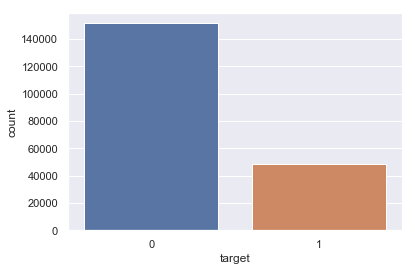

In [131]:
sns.countplot(x='target', data=sub)

In [132]:
sub['target'].value_counts()

0    151640
1     48360
Name: target, dtype: int64

In [133]:
sub.head()

,ID_code,target
0,test_0,0
1,test_1,1
2,test_2,1
3,test_3,1
4,test_4,0
